<img src=../figures/Brown_logo.svg width=50%>

## Data-Driven Design & Analyses of Structures & Materials (3dasm)

## Bayesian neural networks for uncertainty quantification at scale

### Miguel A. Bessa | <a href = "mailto: miguel_bessa@brown.edu">miguel_bessa@brown.edu</a>  | Associate Professor

## **OPTION 1**. Run this notebook **locally in your computer**:

This is **only possible if you correctly installed all necessary packages** in the '3dasm' virtual environment.

* Installation instructions are available in the [course home page](https://github.com/bessagroup/3dasm_course).

If you have all packages already installed:

1. Open a (mamba) command window and load jupyter notebook (it will open in your internet browser):
```
jupyter notebook
``` 
2. Open notebook (*3dasm_course/Lectures/Lecture1/3dasm_Lecture1.ipynb*) and choose the '3dasm' kernel.

You're all set!

## **OPTION 2**. Use **Google's Colab** (no installation required, but times out if idle):

1. go to https://colab.research.google.com
2. login
3. File > Open notebook
4. click on Github (no need to login or authorize anything)
5. paste the git link: https://github.com/bessagroup/3dasm_course
6. click search and then click on the notebook (*3dasm_course/Lectures/short_course/d3_summer_school.ipynb*)

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!
from IPython.display import display, Math # to print with Latex math

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

## Outline for today

* Part I (**optional**): Very quick introduction to Bayesian machine learning
* Part II (**optional**): Machine learning without going Bayesian: point estimates
* Part III: Bayesian Inference & Bayesian neural networks

**Reading material**: This notebook + (Murphy's Introductory and Advanced books)

# Part I (optional): Very quick introduction to Bayesian machine learning

- Quick introducing to machine learning from a probabilistic perspective (Bayesian machine learning).
    - A machine learning model is completely defined by (1) **observation distribution** and (2) **prior distribution**.
    - The goal of a machine learning model is to get the **posterior predictive distribution (PPD)**
    - Analyical solution for simple 1D example: the car stopping distance problem with 1 hidden variable

## The car stopping distance problem

<img src="../figures/reaction-braking-stopping.svg" title="Car stopping distance" width="50%" align="right">

<br></br>
Car stopping distance ${\color{red}y}$ as a function of its velocity ${\color{green}x}$ before it starts braking:

${\color{red}y} = {\color{blue}z} x + \frac{1}{2\mu g} {\color{green}x}^2 = {\color{blue}z} x + 0.1 {\color{green}x}^2$

- ${\color{blue}z}$ is the driver's reaction time (in seconds)
- $\mu$ is the road/tires coefficient of friction (assume $\mu=0.5$)
- $g$ is the acceleration of gravity (assume $g=10$ m/s$^2$).

<div class="alert alert-block alert-info"><b>Remark: Jupyter Notebooks can contain <font color=red>notes</font> not shown when in presentation mode. (See below)</div>

## The car stopping distance problem

### How to obtain this formula?

$y = d_r + d_{b}$

where $d_r$ is the reaction distance, and $d_b$ is the braking distance.

### Reaction distance $d_r$

$d_r = z x$

with $z$ being the driver's reaction time, and $x$ being the velocity of the car at the start of braking.

## The car stopping distance problem

### Braking distance $d_b$

Kinetic energy of moving car:

$E = \frac{1}{2}m x^2$ &nbsp; &nbsp; &nbsp; where $m$ is the car mass.

Work done by braking:

$W = \mu m g d_b$ &nbsp; &nbsp; &nbsp; where $\mu$ is the coefficient of friction between the road and the tire, $g$ is the acceleration of gravity, and $d_b$ is the car braking distance.

The braking distance follows from $E=W$:

$d_b = \frac{1}{2\mu g}x^2$

Therefore, if we add the reacting distance $d_r$ to the braking distance $d_b$ we get the stopping distance $y$:

$$y = d_r + d_b = z x + \frac{1}{2\mu g} x^2$$

## The car stopping distance problem

<img src="../figures/reaction-braking-stopping.svg" title="Car stopping distance" width="25%" align="right">

$y = {\color{blue}z} x + 0.1 x^2$

The driver's reaction time ${\color{blue}z}$ is a **random variable (rv)**

* Every driver has its own reaction time $z$

* Assume we know the distribution associated to $z$ is Gaussian with **mean** $\mu_z=1.5$ seconds and **variance** $\sigma_z^2=0.5^2$ seconds$^2$

$$
z \sim \mathcal{N}(\mu_z=1.5,\sigma_z^2=0.5^2)
$$

where $\sim$ means "sampled from", and $\mathcal{N}$ indicates a Gaussian **probability density function (pdf)**

## Univariate Gaussian <a title="probability density function">pdf</a> 

$$
    p(z) = \mathcal{N}(z | \mu_z, \sigma_z^2) = \frac{1}{\sqrt{2\pi\sigma_z^2}}e^{-\frac{1}{2\sigma_z^2}(z - \mu_z)^2}
$$

The output of this expression is the **PROBABILITY DENSITY** of $z$ **given** (or conditioned to) a particular $\mu_z$ and $\sigma_z^2$.

* **Important**: Probability Density $\neq$ Probability

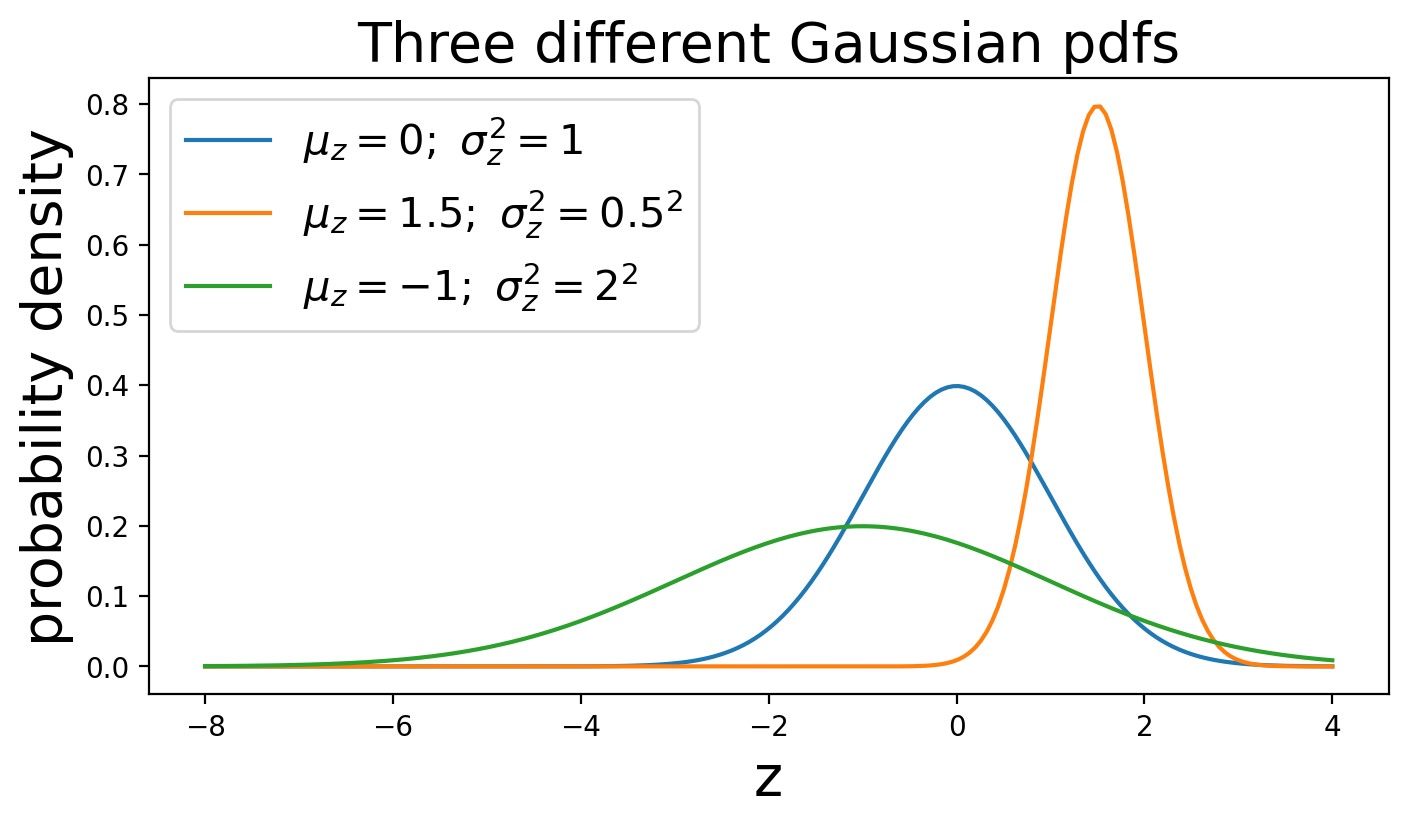

In [2]:
def norm_pdf(z, mu_z, sigma_z2): return 1/np.sqrt(2*np.pi*sigma_z2)*np.exp(-(z-mu_z)**2/(2*sigma_z2))
zrange = np.linspace(-8, 4, 200) # create a list of 200 z points between z=-8 and z=4
fig, ax = plt.subplots() # create a plot
ax.plot(zrange, norm_pdf(zrange, 0, 1), label=r"$\mu_z=0; \ \sigma_z^2=1$") # plot norm_pdf(z|0,1)
ax.plot(zrange, norm_pdf(zrange, 1.5, 0.5**2), label=r"$\mu_z=1.5; \ \sigma_z^2=0.5^2$") # plot norm_pdf(z|1.5,0.5^2)
ax.plot(zrange, norm_pdf(zrange, -1, 2**2), label=r"$\mu_z=-1; \ \sigma_z^2=2^2$") # plot norm_pdf(z|-1,2^2)
ax.set_xlabel("z", fontsize=20) # create x-axis label with font size 20
ax.set_ylabel("probability density", fontsize=20) # create y-axis label with font size 20
ax.legend(fontsize=15) # create legend with font size 15
ax.set_title("Three different Gaussian pdfs", fontsize=20); # create title with font size 20

## Simplifying further the car stopping distance problem (constant velocity)

<img src="../figures/reaction-braking-stopping.svg" title="Car stopping distance" width="25%" align="right">
<br></br>
Let's now consider the case of constant velocity $x=75$ m/s:

${\color{red}y} = {\color{blue}z}\cdot 75 + 0.1\cdot 75^2 = 75 {\color{blue}z} + 562.5$

- ${\color{red}y}$ is the **output**: the car stopping distance (in meters)
- ${\color{blue}z}$ is a hidden variable: an <a title="random variable">rv</a> representing the driver's reaction time (in seconds)

where $z \sim \mathcal{N}(\mu_z=1.5,\sigma_z^2=0.5^2)$

In [3]:
# This cell is hidden during presentation. It's just to define a function to plot the governing model of
# the car stopping distance problem. Defining a function that creates a plot allows to repeatedly run
# this function on cells used in this notebook.
def car_fig(ax):
    x = np.linspace(3, 83, 1000)
    mu_z = 1.5; sigma_z = 0.5;  # parameters of the "true" p(z)
    mu_y = mu_z*x + 0.1*x**2 # From Homework of Lecture 4
    sigma_y = np.sqrt( (x*sigma_z)**2 ) # From Homework of Lecture 4
    ax.set_xlabel("x (m/s)", fontsize=20) # create x-axis label with font size 20
    ax.set_ylabel("y (m)", fontsize=20) # create y-axis label with font size 20
    ax.set_title("Car stopping distance problem", fontsize=20); # create title with font size 20
    ax.plot(x, mu_y, 'k:', label="Governing model $\mu_y$")
    ax.fill_between(x, mu_y - 1.9600 * sigma_y,
                    mu_y + 1.9600 * sigma_y,
                    color='k', alpha=0.2,
                    label='95% confidence interval ($\mu_y \pm 1.96\sigma_y$)') # plot 95% credence interval
    ax.legend(fontsize=15)

In [4]:
# This cell is also hidden during presentation.
from scipy.stats import norm # import the normal dist, as we learned before!
def samples_y(N_samples,x): # observations/measurements/samples for car stop. dist. prob.
    mu_z = 1.5; sigma_z = 0.5;
    samples_z = norm.rvs(mu_z, sigma_z, size=N_samples) # randomly draw samples from the normal dist.
    samples_y = samples_z*x + 0.1*x**2 # compute the stopping distance for samples of z
    return samples_y # return samples of y

Empirical mean[y] is 675.2627859040978 (real mean[y]=675)
Empirical std[y] is 36.063054236809634 (real std[y]=37.5)


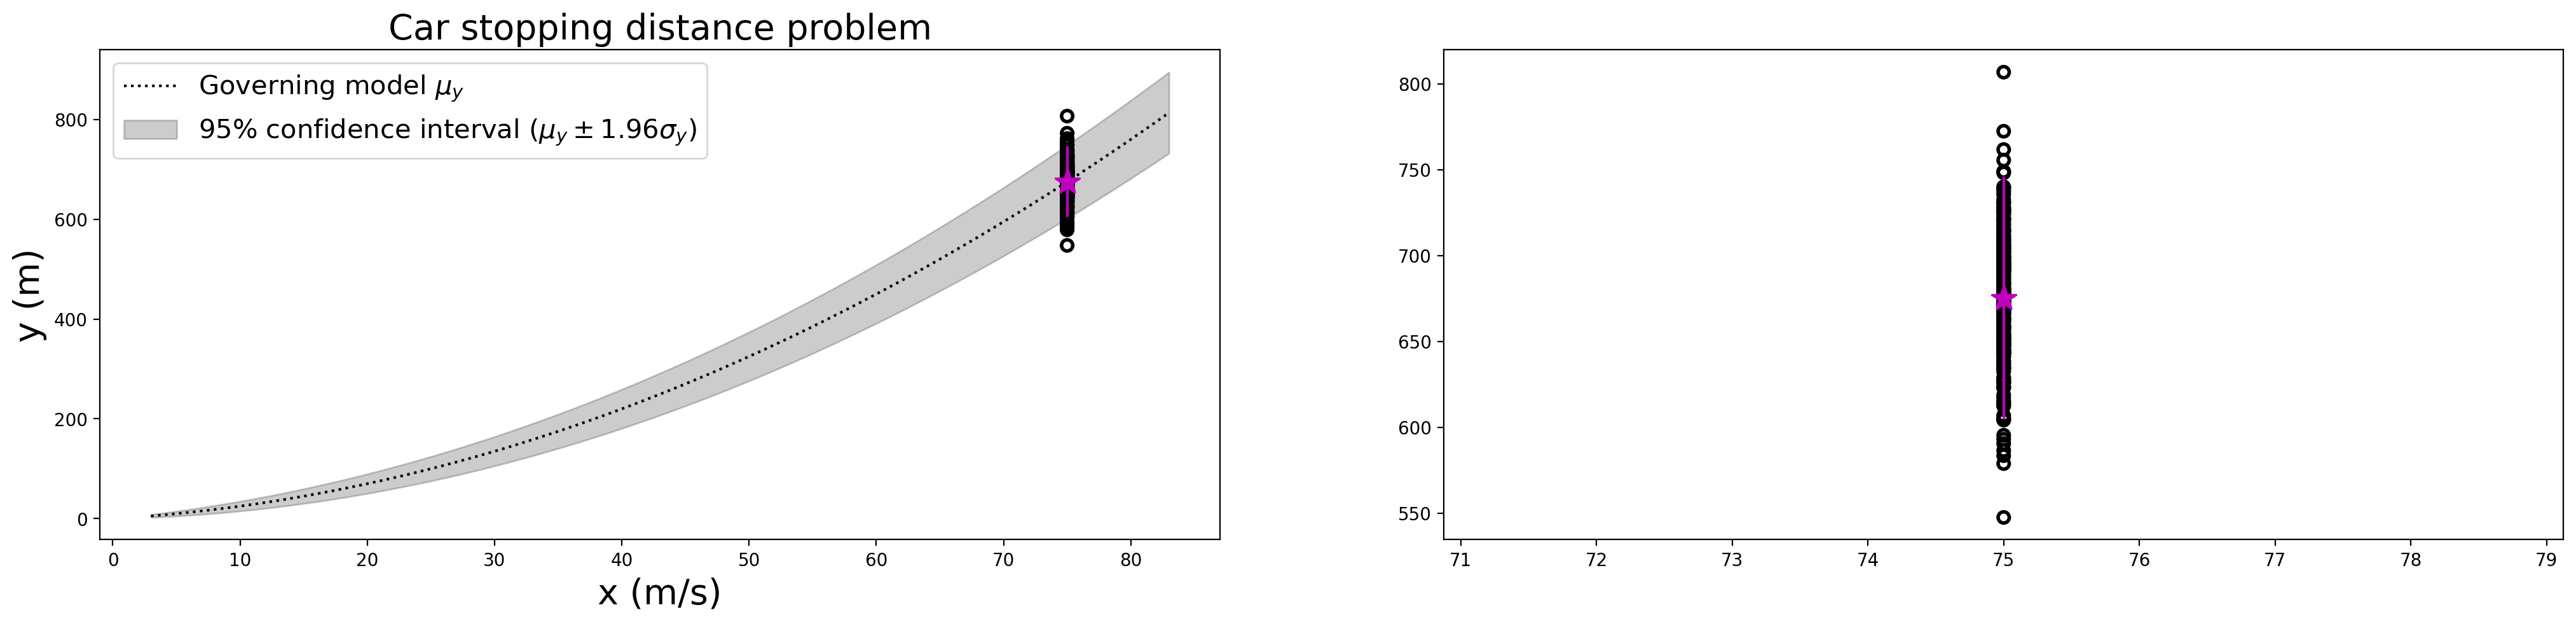

In [33]:
# vvvvvvvvvvv this is just a trick so that we can run this cell multiple times vvvvvvvvvvv
fig_car_new, ax_car_new = plt.subplots(1,2); plt.close() # create figure and close it
if fig_car_new.get_axes():
    del ax_car_new; del fig_car_new # delete figure and axes if they exist
    fig_car_new, ax_car_new = plt.subplots(1,2) # create them again
# ^^^^^^^^^^^ end of the trick ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
N_samples = 300 # CHANGE THIS NUMBER AND RE-RUN THE CELL
x = 75; empirical_y = samples_y(N_samples, x); # Empirical measurements of N_samples at x=75
empirical_mu_y = np.mean(empirical_y); empirical_sigma_y = np.std(empirical_y); # empirical mean and std
car_fig(ax_car_new[0]) # a function I created to include the background plot of the governing model
for i in range(2): # create two plots (one is zooming in on the error bar)
    ax_car_new[i].errorbar(x , empirical_mu_y,yerr=1.96*empirical_sigma_y, fmt='m*', markersize=15);
    ax_car_new[i].scatter(x*np.ones_like(empirical_y),empirical_y, s=40,
                          facecolors='none', edgecolors='k', linewidths=2.0)
print("Empirical mean[y] is",empirical_mu_y, "(real mean[y]=675)")
print("Empirical std[y] is",empirical_sigma_y,"(real std[y]=37.5)")
fig_car_new.set_size_inches(25, 5) # scale figure to be wider (since there are 2 subplots)

### Car stopping distance problem without knowing the reaction time

<img src="../figures/reaction-braking-stopping.svg" title="Car stopping distance" width="25%" align="right">

For a constant velocity of the car, $x=75$ m/s, we want to be able to predict the stopping distance $y$.

We suspect that $y$ depends on a **hidden** (unobserved) variable $z$, which is the reaction time of the driver. We also know that $z$ has to be a random variable because the same person never takes exactly the same time to react.

- This implies that the car stopping distance $y$ is also a random variable, i.e., each new $y^*$ that we observe arises from a distribution: $p(y^*)$.

But if we don't know $z$ and we can't measure it, then how can we predict $p(y^*)$?

- From measurements of $y$, i.e. from data $\to$ $\mathbf{y} = \mathcal{D}_y$.

| $y_i$ (m) |
| ---- |
| 601.5 |
| 705.9 |
| 693.8 |
| ...   |
| 711.3 |

where the data $\mathcal{D}_y$ can be a Pandas dataframe with $N$ data points ($N$ rows).

Therefore, the goal is to use measurements of $y$ to determine the distribution:

$$
\require{color}
{\color{orange}p(y^*|y=\mathcal{D}_y)}
$$

which is called the **posterior predictive distribution** (PPD).

If we collect infinite samples of $y$, then we determine this distribution exactly (problem solved!).

**Problem 1**: What can we do when we cannot collect enough data samples to make a good estimation of the PPD ${\color{orange}p(y^*|y=\mathcal{D}_y)}$?

- **Solution**:
    1. Create a model about how $y$ depends on $z$, i.e. how $y$ depends on what we don't know.

    2. Then, consider all possible values of $z$ because they are what makes $y$ assume a distribution!

**Problem 2**: But $z$ is a random variable... It can take many values (actually, an infinite number of values)! No reaction time is *exactly* the same. Thus, $z$ also comes from a distribution!

- **Solution**: create a model for the distribution of $z$.

**Conclusion**: estimating the PPD of $y^*$ after observing some data $\mathcal{D}_y$ is only possible by creating a model that depends on what we **do not know** ($z$), and considering all possible values that $z$ can get:

$$\require{color}
{\color{orange}p(y^*|y=\mathcal{D}_y)} = \int {\color{blue}p(y^*|z)} {\color{green}p(z|y=\mathcal{D}_y)} dz
$$

Therefore, we need to define two terms:

- ${\color{blue}p(y^*|z)}$: the **observation distribution** (dependence of $y^*$ on $z$)

- ${\color{green}p(z|y=\mathcal{D}_y)}$: the **posterior** (dependence of $z$ on the observed data).

Unfortunately, the posterior cannot be defined or assumed because **we do not observe** $z$ from the data.

That's where the Bayes rule comes to the rescue. When no data is observed, the Bayes rule is written as:

$\require{color}$
$$
{\color{green}p(z|y)} = \frac{ {\color{blue}p(y|z)}{\color{red}p(z)} } {p(y)}
$$

* ${\color{red}p(z)}$ is the **prior distribution** $\to$ our model for the distribution of $z$, without any observation!
* ${\color{blue}p(y|z)}$ is the **observation distribution** $\to$ our model for the distribution of $y$ given $z$
* $p(y)$ is the **marginal distribution** $\to$ normalization constant: $p(y) = \int {\color{blue}p(y|z)} {\color{red}p(z)} dz$
* ${\color{green}p(z|y)}$ is the **posterior distribution** $\to$ what we want to find because we cannot observe it nor assume it

### Creating a model for the car stopping distance problem

<img src="../figures/reaction-braking-stopping.svg" title="Car stopping distance" width="25%" align="right">

**First**, we need to decide what distribution ${\color{blue}p(y|z)}$ we want to use for our model.

- What is the simplest distribution that we can choose?

A Gaussian distribution!

If we know our Physics, we may also know what is the average $y$ for a given average reaction time $z$. In other words, we know the expression for the mean of the Gaussian:

$$
p(y|z) = \mathcal{N}\left(y | \mu_{y|z}=w z+b, \sigma_{y|z}^2={\color{red}s}^2\right)
$$

where $w$, $b$ and $s$ are all constants that we determined in the beginning of this lecture ($w=x=75$ and $b=0.1 x^2=562.5$).

However, let's assume that we don't know enough Physics to know what the variance ${\color{red}s}^2$ is... In that case, we can assume a value (or some other analytical expression). For example, assume ${\color{red}s}^2=80^2$.

* Note: we could have assumed any other values. This is just the best model we could think of.

<img src="../figures/reaction-braking-stopping.svg" title="Car stopping distance" width="25%" align="right">

Second, we need to decide what is the prior distribution ${\color{red}p(z)}$.

As we said, when we have no clue about what the distribution of the hidden rv $z$ is, then we can use a **Uniform distribution** (a.k.a. uninformative prior).

This distribution assigns equal probability to any value of $z$ within an interval $z \in (z_{min}, z_{max})$.

$$
p(z) = \frac{1}{C_z}
$$

where $C_z = z_{max}-z_{min}$ is the **normalization constant** of the Uniform pdf, i.e. the value that guarantees that $p(z)$ integrates to one.

For the time being, we will not assume any particular values for $z_{max}$ and $z_{min}$. So, we will consider the case when $z_{max}\rightarrow +\infty$ and $z_{min}\rightarrow -\infty$. Mathematically this leads to some indefinition, but it's commonly ignored. If we had some information, we could consider some values for these bounds (e.g. $z_{min} = 0$ seconds would be the limit of the fastest reaction time that is humanly possible, and $z_{max} = 3$ seconds would be the slowest reaction time of a human being).

### Summary of our model

1. The **observation distribution**:

$$
p(y|z) = \mathcal{N}\left(y | \mu_{y|z}=w z+b, \sigma_{y|z}^2\right) = \frac{1}{C_{y|z}} \exp\left[ -\frac{1}{2\sigma_{y|z}^2}(y-\mu_{y|z})^2\right]
$$

where $C_{y|z} = \sqrt{2\pi \sigma_{y|z}^2}$ is the **normalization constant** of the Gaussian pdf, and where $\mu_{y|z}=w z+b$, with $w$, $b$ and $\sigma_{y|z}^2$ being constants.

2. The **prior distribution**: $p(z) = \frac{1}{C_z}$

#### (Almost) Every machine learning model is complete when you define the observation and prior distributions.

Once we decide on the observation distribution and the prior distribution, we become capable of making any prediction due to the amazing Bayes' rule.

## The amazing Bayes' rule: application to observed data

When data is observed $\mathcal{D}_y$, then Bayes' rule is written as:

$\require{color}$
$$
{\color{green}p(z|y=\mathcal{D}_y)} = \frac{ {\color{blue}p(y=\mathcal{D}_y|z)}{\color{red}p(z)} } {p(y=\mathcal{D}_y)}
$$

* ${\color{red}p(z)}$ is the **prior** distribution
* ${\color{blue}p(y=\mathcal{D}_y|z)}$ is the **likelihood** function
* $p(y=\mathcal{D}_y)$ is the **marginal likelihood**
* ${\color{green}p(z|y=\mathcal{D}_y)}$ is the **posterior**

We can write Bayes' rule as <font color='green'>posterior</font> $\propto$ <font color='blue'>likelihood</font> $\times$ <font color='red'>prior </font>, where we are ignoring the denominator $p(y=\mathcal{D}_y)$ because it is just a **constant** independent of the hidden variable $z$.

The Bayes' rule allows to calculate the posterior ${\color{green}p(z|y=\mathcal{D}_y)}$, which then allows to calculate what we really want: the PPD!

$$\require{color}
{\color{orange}p(y^*|y=\mathcal{D}_y)} = \int {\color{blue}p(y^*|z)} {\color{green}p(z|y=\mathcal{D}_y)} dz
$$

Let's see how to do this for this simple model (where everything can be done analytically!).

$${\color{green}p(z|y=\mathcal{D}_y)} = \frac{ {\color{blue}p(y=\mathcal{D}_y|z)}{\color{red}p(z)} } {p(y=\mathcal{D}_y)}$$

- First, we need to calculate the **likelihood** function ${\color{blue}p(y=\mathcal{D}_y|z)}$

### Likelihood for car stopping distance problem

The **likelihood** is obtained by evaluating the **observation distribution** at the data $\mathcal{D}_y$.

| $y_i$ (m) |
| ---- |
| 601.5 |
| 705.9 |
| 693.8 |
| ...   |
| 711.3 |

Noting that each observation in $\mathcal{D}_y$ is independent of each other and that they have the same distribution (**indepentent and identically distributed**: i.i.d.), then how do we calculate the likelihood?

$$
p(y=\mathcal{D}_y | z) = \prod_{i=1}^{N} p(y=y_i|z) = p(y=y_1|z)p(y=y_2|z) \cdots p(y=y_N|z)
$$

which gives the **probability density** of observing that data if using our observation distribution (which is part of our model!).

#### Calculating the likelihood

Let's calculate it:

$$
\begin{align}
p(y=\mathcal{D}_y | z) &= \prod_{i=1}^{N} p(y=y_i|z) \\
&= \prod_{i=1}^{N} \frac{1}{|w|}\frac{1}{\sqrt{2\pi \left(\frac{\sigma_{y|z}}{w}\right)^2}} \exp\left\{ -\frac{1}{2\left(\frac{\sigma_{y|z}}{w}\right)^2}\left[z-\left(\frac{y_i-b}{w}\right)\right]^2\right\} \\
&= \prod_{i=1}^{N} \frac{1}{|w|} \mathcal{N}\left(z|\mu_i, \sigma_i^2\right)
\end{align}
$$

where $\mu_i = \frac{y_i-b}{w}$ and $\sigma_i =\frac{\sigma_{y|z}}{w}$

This seems a bit daunting... I know. Do not dispair yet!

##### Product of Gaussian pdf's of the same rv $z$

It can be shown that the product of $N$ univariate Gaussian pdf's of the same rv $z$ is:

$$
\prod_{i=1}^{N} \mathcal{N}(z|\mu_i, \sigma_i^2) = C \cdot \mathcal{N}(z|\mu, \sigma^2)
$$

with mean: $\mu = \sigma^2 \left( \sum_{i=1}^{N} \frac{\mu_i}{\sigma_i^2}\right)$

variance: $\sigma^2= \frac{1}{\sum_{i=1}^{N} \frac{1}{\sigma_i^2}}$

and normalization constant: $C = \frac{1}{\left(2\pi\right)^{(N-1)/2}}\sqrt{\frac{\sigma^2}{\prod_{i=1}^N \sigma_i^2}} \exp\left[-\frac{1}{2}\left(\sum_{i=1}^{N} \frac{\mu_i^2}{\sigma_i^2} - \frac{\mu^2}{\sigma^2}\right)\right]$

Curiosity: the normalization constant $C$ is itself a Gaussian! You can see it more clearly if you consider $N=2$

Note that the normalization constant shown in the previous cell can also be written as:

$$
C = \frac{1}{\left(2\pi\right)^{(N-1)/2}}\sqrt{\frac{\sigma^2}{\prod_{i=1}^N \sigma_i^2}} \exp\left[-\frac{1}{2}\left(\sum_{i=1}^{N-1}\sum_{j=i+1}^{N} \frac{(\mu_i-\mu_j)^2}{\sigma_i^2 \sigma_j^2}\sigma^2\right)\right]
$$

Therefore, the <font color='blue'>likelihood</font> for this problem becomes:

$$
{\color{blue}p(y=\mathcal{D}_y | z)} = \frac{1}{|w|^N} \cdot C \cdot \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[ -\frac{1}{2\sigma^2}(z-\mu)^2\right]
$$

where $\mu = \frac{w^2\sigma^2}{\sigma_{y|z}^2} \sum_{i=1}^N \mu_i$

$\sigma^2 = \frac{\sigma_{y|z}^2}{w^2 N}$, and

$C = \frac{1}{2\pi^{(N-1)/2}} \sqrt{\frac{\sigma^2}{\left( \frac{\sigma_{y|z}^2}{w^2}\right)^N}}
$

Now that we have the likelihood, we can compute the next term in the Bayes' rule:

$${\color{green}p(z|y=\mathcal{D}_y)} = \frac{ {\color{blue}p(y=\mathcal{D}_y|z)}{\color{red}p(z)} } {p(y=\mathcal{D}_y)}$$

- Let's compute the **marginal likelihood** $p(y=\mathcal{D}_y)$

$$
\begin{align}
p(y=\mathcal{D}_y) &= \int {\color{blue}p(y=\mathcal{D}_y | z)} {\color{red}p(z)} dz \\
&= \int {\color{blue}\frac{1}{|w|^N} \cdot C \cdot \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[ -\frac{1}{2\sigma^2}(z-\mu)^2\right]} {\color{red}\frac{1}{C_z}} dz \\
&= \frac{C}{|w|^N C_z} \int {\color{magenta} \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left[ -\frac{1}{2\sigma^2}(z-\mu)^2\right]} dz
\end{align}
$$

What is the result for the <font color='magenta'>magenta term</font>?

From where we conclude that the marginal likelihood is:

$$\require{color}
p(y=\mathcal{D}_y) = \frac{C}{|w|^N C_z} 
$$

And now we have all the terms in Bayes' rule, so we can finally determine the <font color='green'>posterior</font>:

$$\require{color}\begin{align}
{\color{green}p(z|y=\mathcal{D}_y)} &= \frac{ {\color{blue}p(y=\mathcal{D}_y|z)}{\color{red}p(z)} } {p(y=\mathcal{D}_y)} \\
&= \frac{1}{p(y=\mathcal{D}_y)} \cdot {\color{blue}\frac{1}{|w|^N} C \cdot \mathcal{N}(z|\mu,\sigma^2)} \cdot {\color{red}\frac{1}{C_z}} \\
&= \mathcal{N}(z|\mu, \sigma^2)
\end{align}
$$

which is a **normalized** Gaussian pdf in $z$ with mean and variance as shown in the previous cell.

## Determining the Posterior Predictive Distribution (<a title="Posterior Predictive Distribution">PPD</a>) from the posterior

However, as we mentioned, Bayes' rule is just a way to calculate the posterior:

$$
p(z|y=\mathcal{D}_y) = \frac{ p(y=\mathcal{D}_y|z)p(z) } {p(y=\mathcal{D}_y)}
$$

What we really want is the <font color='orange'>Posterior Predictive Distribution (<a title="Posterior Predictive Distribution">PPD</a>)</font> . This comes after calculating the posterior given some data $\mathcal{D}_y$:

$$\require{color}
{\color{orange}p(y^*|y=\mathcal{D}_y)} = \int p(y^*|z) p(z|y=\mathcal{D}_y) dz
$$

which is often written in simpler notation: $p(y^*|\mathcal{D}_y) = \int p(y^*|z) p(z|\mathcal{D}_y) dz$

$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = \int \underbrace{p(y^*|z)}_{\text{observation}\\ \text{distribution}} \overbrace{p(z|y=\mathcal{D}_y)}^{\text{posterior}} dz
$$

Considering the terms we found before, we get:

$$\begin{align}
p(y^*|\mathcal{D}_y) &= \int \underbrace{\frac{1}{|w|}\frac{1}{\sqrt{2\pi \left(\frac{\sigma_{y|z}}{w}\right)^2}} \exp\left\{ -\frac{1}{2\left(\frac{\sigma_{y|z}}{w}\right)^2}\left[z-\left(\frac{y^*-b}{w}\right)\right]^2\right\} }_{\text{observation}\\ \text{distribution}} \overbrace{\mathcal{N}(z|\mu, \sigma^2)}^{\text{posterior}} dz
\end{align}
$$

$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = \frac{1}{|w|} \int {\color{blue}\frac{1}{\sqrt{2\pi \left(\frac{\sigma_{y|z}}{w}\right)^2}} \exp\left\{ -\frac{1}{2\left(\frac{\sigma_{y|z}}{w}\right)^2}\left[z-\left(\frac{y^*-b}{w}\right)\right]^2\right\}} \mathcal{N}(z|\mu, \sigma^2) dz
$$

$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = \frac{1}{|w|} \int \mathcal{N}\left(z\left|\frac{y^*-b}{w}, \left(\frac{\sigma_{y|z}}{w}\right)^2\right.\right) \mathcal{N}(z|\mu, \sigma^2) dz
$$

This is (again!) the product of two Gaussians!

So, we conclude that the <a title="Posterior Predictive Distribution">PPD</a> is an integral of a Gaussian:

$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = \frac{1}{|w|} \int  C^* \mathcal{N}\left(z|\mu^*, \left(\sigma^*\right)^2\right) dz
$$

where $\mu^* = \left(\sigma^* \right)^2 \left( \frac{\mu}{\sigma^2} + \frac{(y^*-b)/w}{\left(\frac{\sigma_{y|z}}{w}\right)^2} \right) = \left(\sigma^* \right)^2 \left( \frac{\mu}{\sigma^2} + \frac{(y^*-b)\cdot w}{\sigma_{y|z}^2} \right)$

$\left( \sigma^* \right)^2 = \frac{1}{\frac{1}{\sigma^2}+\frac{1}{\left( \frac{\sigma_{y|z}}{w}\right)^2}}= \frac{1}{\frac{1}{\sigma^2}+\frac{w^2}{\sigma_{y|z}^2}}$

$C^* = \frac{1}{\sqrt{2\pi \left( \sigma^2 + \frac{\sigma_{y|z}^2}{w^2} \right)}}\exp\left[ - \frac{\left(\mu - \frac{y^*-b}{w}\right)^2}{2\left( \sigma^2+\frac{\sigma_{y|z}^2}{w^2}\right)}\right]$

This integral is simple to solve!

$$\require{color}
\begin{align}
{\color{orange}p(y^*|\mathcal{D}_y)} &= \frac{1}{|w|} \int  C^* \mathcal{N}\left(z|\mu^*, \left(\sigma^*\right)^2\right) dz \\
&= \frac{C^*}{|w|} \int   {\color{blue}\mathcal{N}\left(z|\mu^*, \left(\sigma^*\right)^2\right)} dz
\end{align}
$$

What's the result of integrating the <font color='blue'>blue</font> term?

$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = \frac{C^*}{|w|}
$$

## A long way to show that the <a title="Posterior Predictive Distribution">PPD</a> is a simple Gaussian...

Which can be rewritten as the final form of the <a title="Posterior Predictive Distribution">PPD</a>:

$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = \mathcal{N}\left(y^*| b+\mu w, w^2\sigma^2+\sigma_{y|z}^2 \right)
$$

a normalized univariate Gaussian, where each constant is given by:

where we recall that each constant is:

$b = 0.1x^2 = 562.5$

$w = x = 75$

$\sigma_{y|z}^2 = s^2 = 80^2$

$\sigma^2 = \frac{\sigma_{y|z}^2}{w^2 N} = \frac{s^2}{w^2 N} $

$\mu = \frac{w^2 \sigma^2}{\sigma_{y|z}^2} \sum_{i=1}^{N} \mu_i = \cdots = \frac{\sum_{i=1}^N y_i}{w N}-\frac{b}{w}$

#### Note on algebra to determine $\mu$ parameter:

$$
\begin{align}
\mu &= \frac{w^2 \sigma^2}{\sigma_{y|z}^2} \sum_{i=1}^{N} \mu_i \\
&= \frac{\sum_{i=1}^{N} \mu_i}{N} = \frac{1}{N} \sum_{i=1}^{N} \left(\frac{y_i-b}{w}\right) \\
&= \frac{1}{w N} \sum_{i=1}^N\left( y_i-b\right) \\
&= \frac{1}{w N} \left( \sum_{i=1}^N y_i-N b\right) \\
& = \frac{\sum_{i=1}^N y_i}{w N}-\frac{b}{w}
\end{align}
$$

## A long way to show that the <a title="Posterior Predictive Distribution">PPD</a> is a simple Gaussian...

Which can be rewritten as the final form of the <a title="Posterior Predictive Distribution">PPD</a>:

$$\require{color}
\begin{align}
{\color{orange}p(y^*|\mathcal{D}_y)} &= \mathcal{N}\left(y^*| b+\mu w, w^2\sigma^2+\sigma_{y|z}^2 \right) \\
&= \mathcal{N}\left(y^* \left| \left(\sum_{i=1}^N \frac{y_i}{N}\right), \sigma_{y|z}^2 \left(\frac{1}{N} + 1 \right) \right. \right)
\end{align}
$$

where $y_i$ are each of the $N$ data points of the observed data $\mathcal{D}_y$, and $\sigma_{y|z}^2 = s^2 = 80^2$ is the **variance we assumed** because we were not sure about the governing equation for $y$.

PPD & empirical mean[y] tend to the same value: 673.4505598223103 (real mean[y]=675)
PPD std[y] we predict is 80.1332224070225 & empirical std[y] is 35.358031372608025 (real std[y]=37.5)


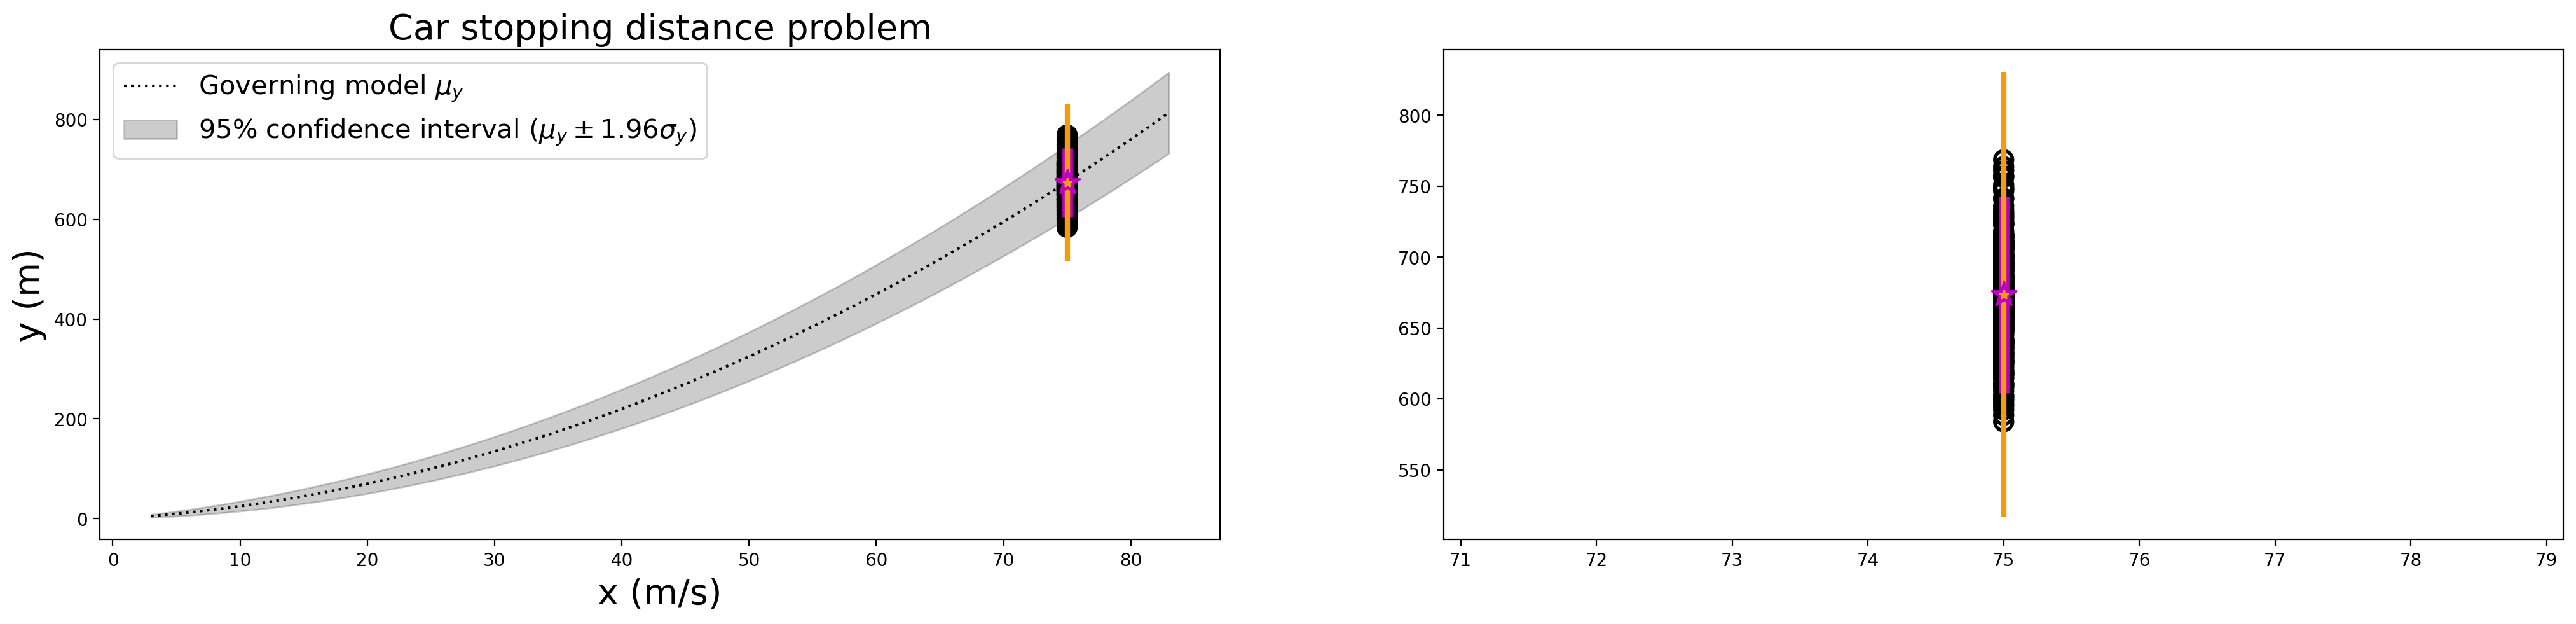

In [34]:
fig_car_PPD, ax_car_PPD = plt.subplots(1,2); plt.close() # create figure and close it
if fig_car_new.get_axes():
    del ax_car_PPD; del fig_car_PPD; fig_car_PPD, ax_car_PPD = plt.subplots(1,2) # delete fig & axes & create them
N_samples = 300 # CHANGE THIS NUMBER AND RE-RUN THE CELL
x = 75; empirical_y = samples_y(N_samples, x); # Empirical measurements of N_samples at x=75
empirical_mu_y = np.mean(empirical_y); empirical_sigma_y = np.std(empirical_y); # empirical mean and std
# Calculate PPD mean and standard deviation:
PPD_mu_y = np.mean(empirical_y); sigma_yGIVENz = 80; PPD_sigma_y = np.sqrt( sigma_yGIVENz**2*(1/N_samples + 1) )
car_fig(ax_car_PPD[0]) # a function I created to include the background plot of the governing model
for i in range(2): # create two plots (one is zooming in on the error bar)
    ax_car_PPD[i].errorbar(x , empirical_mu_y,yerr=1.96*empirical_sigma_y, fmt='m*', markersize=15, elinewidth=6);
    ax_car_PPD[i].errorbar(x , PPD_mu_y,yerr=1.96*PPD_sigma_y, color='#F39C12', fmt='*', markersize=5, elinewidth=3);
    ax_car_PPD[i].scatter(x*np.ones_like(empirical_y),empirical_y, s=100,facecolors='none', edgecolors='k', linewidths=2.0)
print("PPD & empirical mean[y] tend to the same value:",empirical_mu_y, "(real mean[y]=675)")
print("PPD std[y] we predict is",PPD_sigma_y, "& empirical std[y] is",empirical_sigma_y,"(real std[y]=37.5)")
fig_car_PPD.set_size_inches(25, 5) # scale figure to be wider (since there are 2 subplots)

### Reflection on what we are observing

1. Generally speaking, our PPD is quite reasonable and the result should be intuitive!
    * For few data points, the variance of the PPD is a bit larger than the variance we assumed for the conditional pdf $p(y|z)$, i.e. $\sigma_{y|z}^2=s^2=80^2$.

2. As the number of data points increases (see PPD as $N\rightarrow \infty$ or play with the figure above by increasing $N$), then the variance of the PPD $\sigma_{y}^2 \rightarrow s^2=80^2$ tends to the variance we assumed for our model: $\sigma_{y|z}^2=s^2=80^2$.
    * This results from our choice of likelihood and prior... Our model was incorrect in both:
        * The hidden rv $z$ is actually a Gaussian distribution, instead of a noninformative Uniform distribution
        * The real conditional pdf is the Dirac "distribution" around value $y = zx + 0.1 x^2$, instead of the Gaussian distribution with a mean of $\mu_{y|z}= zx + 0.1 x^2$ and a variance of $\sigma_{y|z} = s^2 = 80^2$.

Please keep this in your head:
* (Bayesian) ML is not magic. Every modeling choice you make affects the predictions you get.
* Of course, there are ways of getting "closer" to the truth! We'll take steps in that direction in the remainder of the course. 

In Part I we recalled how painful it is to compute the integrals for Bayesian machine learning models...

# Part II (optional): Machine learning without going Bayesian: point estimates

* Parameter estimation from training with data (model fitting)
    - Posterior approximation by Dirac delta "distribution"
    - Point estimates for the Dirac delta "distribution"
        * MAP: Maximum A Posterior estimate
        * MLE: Maximum Likelihood Estimation 
    - Negative log likelihood (NLL) 
* Why some people do not adopt a Bayesian (probabilistic) perspective of ML

Machine Learning without going fully Bayesian means that we want to **completely avoid integration**.

This is possible by noting that:

1. Computing the PPD is trivial if the **posterior distribution becomes the Dirac delta**


2. The marginal likelihood is just a **constant**

Let's explore these two remarks.

### 1. PPD when the posterior is a Dirac delta

$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = \int \underbrace{p(y^*|z)}_{\text{observation}\\ \text{distribution}} \overbrace{p(z|y=\mathcal{D}_y)}^{\text{posterior}} dz
$$

where $y^*$ signals that this is a prediction of $y$ (to help distinguish from training data).

What happens if the posterior is the Dirac delta "distribution"?

$$
p(z|y=\mathcal{D}_y) = \delta(z-\hat{z})
$$

where $\hat{z}$ is our best estimate for the value that $z$ should have.

$$\require{color}
\begin{align}
{\color{orange}p(y^*|\mathcal{D}_y)} &= \int \underbrace{p(y^*|z)}_{\text{observation}\\ \text{distribution}} \overbrace{p(z|y=\mathcal{D}_y)}^{\text{posterior}} dz\\
&= \int p(y^*|z) \delta(z-\hat{z}) dz \\
&= p(y^*|z=\hat{z})
\end{align}
$$

**Conclusion**: The PPD becomes the **observation distribution** where the unknown $z$ becomes our **best estimate** $\hat{z}$ (in other words: $z = \hat{z} =$ const)

* But what is our "**best estimate**" $\hat{z}$?
    - There are different estimates and different strategies to get there!

### 2. Finding the "best estimate" $\hat{z}$ without computing the marginal likelihood

Remember: the Bayes' rule determines the <font color='green'>posterior</font>,

$\require{color}$
$$
{\color{green}p(z|y=\mathcal{D}_y)} = \frac{ {\color{blue}p(y=\mathcal{D}_y|z)}{\color{red}p(z)} } {p(y=\mathcal{D}_y)}
$$

and the marginal likelihood $p(y=\mathcal{D}_y)$ is just a constant.

If we want to reduce the <font color='green'>posterior</font> to the Dirac delta "distribution",

$$
p(z|y=\mathcal{D}_y) = \delta(z-\hat{z})
$$

what is the only parameter that we need to find?

* We just need to find $\hat{z}$ to completely characterize $\delta(z-\hat{z})$

Note that this is not the case if the <font color='green'>posterior</font> is a different distribution!

* For example, **Part I** showed the posterior for the car stopping distance problem is a **Gaussian** when using a Gaussian likelihood and the noninformative Uniform prior $p(z) = \frac{1}{C_z}$:

$$\require{color}\begin{align}
{\color{green}p(z|y=\mathcal{D}_y)}
&= \mathcal{N}(z|\mu, \sigma^2)
\end{align}
$$

* If we were to solve the same problem for the same likelihood but now using a Gaussian prior $p(z) = \mathcal{N}\left(z| \overset{\scriptscriptstyle <}{\mu}_z, \overset{\scriptscriptstyle <}{\sigma}_z^2\right)$ (I do this in Lecture 7 of my course):

$$\require{color}\begin{align}
{\color{green}p(z|y=\mathcal{D}_y)} &= \mathcal{N}\left(z| \overset{\scriptscriptstyle >}{\mu}_z, \overset{\scriptscriptstyle >}{\sigma}_z^2\right) = \mathcal{N}\left(z\left|\frac{1}{\frac{1}{\sigma^2} + \frac{1}{\overset{\scriptscriptstyle <}{\sigma}_z^2}} \left( \frac{\mu}{\sigma^2} + \frac{\overset{\scriptscriptstyle <}{\mu}_z}{\overset{\scriptscriptstyle <}{\sigma}_z^2}\right), \frac{1}{\frac{1}{\sigma^2} + \frac{1}{\overset{\scriptscriptstyle <}{\sigma}_z^2}}\right.\right)
\end{align}
$$

The posterior is still a Gaussian but its mean and variance have been updated by the influence of the prior.

Let's play a simple game:
* Choose where to place the Dirac delta "distribution" for those two posteriors we found before.

In [7]:
# This cell is hidden during the presentation
from scipy.stats import norm # import the normal dist, as we learned before!
def samples_y(N_samples,x): # observations/measurements/samples for car stop. dist. prob. with 2 rv's
    mu_z = 1.5; sigma_z = 0.5;
    samples_z = norm.rvs(mu_z, sigma_z, size=N_samples) # randomly draw samples from the normal dist.
    samples_y = samples_z*x + 0.1*x**2 # compute the stopping distance for samples of z_1 and z_2
    return samples_y # return samples of y

In [8]:
# This cell is hidden during the presentation

# -------------------------------------------------------------------------------
# PARAMETERS YOU CAN CHANGE! PLAY A BIT WITH THIS ;)
x = 75 # keeping the car velocity constant at 75 m/s as we have done before
N_samples = 3 # Let's say our data is composed of 3 samples (empirical observations)
mu_prior_z = 3; sigma_prior_z = 2 # parameters of the Gaussian prior distribution (used only in case 2)
# -------------------------------------------------------------------------------


empirical_y = samples_y(N_samples, x) # Our data (empirical measurements of N_samples at x=75)

# Compute all the constants needed to plot the posterior for Lecture 6 and for Lecture 7
w = x
b = 0.1*x**2
sigma_yGIVENz = 80 # sigma_y|z (assumed value)
# Empirical mean and std directly calculated from observations:
empirical_mu_y = np.mean(empirical_y); empirical_sigma_y = np.std(empirical_y);
#
# Parameters of the likelihood function (not a distribution because it is not normalized):
sigma = np.sqrt(sigma_yGIVENz**2/(w**2*N_samples)) # std arising from the likelihood
mu = empirical_mu_y/w - b/w # mean arising from the likelihood (product of Gaussian densities for the data)
# -------------------------------------------------------------------------------
# Case 1: using a noninformative Uniform prior (Lecture 6):
# Posterior parameters:
#    These parameters are obvious in this case but I just want to highlight that the mean and std of this posterior
#    are the same as the parameters of the likelihood because posterior = likelihood / const )
sigma_posterior_UniformPrior = sigma # std of posterior (same as likelihood)
mu_posterior_UniformPrior = mu # mean of posterior (same as likelihood)
#
# PPD parameters:
PPD_mu_y_UniformPrior = mu*w + b # same result if using: np.mean(empirical_y)
PPD_sigma_y_UniformPrior = np.sqrt(w**2*sigma**2+sigma_yGIVENz**2) # same as: np.sqrt((80)**2*(1/N_samples + 1))

# z values for plot of case 1:
zrange_case1 = np.linspace(-3*sigma_posterior_UniformPrior+mu_posterior_UniformPrior,
                            3*sigma_posterior_UniformPrior+mu_posterior_UniformPrior, 200)
# Posterior values for plot of case 1:
posterior_pdf_values_case1 = norm.pdf(zrange_case1, mu, sigma)
# Probability density of posterior at the mean for case 1:
pdf_at_mean_case1 =  norm.pdf(mu_posterior_UniformPrior,mu_posterior_UniformPrior,sigma_posterior_UniformPrior)
# MAP estimate (maximum a posterior estimate) is the same as MLE (maximum likelihood estimation) for case 1:
pdf_at_mode_case1 = pdf_at_mean_case1 # in this case it's the same as mean (no calculation needed)
# -------------------------------------------------------------------------------
#
# -------------------------------------------------------------------------------
# CASE 2: using a Gaussian prior (Lecture 7):
# Posterior parameters:
sigma_posterior_GaussianPrior = np.sqrt( (sigma_prior_z**2*sigma**2)/(sigma_prior_z**2+sigma**2) )# std of posterior
mu_posterior_GaussianPrior = sigma_posterior_GaussianPrior**2*(mu/(sigma**2)+mu_prior_z/(sigma_prior_z**2)) # mean of posterior
# PPD parameters:
PPD_mu_y_GaussianPrior = mu_posterior_GaussianPrior*w + b
PPD_sigma_y_GaussianPrior = np.sqrt(w**2*sigma_posterior_GaussianPrior**2+sigma_yGIVENz**2)
#
# z values for plot:
zrange_case2 = np.linspace(-3*sigma_posterior_GaussianPrior+mu_posterior_GaussianPrior,
                            3*sigma_posterior_GaussianPrior+mu_posterior_GaussianPrior, 200)
# Posterior values for plot of case 2:
posterior_pdf_values_case2 = norm.pdf(zrange_case2, mu_posterior_GaussianPrior,
                                      sigma_posterior_GaussianPrior) # values of posterior for plotting
# Probability density of posterior at the mean for case 2:
pdf_at_mean_case2 = norm.pdf(mu_posterior_GaussianPrior,mu_posterior_GaussianPrior,sigma_posterior_GaussianPrior)
# MAP estimate (maximum a posterior estimate) for case 2:
pdf_at_mode_case2 = pdf_at_mean_case2 # in this case it's the same as mean (no calculation needed)
# -------------------------------------------------------------------------------


# Plot the posteriors that we calculate above and the Dirac delta at different z_hat
def Posteriors_and_Dirac_delta(z_hat_case1=mu_posterior_UniformPrior-2*sigma_posterior_UniformPrior,
                               z_hat_case2=mu_posterior_GaussianPrior-2*sigma_posterior_GaussianPrior):
    fig_Dirac, (ax_case1, ax_case2) = plt.subplots(1,2)
    #
    ax_case1.plot(zrange_case1, posterior_pdf_values_case1,
                  label=r"Posterior: $p(z|\mathcal{D}_y) = \mathcal{N}\left(z| \mu, \sigma^2\right)$")
    ax_case1.set_ylim(0, 1.3*pdf_at_mode_case1)
    ax_case1.plot(mu_posterior_UniformPrior, pdf_at_mean_case1,
                  'g^', markersize=25, linewidth=2,
                  label=r'mode: $\underset{z}{\mathrm{argmax}}\; p(z|\mathcal{D}_y)=\mu$')
    ax_case1.plot(mu_posterior_UniformPrior, pdf_at_mode_case1,
                  'k*', markersize=20, linewidth=2,
                  label=r'mean: $\mathbb{E}[z|\mathcal{D}_y]=\mu$')
    ax_case1.annotate("",
            xy=(z_hat_case1, 0), xycoords='data',
            xytext=(z_hat_case1, 1.3*pdf_at_mode_case1), textcoords='data',
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3", color='r', lw=2),
            )
    ax_case1.text(z_hat_case1, pdf_at_mode_case1*1.05, 'Dirac $\delta$', rotation = -90, fontsize = 15)
    ax_case1.text(z_hat_case1, 0, ('$\hat{z}=%1.2f$' % z_hat_case1), fontsize = 15)
    ax_case1.set_xlabel("z", fontsize=20)
    ax_case1.set_ylabel("probability density", fontsize=20)
    ax_case1.legend(loc='center right', fontsize=12)
    ax_case1.set_title("Posterior using noninformative Uniform prior (Lecture 6)", fontsize=16)
    #
    ax_case2.plot(zrange_case2, posterior_pdf_values_case2,
                  label=r"Posterior: $p(z|\mathcal{D}_y) = \mathcal{N}\left(z| \overset{>}{\mu}_z, \overset{>}{\sigma}_z^2\right)$")

    ax_case2.set_ylim(0, 1.3*pdf_at_mode_case2)
    ax_case2.plot(mu_posterior_GaussianPrior, pdf_at_mean_case2,
                  'g^', markersize=25, linewidth=2,
                  label=r'mode: $\underset{z}{\mathrm{argmax}}\; p(z|\mathcal{D}_y)=\overset{>}{\mu}_z$')
    ax_case2.plot(mu_posterior_GaussianPrior, pdf_at_mean_case2,
                  'k*', markersize=20, linewidth=2,
                  label=r'mean: $\mathbb{E}[z|\mathcal{D}_y]=\overset{>}{\mu}_z$')
    ax_case2.annotate("",
            xy=(z_hat_case2, 0), xycoords='data',
            xytext=(z_hat_case2, 1.3*pdf_at_mode_case2), textcoords='data',
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3", color='r', lw=2),
            )
    ax_case2.text(z_hat_case2, pdf_at_mode_case2*1.05, 'Dirac $\delta$', rotation = -90, fontsize = 15)
    ax_case2.text(z_hat_case2, 0, ('$\hat{z}=%1.2f$' % z_hat_case2), fontsize = 15)
    ax_case2.set_xlabel("z", fontsize=20)
    ax_case2.set_ylabel("probability density", fontsize=20)
    ax_case2.legend(loc='center right', fontsize=12)
    ax_case2.set_title("Posterior using Gaussian prior (Lecture 7)", fontsize=16)
    fig_Dirac.set_size_inches(15, 6) # scale figure to be wider (since there are 2 subplots)

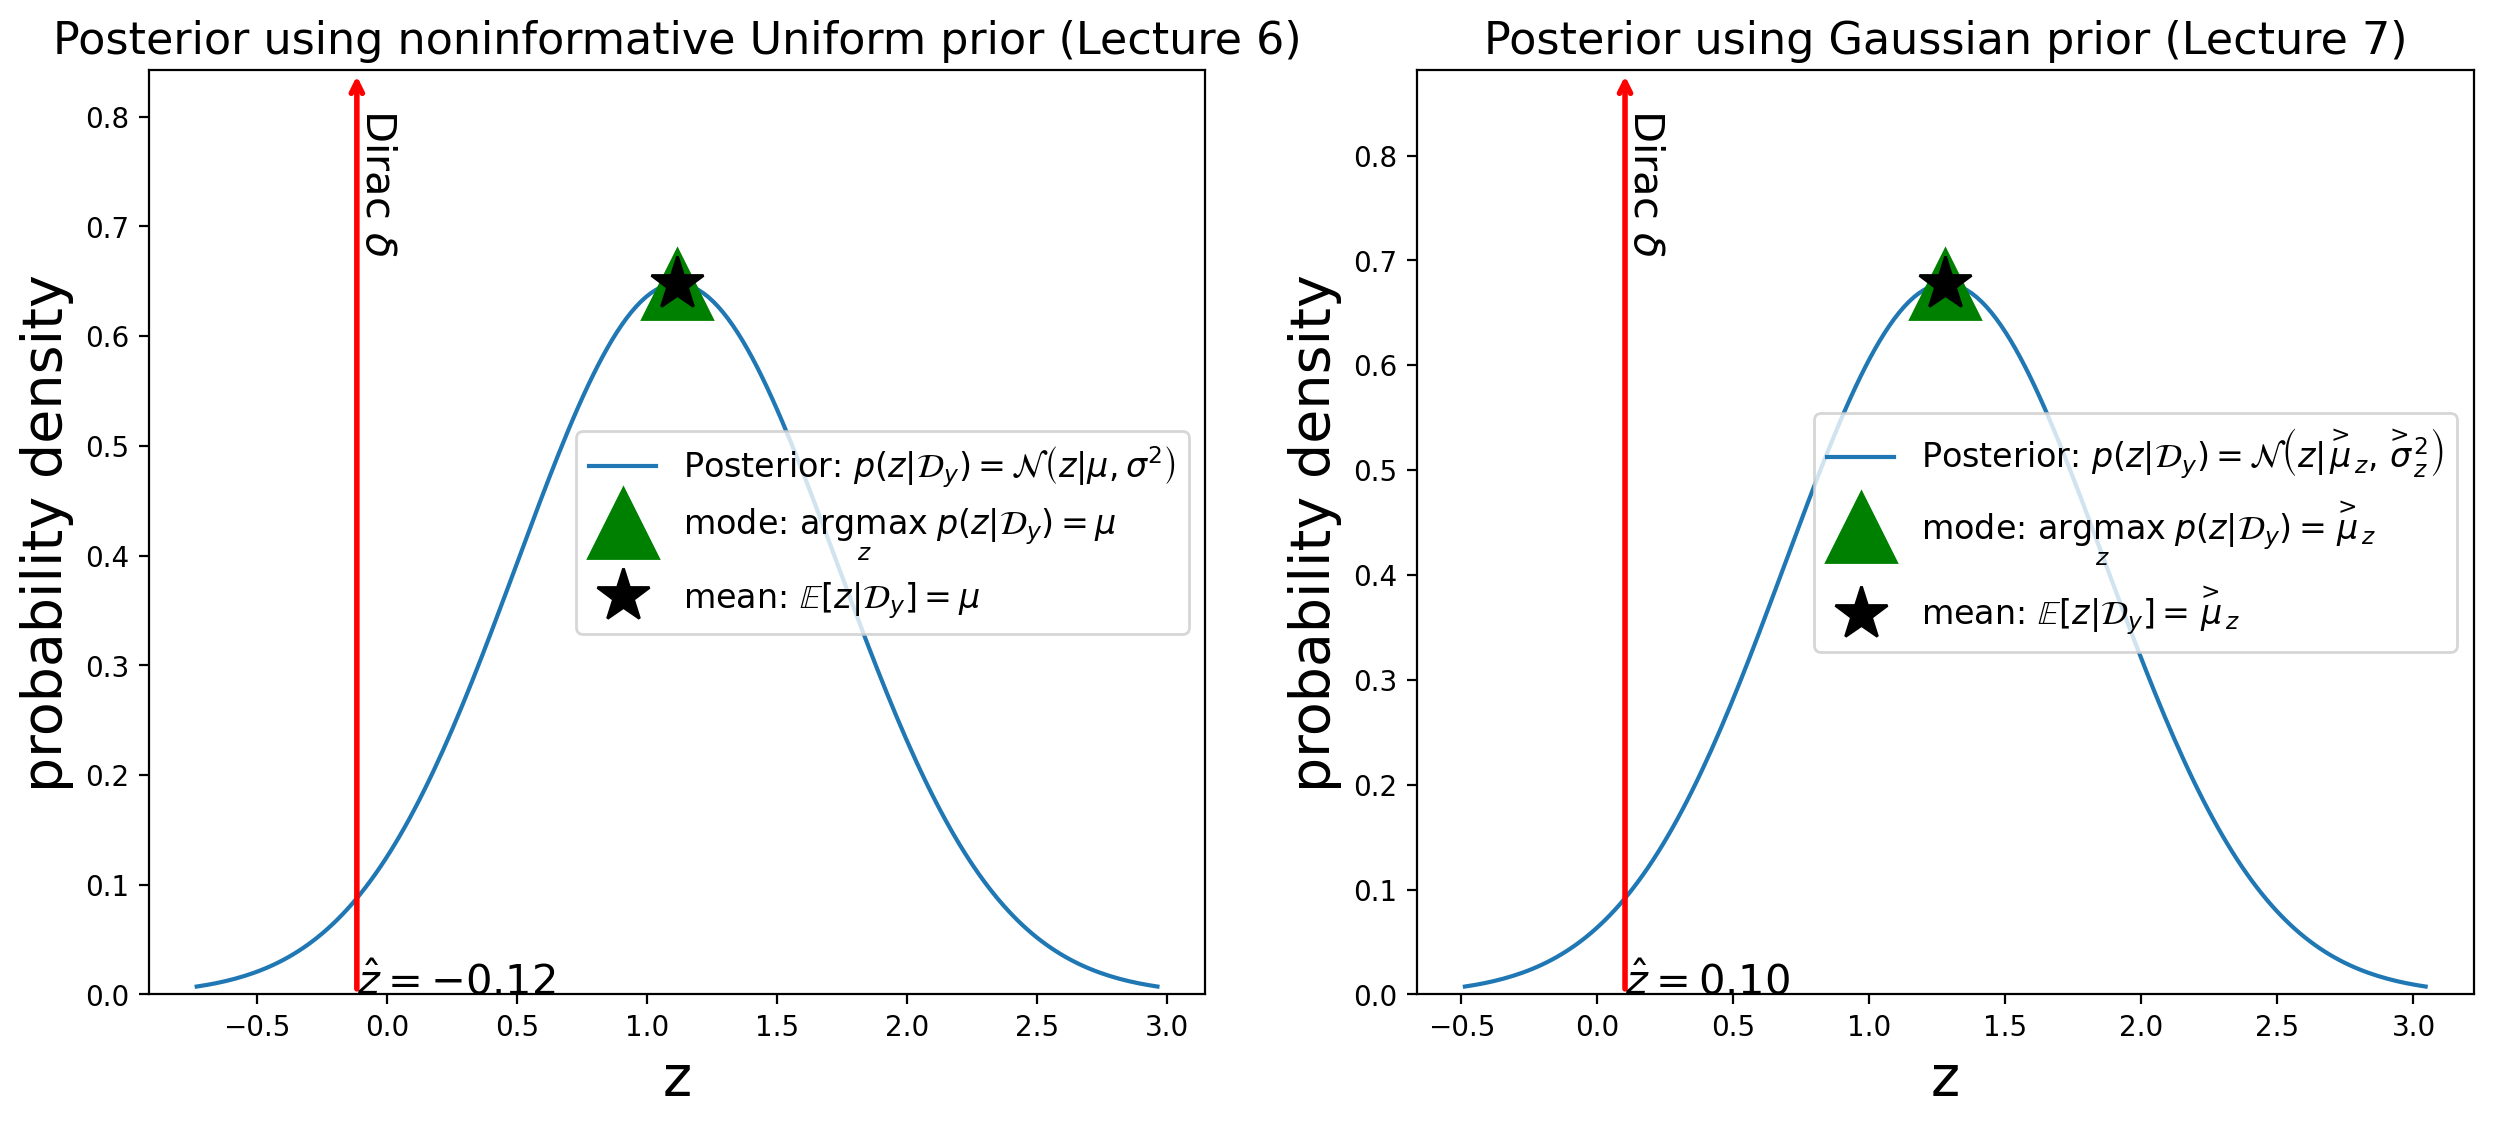

In [9]:
# Static plot (I skip this cell in presentations, but use it when printing slides to PDF)
Posteriors_and_Dirac_delta(z_hat_case1=mu_posterior_UniformPrior-2*sigma_posterior_UniformPrior,
                           z_hat_case2=mu_posterior_GaussianPrior-2*sigma_posterior_GaussianPrior)

In [10]:
# Showing posteriors and Dirac delta with interactive plot. Code is hidden in presentation.
from ipywidgets import interactive # so that we can interact with the plot
interactive_plot = interactive(Posteriors_and_Dirac_delta,
                       z_hat_case1=(min(zrange_case1), max(zrange_case1), 6/10*sigma_posterior_UniformPrior),
                       z_hat_case2=(min(zrange_case2), max(zrange_case2), 6/10*sigma_posterior_GaussianPrior) )
interactive_plot

interactive(children=(FloatSlider(value=-0.11578182202988208, description='z_hat_case1', max=2.963419613648121…

Probably you didn't hesitate to place the Dirac delta "distribution" at the mean or mode (they are the same for a Gaussian distribution)!

What if the Posterior distribution is something else? For example, a Gamma distribution

In [11]:
# This cell is hidden during the presentation

# You may recall that we plotted the Gamma distribution in Lecture 1
# -------------------------------------------------------------------------------
# PARAMETERS YOU CAN CHANGE! PLAY A BIT WITH THIS ;)
x = 75 # keeping the car velocity constant at 75 m/s as we have done before
N_samples = 3 # Let's say our data is composed of 3 samples (empirical observations)
mu_prior_z = 3; sigma_prior_z = 2 # parameters of the Gaussian prior distribution (used only in case 2)
# -------------------------------------------------------------------------------

from scipy.stats import gamma # import from scipy.stats the Gamma distribution
from scipy.optimize import minimize # import minimizer to calculate mode

a = 2.0 # this is the only input parameter needed for this distribution

# Define the support of the distribution (its domain) by using the
# inverse of the cdf (called ppf) to get the lowest z of the plot that
# corresponds to Pr = 0.01 and the highest z of the plot that corresponds
# to Pr = 0.99:
zrange_min = gamma.ppf(0.01, a)
zrange_max = gamma.ppf(0.99, a)
zrange = np.linspace(zrange_min, zrange_max, 200)

mu_posterior, var_posterior = gamma.stats(2.0, moments='mv') # This computes the mean and variance of the pdf

posterior_pdf_values = gamma.pdf(zrange, a)

pdf_at_mean = gamma.pdf(mu_posterior, a)

# Finding the maximum of a function can be done by minimizing
# the negative gamma pdf. So, we create a function that outputs
# the negative of the gamma pdf given the parameter a=2.0:
def neg_gamma_given_a(z): return -gamma.pdf(z,a)

# Use the default optimizer of scipy (L-BFGS) to find the
# maximum (by minimizing the negative gamma pdf). Note
# that we need to give an initial guess for the value of z,
# so we can use, for example, z=mu_z:
mode_posterior = minimize(neg_gamma_given_a,mu_posterior).x # in general this is a vector, but for Gamma it's just a scalar

pdf_at_mode = gamma.pdf(mode_posterior, a) # in general this is a vector, but for Gamma is just a scalar

# Plot the posteriors that we calculate above and the Dirac delta at different z_hat
def Gamma_Posterior_and_Dirac_delta(z_hat=0.5):
    fig_Gamma, ax = plt.subplots()
    ax.plot(zrange, posterior_pdf_values, label=r"Posterior: $p(z|\mathcal{D}_y) = \Gamma(z|a)$")

    ax.plot(mu_posterior, pdf_at_mean, 'r*', markersize=15, linewidth=2,
            label=r'Posterior mean: $\mathbb{E}[z|\mathcal{D}_y]$')

    ax.plot(mode_posterior, pdf_at_mode[0],'g^', markersize=15,
            linewidth=2,label=r'Posterior mode: $\underset{z}{\mathrm{argmax}}\; p(z|\mathcal{D}_y)$')
    ax.annotate("",
            xy=(z_hat, 0), xycoords='data',
            xytext=(z_hat, 1.3*pdf_at_mode[0]), textcoords='data',
            arrowprops=dict(arrowstyle="<-",
                            connectionstyle="arc3", color='r', lw=2),
            )
    ax.text(z_hat, pdf_at_mode[0]*1.05, 'Dirac $\delta$', rotation = -90, fontsize = 15)
    ax.text(z_hat, 0, ('$\hat{z}=%1.2f$' % z_hat) , fontsize = 15)
    ax.set_ylim(0, 1.3*pdf_at_mode[0])
    ax.set_xlabel("z", fontsize=20)
    ax.set_ylabel("probability density", fontsize=20)
    ax.legend(loc='upper right', fontsize=15)
    ax.set_title("Posterior being a Gamma pdf for $a=2.0$", fontsize=20)
    fig_Gamma.set_size_inches(7.5, 6) # scale figure to be wider (since there are 2 subplots)

In [12]:
# Showing posteriors and Dirac delta with interactive plot. Code is hidden in presentation.
interactive_plot = interactive(Gamma_Posterior_and_Dirac_delta,z_hat=(0.5, 6.5, 0.5 ) )
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='z_hat', max=6.5, min=0.5, step=0.5), Output()), _dom…

Maybe now you are hesitating where to place it?

Both are used in practice! And there are other estimates...

These are called **point estimates**.

* They reduce each unknown rv $z$ to a point $\hat{z}$ (transforming the posterior distribution into the Dirac delta "distribution").

Of course, as everything in life, some choices are better than others...

Common point estimates for determining $\hat{z}$:
* Maximum Likelihood Estimation (MLE):
    - You choose the mode (the maximum) of the posterior but you used a Uniform prior
* Maximum A Posteriori (MAP) estimate:
    - You choose the mode (the maximum) of the posterior (and your prior is **not** Uniform)
* Posterior mean estimate (no accronym!):
    - You choose the mean of the posterior.
* ... and so on

Calculating the **Posterior mean estimate** is not new to us:

$$
\mathbb{E}[z|\mathcal{D}]= \int_{\mathcal{Z}}z p(z|\mathcal{D}) dz
$$

But I told you that today we are all about avoiding integrals!

So, let's focus on two very common point estimates: **MAP** and **MLE**.

Both are obtained by finding the **mode** of the <font color='green'>posterior</font> (i.e. maximum location in the posterior):

$$
\require{color}\hat{\mathbf{z}} = \underset{z}{\mathrm{argmax}}\; {\color{green}p(z|\mathcal{D})}
$$

In other words, we need to solve an optimization problem.

But finding the mode of the posterior involves a few simple "tricks"...

$$\require{color}
{\color{green}p(z|y=\mathcal{D}_y)} = \frac{ {\color{blue}p(y=\mathcal{D}_y|z)}{\color{red}p(z)} } {p(y=\mathcal{D}_y)}
$$

#### Calculating the mode of posterior: Trick 1 (taking the $\log$)

We can separate the three terms of the <font color='green'>posterior</font> if we work with its $\log$:

$$
\log{{\color{green}p(z|y=\mathcal{D}_y)}} = \log{{\color{blue}p(y=\mathcal{D}_y|z)}} + \log{{\color{red}p(z)}} - \log{p(y=\mathcal{D}_y)}
$$

* Note: $\log$ is a monotone function, so the $\mathrm{argmax}$ of a function is the same as the $\mathrm{argmax}$ of the $\log$ of the function! Mathematically:

$$
\require{color}\hat{\mathbf{z}} = \underset{z}{\mathrm{argmax}}\; {\color{green}p(z|\mathcal{D})} = \underset{z}{\mathrm{argmax}}\; \log{{\color{green}p(z|\mathcal{D})}}
$$

#### Calculating the mode: Trick 2 (maximizing by minimizing the negative $\log$)

**Maximizing a function** is the same as **minimizing the negative of a function** (flipping the sign in the end).

Mathematically:

$$
\require{color}\hat{\mathbf{z}} = \underset{z}{\mathrm{argmax}}\; \log{{\color{green}p(z|\mathcal{D})}} = \underset{z}{\mathrm{argmin}} \left[-\log{{\color{green}p(z|\mathcal{D})}}\right]
$$

* In numerical optimization, this is very common practice!
    - Most optimization algorithms are designed to *minimize* functions.
    - In general, when we are optimizing (whether maximizing or minimizing) functions we call them "**objective**" functions. Yet, in particular:
        * when we are *minimizing* functions we call them "**loss**" or "cost" functions.
        * when we are *maximizing* functions we call them "**reward**" or "score" functions.

#### Calculating the mode: focusing on each $\log$ term

$$\require{color}
\begin{align}
\hat{\mathbf{z}} &= \underset{z}{\mathrm{argmax}}\left[\log{{\color{green}p(z|y=\mathcal{D}_y)}}\right] \\
&= \underset{z}{\mathrm{argmin}}\left[-\log{{\color{green}p(z|y=\mathcal{D}_y)}}\right] \\
&= \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}} - \log{{\color{red}p(z)}} + \log{p(y=\mathcal{D}_y)}\right]\\
&= \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}} - \log{{\color{red}p(z)}}+\text{constant}\right]\\
\end{align}
$$

* The last line can be further simplified because a constant does not change the location of the minimum.

So, we get: $\require{color}
\hat{\mathbf{z}} = \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}} - \log{{\color{red}p(z)}}\right]$

At this point, recall that the <font color='blue'>likelihood</font> is usually calculated assuming the training examples (observations) are sampled independently from the observation distribution $p(y|z)$:

$$
p(y=\mathcal{D}_y | z) = \prod_{i=1}^{N} p(y=y_i|z)
$$

which is known as the **i.i.d.** assumption (independent and identically distributed).

This means that the $\log$ likelihood usually has a very convenient form:

$$
\mathrm{LL}(z) = \log{{\color{blue}p(y=\mathcal{D}_y|z)}} = \sum_{i=1}^{N} \log{p(y=y_i|z)}
$$

which decomposed into a sum of terms, one per example (observation).

**In summary**, the mode of the posterior is calculated as:

$\require{color}
\hat{\mathbf{z}} = \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}} - \log{{\color{red}p(z)}}\right]$

where the first term is called **negative log likelihood**:

$\mathrm{NLL}(z) = -\mathrm{LL}(z) = -\log{{\color{blue}p(y=\mathcal{D}_y|z)}}=-\sum_{i=1}^{N} \log{p(y=y_i|z)}$

#### Maximum A Posterior (MAP) estimate

If we choose any <font color='red'>prior</font> distribution **except** the Uniform distribution, then the estimate is called MAP:

$\require{color}
\hat{\mathbf{z}}_{\text{map}} = \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}} - \log{{\color{red}p(z)}}\right]$

where $p(z)$ is **not** the Uniform distribution.

#### Maximum Likelihood Estimation (MLE)

In the special case of choosing the prior to be a **Uniform distribution**, $p(z) \propto 1$, then the mode of the posterior becomes the same as the mode of the (log) likelihood:

$$\require{color}
\hat{\mathbf{z}} = \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}} - \log{{\color{red}p(z)}}\right] = \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}}\right]
$$

and we say that we are using the Maximum Likelihood Estimation (MLE) for the unknown $z$:

$$
\hat{\mathbf{z}}_{\text{mle}} = \underset{z}{\mathrm{argmin}}\left[-\log{{\color{blue}p(y=\mathcal{D}_y|z)}}\right] = \underset{z}{\mathrm{argmin}}\left[-\sum_{i=1}^{N}\log{ p(y=y_i|z)}\right]
$$

where, again, the argument of this expression is called the **negative log likelihood** $\mathrm{NLL}(z)$.

## Summary of Machine Learning without going fully Bayesian

1. Approximate posterior by a **Dirac delta** "distribution" $\delta(z-\hat{z})$ where $\hat{z}$ is a chosen **Point estimate**:
    * MLE: $\hat{\mathbf{z}}_{\text{mle}} = \underset{z}{\mathrm{argmin}}\left[-\sum_{i=1}^{N}\log{ p(y=y_i|z)}\right]$
    * MAP: $\hat{\mathbf{z}}_{\text{map}} = \underset{z}{\mathrm{argmin}}\left[-\sum_{i=1}^{N}\log{ p(y=y_i|z)}- \log{p(z)}\right] $
    * etc.


2. Compute the <font color='orange'>PPD</font> using the Point estimate $\hat{z}$ and without calculating any integrals:
$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = \int p(y^*|z) \delta(z-\hat{z}) dz = p(y^*|z=\hat{z})
$$

## A reflection on Bayesian versus non-Bayesian perspective on ML

We can do one last simplification (but it can **mislead** us into believing that ML is not probabilistic!)

When the <font color='orange'>PPD</font> is approximated by the observation distribution for a Point estimate $\hat{z}$, allowing us to predict for new points $y^*$:

$$\require{color}
{\color{orange}p(y^*|\mathcal{D}_y)} = p(y^*|z=\hat{z})
$$

we can decide to focus on only making a prediction for the **mean** of the PPD and even forget that it is a distribution (we forget uncertainties!).

This is very common in ML literature!

# Part III: Bayesian Neural Networks

- Bayesian inference by numerical methods: calculating those tough integrals!
    - Markov Chain Monte Carlo sampling: Metropolis Hastings
    - Hamiltonan Monte Carlo
    - Stochastic Gradient Langevin Dynamics (and its preconditioned version)
- Bayesian neural networks

### Recap: ANN for regression with Gaussian prior
<img align=right src="./figures/recap.png" width=40%>


Assume a Gaussian prior  $\require{color} \color{red}p(z)$ on $\mathbf{w}$ and the MAP point estimate for an DNN

$$\require{color}
\hat{\mathbf{z}}_{\text{map}} = \underset{z}{\mathrm{argmin}}\left[-\log{p(\mathbf{y}=\mathbf{y}_n|\mathbf{x}=\mathbf{x}_n, \mathbf{z})} - \log{{\color{red}p(z)}}\right]$$


Calculating this point estimate (assuming a Gaussian prior):

$$
\begin{align}
\hat{\mathbf{z}}_{\text{map}} = \underset{z}{\mathrm{argmin}}\left[\frac{1}{2} ||\mathbf{Y}-\mathbf{f}(\mathbf{X},\mathbf{z}) ||_2^2 + \alpha ||\mathbf{w}||_2^2\right]
\end{align}
$$

**Optimization by your favorite gradient descent optimizer (e.g., ADAM; see Lectures 25,26 and 27) for exploring the loss landscape (the right figure) to get a point estimation.**

## What if we want to get the posterior distributon of weights?

- Conceptually, from point estimation (DNN) to posterior distribution (BNN), we need to go through Bayes' rule and determine the PPD according to the chosen observation distribution and prior distribution on the model parameters (weights and biases). Typically, we also assume Gaussian distributions for both. 

 <img align=center src="./figures/dnnbnn.png" width=60%>


## What if we want to get the posterior distributon of weights?

- As covered in Parts I and II, instead of obtaining an optimum (shown in the left figure), we need to integrate the whole loss (posterior) landscape, as indicated in the second figure. 

 <img align=center src="./figures/OPTIMIZATION_VS_INFERENCE.png" width=60%>

## Formulating posterior from Bayes' rule

\begin{align}
p\left( \mathbf{z} \mid \mathcal{D} \right) = \frac{p\left( \mathcal{D} \mid \mathbf{z} \right) p\left( \mathbf{z} \right)}{p\left( \mathcal{D} \right)} \propto p\left( \mathcal{D} \mid \mathbf{z} \right) \, p\left( \mathbf{z} \right)
\end{align}

- Likelihood: $
p\left( \mathcal{D} \mid \mathbf{z} \right)
= \mathcal{N}\!\left( \mathbf{Y} \,\middle|\, \mathbf{f}(\mathbf{X}, \mathbf{z}), \, \sigma^2 \mathbf{I} \right)
$, where $\sigma^2$ is the data noise.
- Prior:$
p\left( \mathbf{z} \right)
= \mathcal{N}\!\left( \mathbf{z} \,\middle|\, \mathbf{0}, \, \tau^2 \mathbf{I} \right)
$, where $\tau^2$ the variance of prior distribution.
- Log posterior can be derived by:

\begin{align}
\log p\left( \mathbf{z} \mid \mathcal{D} \right) &= \log p\left( \mathcal{D} \mid \mathbf{z} \right) + \log p\left( \mathbf{z} \right)\\
&= \log \left[ \frac{\exp\left( -\frac{1}{2\sigma^2} 
    \left\| \mathbf{Y} - \mathbf{f}(\mathbf{X}, \mathbf{z}) \right\|_2^2 \right) }{(2\pi\sigma^2)^{n/2}} 
    \right]  + \log \left[ \frac{ \exp\left( -\frac{1}{2\tau^2} 
    \left\| \mathbf{w} \right\|_2^2 \right) }{(2\pi\tau^2)^{m/2}} \right] \\
&= -\frac{n}{2} \log(2\pi\sigma^2) 
   -\frac{1}{2\sigma^2} \left\| \mathbf{Y} - \mathbf{f}(\mathbf{X}, \mathbf{z}) \right\|_2^2  -\frac{m}{2} \log(2\pi\tau^2) 
   -\frac{1}{2\tau^2} \left\| \mathbf{w} \right\|_2^2
\end{align}

where $\frac{1}{2\tau^2}$ corresponds to the weight decay $\alpha$ in a deterministic setting

## How to integrate the posterior distribution? 

- The process of computing the posterior distribution over these variables based on observed data, following Bayes’ rule, is referred to as *inference*. 


- Once the likelihood, prior, and training data are fixed, the posterior distribution is also determined.


- On the other hand, changing any hyperparameter—such as replacing a Gaussian likelihood with another distribution or altering the data noise $\sigma^2$—will modify the posterior distribution. (See Lecture 16).





### Computing the posterior (doing integration)

#### The slow, steady but impractical way: Markov Chain Monte Carlo (MCMC)

- A stochastic sampling method that constructs a Markov chain whose stationary distribution matches the target distribution $ p(\boldsymbol{\theta}) $. In the case of BNN, it is $p(\mathbf{z}|\mathcal{D})$.  
- It starts from an initial position $\boldsymbol{\theta}_0$ and generates candidate samples using a proposal distribution $ q(\boldsymbol{\theta}' \mid \boldsymbol{\theta}) $.  
- Each candidate is either accepted or rejected based on an acceptance rule (e.g., Metropolis–Hastings criterion), ensuring the chain explores the state space.  
- **Theoretical guarantee:** Under mild conditions (irreducibility, aperiodicity, detailed balance), the Markov chain converges to the target distribution as the number of iterations goes to infinity.  

 <img align=center src="./figures/ilustration_of_mcmc.png" width=30%> 



In [13]:
import torch
import numpy as np
from matplotlib import pyplot as plt

device = 'cpu' # run code in CPU (it's faster for the simple problems we are solving here)
# But if you want to use a GPU, you can uncomment the next line to automatically select the device:
#device = 'cuda' if torch.cuda.is_available() else 'cpu' 

# ------------------ Target Distribution ------------------ #
class TargetDistribution:
    """Mixture of Gaussians target distribution."""
    def __init__(self, w=np.array([0.2,0.4,0.3,0.1]), 
                 mu=np.array([-2.0,2.0,-4.0,0.6]),
                 sigma=np.array([1.0,1.0,1.2,0.4]), device='cpu'):
        self.device = device
        self.w = torch.tensor(w, dtype=torch.float32, device=device)
        self.mu = torch.tensor(mu, dtype=torch.float32, device=device)
        self.sigma = torch.tensor(sigma, dtype=torch.float32, device=device)
    
    def gaussian(self, x, mu, sigma):
        coef = 1.0 / (sigma * torch.sqrt(torch.tensor(2.0 * torch.pi, device=self.device)))
        exponent = -0.5 * ((x - mu) / sigma) ** 2
        return coef * torch.exp(exponent)

    def pdf(self, x):
        """Vectorized calculation of mixture pdf."""
        x = x.to(self.device).unsqueeze(-1)
        gauss_vals = self.gaussian(x, self.mu, self.sigma)
        return torch.sum(self.w * gauss_vals, dim=-1)

    def neg_log_pdf(self, x):
        return -torch.log(self.pdf(x))

    def plot_pdf(self, range_x=(-8,8), num_points=1000):
        x = torch.linspace(range_x[0], range_x[1], num_points, device=device)
        y = self.pdf(x)
        plt.figure(figsize=(5,4))
        plt.plot(x.cpu().numpy(), y.cpu().numpy(), label='Target PDF')
        plt.xlabel('x'); plt.ylabel('pdf'); plt.legend()
        plt.tight_layout(); plt.show()

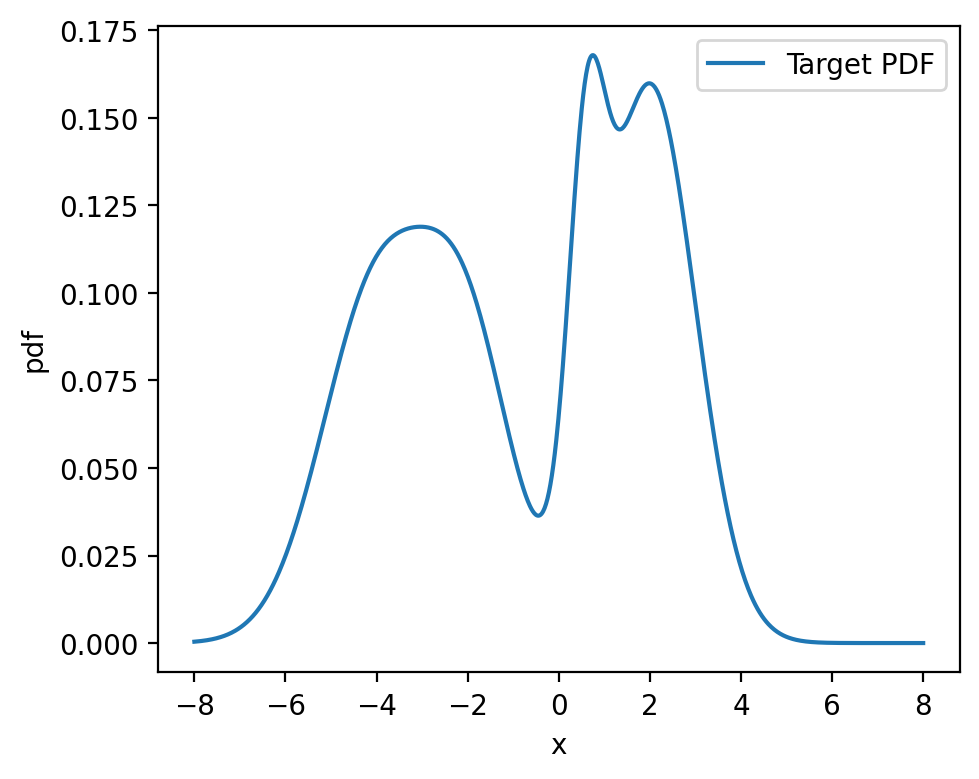

In [14]:
target  = TargetDistribution(w=np.array([0.2,0.4,0.3,0.1]), mu=np.array([-2.0,2.0,-4.0,0.6]),
                             sigma=np.array([1.0,1.0,1.2,0.4]), device=device)

target.plot_pdf()

In [15]:
class MetropolisHastings:
    def __init__(self, target_distribution, num_samples=2000, burn_in=200, proposal_std=1.0):
        self.target_distribution = target_distribution
        self.num_samples = num_samples
        self.burn_in = burn_in
        self.proposal_std = proposal_std
        self.device = device

    def run(self, num_trials=1, x0=None):
        self.trial_samples, self.full_chains, self.acceptance_rate = [], [], []

        for trial in range(num_trials):
            g = torch.Generator(device=self.device).manual_seed(1987 + trial)
            x = torch.randn((), generator=g, device=self.device) if x0 is None else torch.as_tensor(x0, device=self.device).reshape(())
            samples, full_chain = [], []
            accepts, accepts_post = 0, 0
            p_curr = self.target_distribution.pdf(x)

            for i in range(self.num_samples + self.burn_in):
                proposed_x = x + torch.randn((), generator=g, device=self.device) * self.proposal_std
                p_prop = self.target_distribution.pdf(proposed_x)
                alpha = torch.clamp(p_prop / (p_curr + 1e-12), max=1.0)

                if torch.rand((), generator=g, device=self.device) < alpha:
                    x = proposed_x
                    p_curr = p_prop
                    accepts += 1
                    if i >= self.burn_in:
                        accepts_post += 1

                full_chain.append(x.item())
                if i >= self.burn_in:
                    samples.append(x.item())

            rate = accepts / (self.num_samples + self.burn_in)
            rate_post = accepts_post / self.num_samples
            print(f'Trial {trial}: overall acceptance rate = {rate:.4f}, post burn-in = {rate_post:.4f}')

            self.trial_samples.append(torch.tensor(samples, device=self.device))
            self.full_chains.append(torch.tensor(full_chain, device=self.device))
            self.acceptance_rate.append(rate_post)

        return self.trial_samples
    
    # ------------------ Autocorrelation ------------------ #
    @staticmethod
    def autocorrelation(x, max_lag=100):
        x = np.asarray(x)
        x = x - np.mean(x)
        result = np.correlate(x, x, mode='full')
        acf = result[result.size//2:]
        acf = acf / acf[0]
        return acf[:max_lag+1]

    # ------------------ Plotting ------------------ #
    def plot_trials(self, bins=30, x_range=(-10,10), num_points=1000, max_lag=100):
        x_plot = torch.linspace(*x_range, num_points, device=self.device)
        pdf = self.target_distribution.pdf(x_plot).cpu().numpy()

        for i, (samples, chain) in enumerate(zip(self.trial_samples, self.full_chains)):
            fig = plt.figure(figsize=(12,4))
            gs = fig.add_gridspec(1, 2, width_ratios=[2,1])

            # Left: histogram + PDF
            ax0 = fig.add_subplot(gs[0,0])
            ax0.hist(samples.cpu().numpy(), bins=bins, density=True, alpha=0.6, label='Samples')
            ax0.plot(x_plot.cpu().numpy(), pdf, 'r--', lw=2, label='Target PDF')
            ax0.set_xlabel('x'); ax0.set_ylabel('Density'); ax0.set_title(f'Trial {i+1}: Histogram + PDF')
            ax0.legend()

            # Right: trace + autocorrelation
            gs_right = gs[0,1].subgridspec(2,1,hspace=0.7)

            # Trace plot
            ax1 = fig.add_subplot(gs_right[0,0])
            ax1.plot(chain.cpu().numpy(), lw=0.5)
            ax1.axvline(self.burn_in, color='red', ls='--', lw=1, label="Burn-in cutoff")
            ax1.set_xlabel('Iteration'); ax1.set_ylabel('x'); ax1.set_title('Trace plot'); ax1.legend()

            # Autocorrelation plot
            ax2 = fig.add_subplot(gs_right[1,0])
            acf = self.autocorrelation(samples.cpu().numpy(), max_lag=max_lag)
            ax2.stem(range(len(acf)), acf)
            ax2.set_xlabel('Lag'); ax2.set_ylabel('Autocorrelation'); ax2.set_title('Sample Autocorrelation')

            plt.tight_layout(); plt.show()

Trial 0: overall acceptance rate = 0.5467, post burn-in = 0.5800
Trial 1: overall acceptance rate = 0.4200, post burn-in = 0.4000
Trial 2: overall acceptance rate = 0.5000, post burn-in = 0.5800


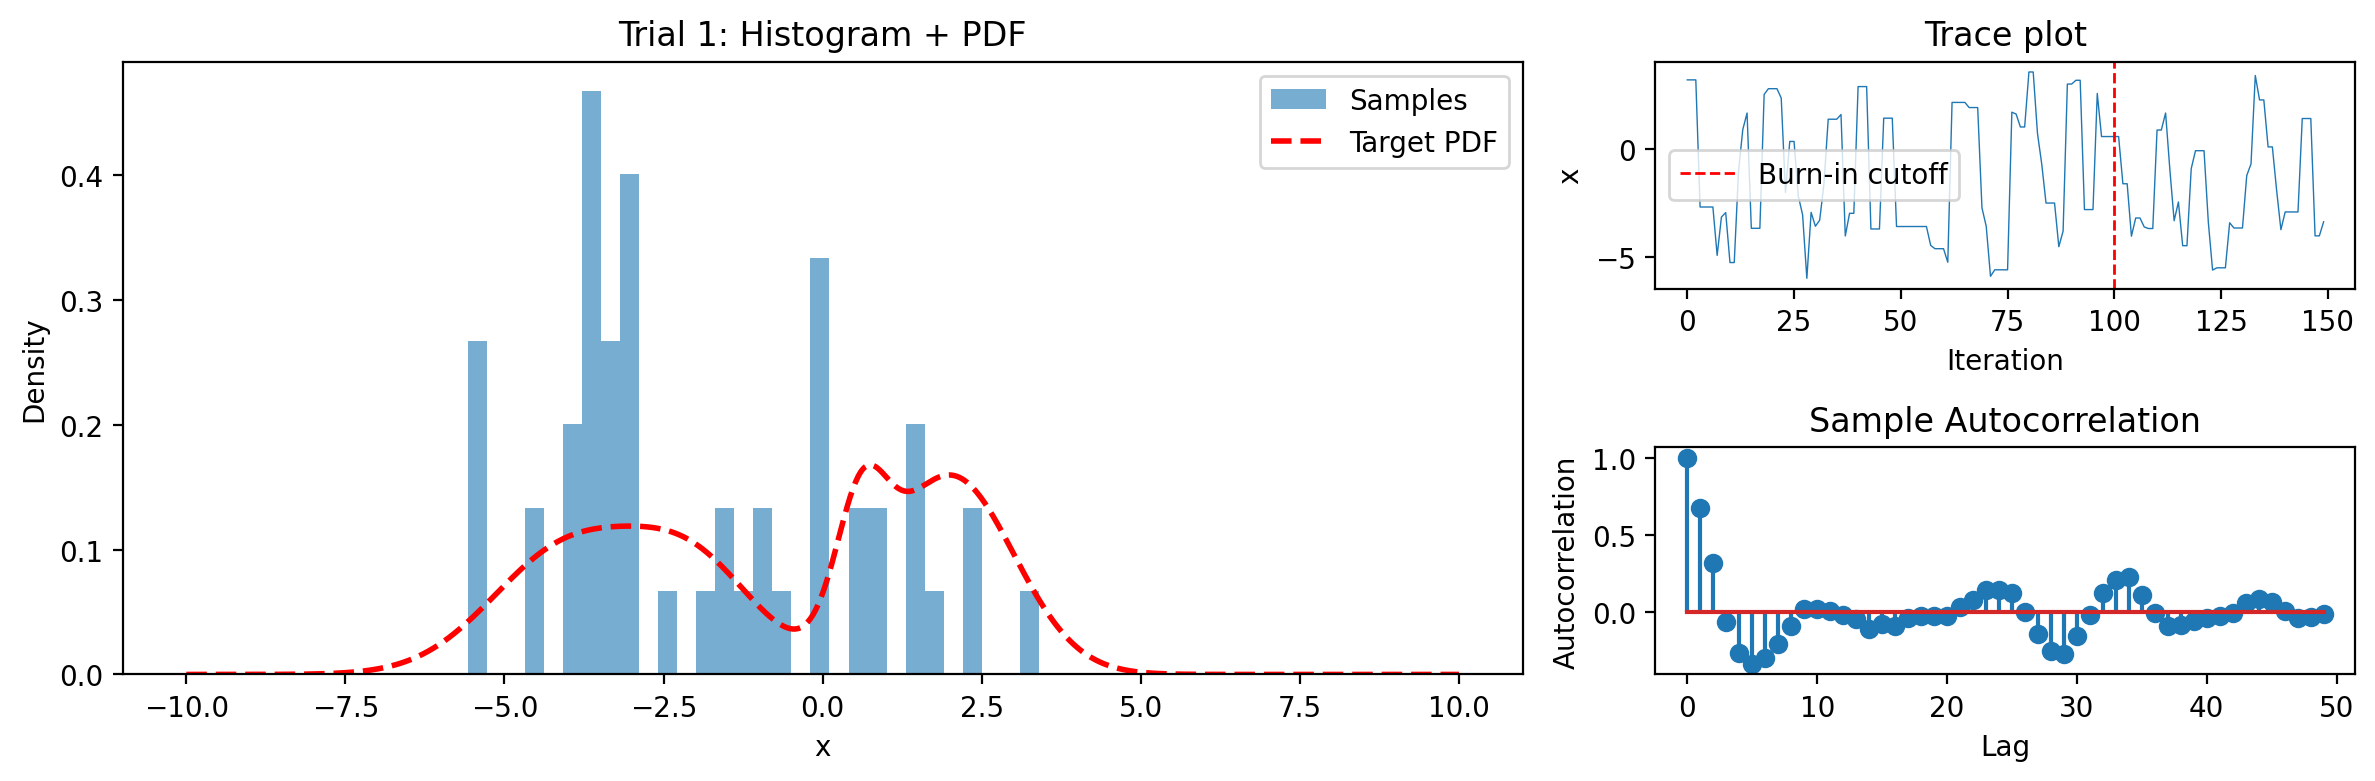

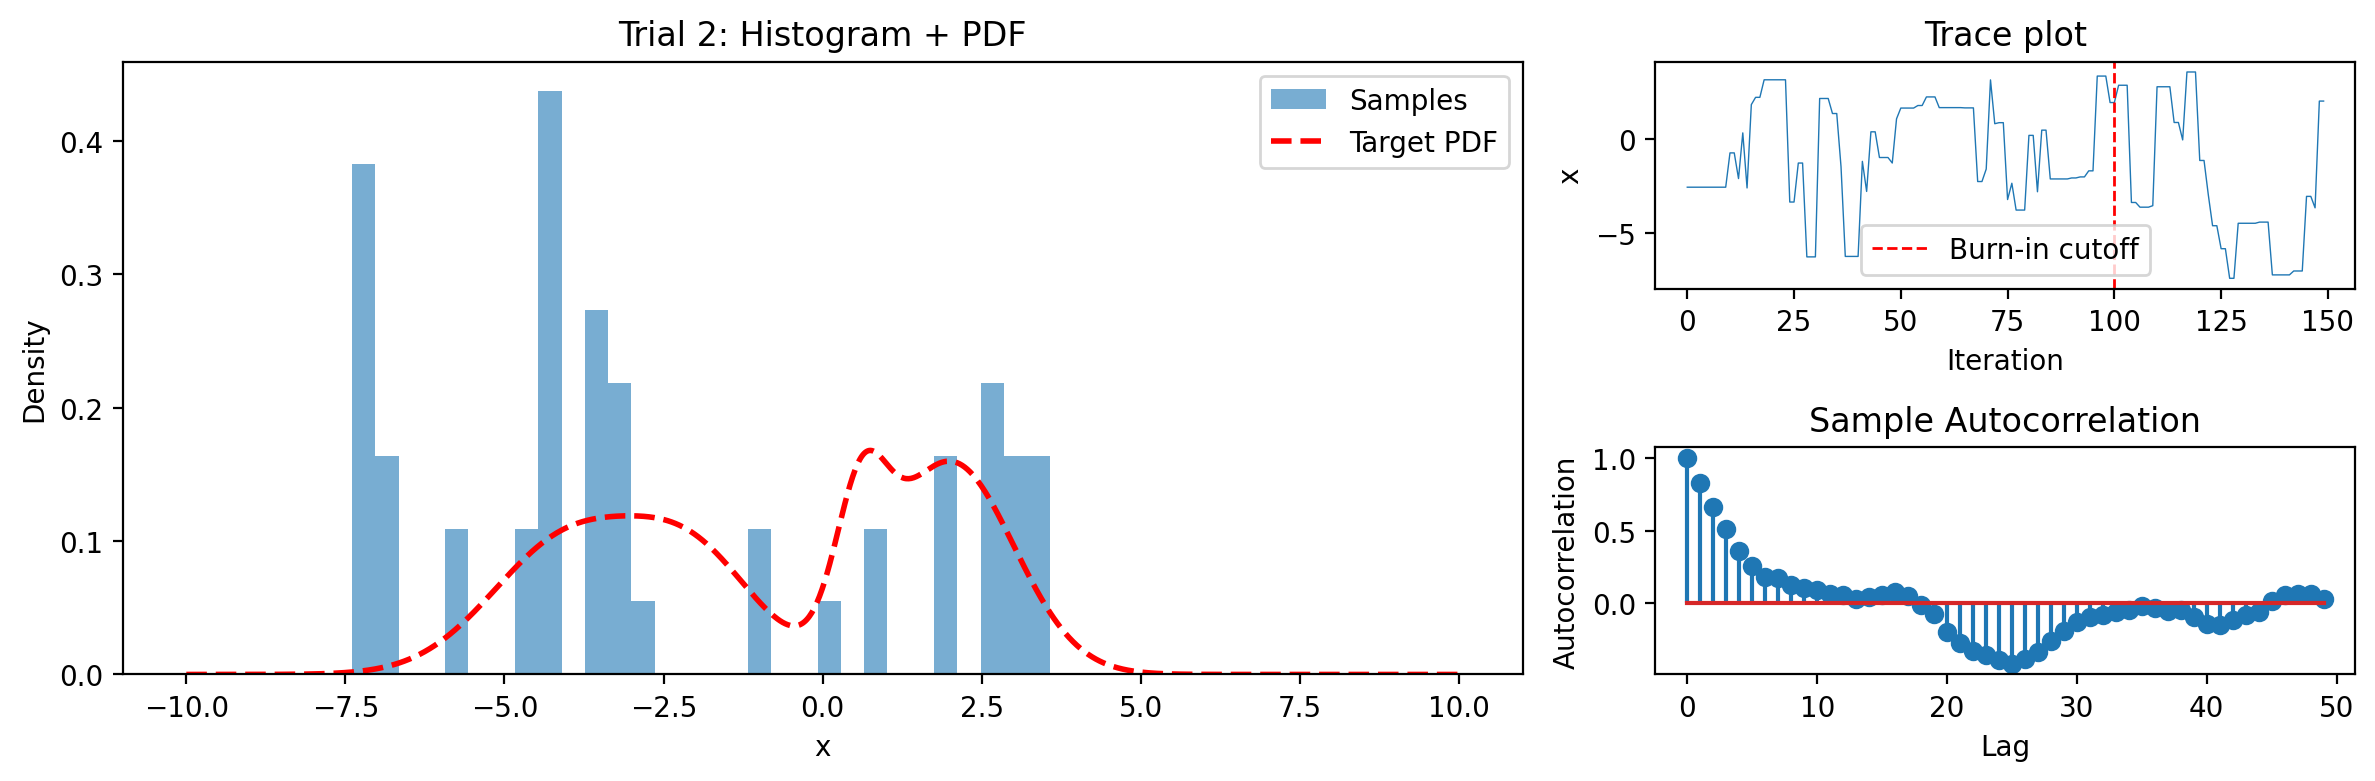

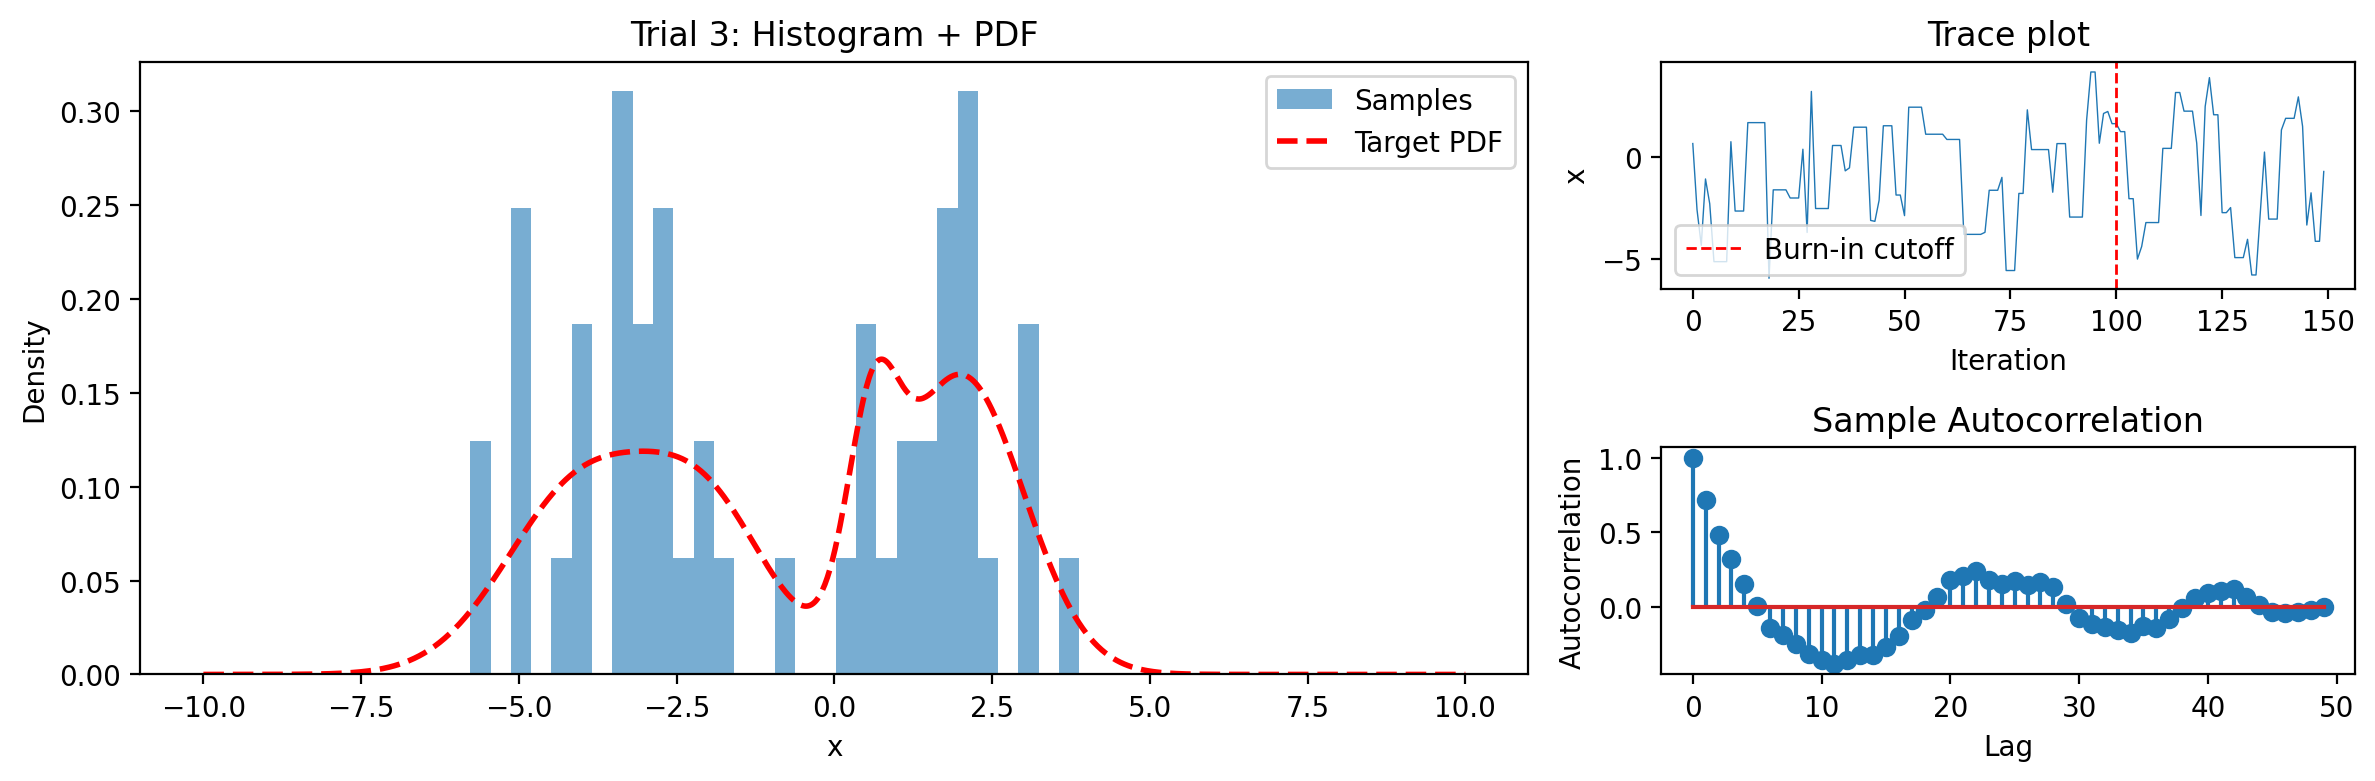

In [44]:
# play with the hyperparameters of RWMH algorithm: burn_in, proposal_std (a.k.a. step_size), number_samples
MH = MetropolisHastings(target_distribution=target,
                        num_samples=50, 
                        burn_in=100, 
                        proposal_std=5.0)
# run 3 times the samples
results = MH.run(num_trials=3)
# plot the sampled pdf with the true one
MH.plot_trials(max_lag=100)

**Note about Autocorrelation measure in MCMC**

Autocorrelation function (ACF) helps diagnose Markov Chain Monte Carlo (MCMC) methods, including the Random Walk Metropolis–Hastings (RWMH) algorithm that we are discussing here. It helps us understand how "independent" the samples are and how efficiently the chain explores the target distribution.

Autocorrelation at lag $k$ is defined as:

$$\rho_k = \frac{\text{Cov}(x_t, x_{t+k})}{\text{Var}(x_t)}$$

- Measures how correlated a sample is with another sample $k$ steps later.
- $\rho_0 = 1$ (a sample is always perfectly correlated with itself).
- If $\rho_k \to 0$ quickly as $k$ increases, consecutive samples are nearly independent.

**Interpretation in MCMC:**  
- Low autocorrelation $\to$ samples explore the space efficiently and provide more independent information.  
- High autocorrelation $\to$ samples are highly dependent $\to$ need more iterations to get independent draws.

**Note about effect of proposal step size (`proposal_std`) in RWMH**

Small `proposal_std` (tiny steps)
- The sampler moves only slightly each iteration.  
- Consecutive samples are very similar $\to$ **high autocorrelation**.  
- Chain mixes slowly and can get "stuck" locally.  
- In the autocorrelation plot, $\rho_k$ remains high even for large lags.

Large `proposal_std` (big steps)
- Proposals jump farther, exploring the state space faster.  
- Consecutive samples are less correlated $\to$ **lower autocorrelation**.  
- If too large, many proposals are rejected $\to$ repeated samples $\to$ can also increase autocorrelation.  

**Key idea:** There is a **sweet spot** for `proposal_std` that balances acceptance rate and exploration.

**Practical Takeaways**

- **Low `proposal_std`** $\to$ slow exploration, high autocorrelation  
- **High `proposal_std`** $\to$ can move farther, lower autocorrelation, but watch acceptance rate  
- Autocorrelation plots are an excellent diagnostic to **check how well your sampler explores the target distribution**.

### Slightly faster method (for large problems): Hamiltonian Monte Carlo (HMC)
- One fatal drawback of RWMH algorithm is that the random walk procedure prevents the scalability.

- Hamiltonian Monte Carlo (Neal 2012) improves the convergence, with embedding the concept of Hamitonian mechanics. 



<img src="figures/hmc.png" title="Hamiltonian mechanics" width="30%" align="right">
<!-- <img align=center src="./figures/hmc.png" width=20%>  -->
A Hamiltonian mechanical system can be imagined as a ball rolling in a frictionless bowl:
$$
\mathcal{H}\left(\boldsymbol{\theta}, \mathrm{v} \right) =
   \mathcal{\varepsilon(\boldsymbol{\theta})} + \mathcal{K}(\mathrm{v})
$$

- potential energy: $\mathcal{\varepsilon(\boldsymbol{\theta})} = - \log \, p(\boldsymbol{\theta})$

- kinetic energy: $\mathcal{K}(\mathrm{v}) = \frac{1}{2}\mathrm{v}^{T} {\Sigma}^{-1} \mathrm{v}$

where ${\Sigma}$ is the mass matrix.

**Key Idea**
- Uses Hamiltonian dynamics to propose new states by simulating trajectories shown in the figure
- **Efficiently explores** the target distribution by following energy-preserving paths.



### How to update position and velocity within Hamiltonian system: 

- **Euler's method**

$$\mathrm{v}_{t+1} = \mathrm{v}_{t} + \eta \frac{d\mathrm{v}(\mathrm{\theta}_t, \mathrm{v}_t)}{dt}= \mathrm{v}_{t}-\eta \frac{\partial \mathcal{\varepsilon}(\mathrm{\theta}_t)}{\partial \mathrm{\theta}} $$

$$\mathrm{\theta}_{t+1} = \mathrm{\theta}_{t} + \eta \frac{d\mathrm{\theta}(\mathrm{\theta}_t, \mathrm{v}_t)}{dt}= \mathrm{\theta}_{t}-\eta \frac{\partial \mathcal{K}(\mathrm{v}_t)}{\partial \mathrm{v}}$$

- **Modified Euler's method: _Improve accuracy_**

$$\mathrm{v}_{t+1} = \mathrm{v}_{t} + \eta \frac{d\mathrm{v}(\mathrm{\theta}_t, \mathrm{v}_t)}{dt}= \mathrm{v}_{t}-\eta \frac{\partial \mathcal{\varepsilon}(\mathrm{\theta}_t)}{\partial \mathrm{\theta}} $$

$$\mathrm{\theta}_{t+1} = \mathrm{\theta}_{t} + \eta \frac{d\mathrm{\theta}(\mathrm{\theta}_t, \mathrm{v}_{t+1})}{dt}= \mathrm{\theta}_{t}-\eta \frac{\partial \mathcal{K}(\mathrm{v}_{t+1})}{\partial \mathrm{v}}$$


### How to update position and velocity within Hamiltonian system: 

- **Leapfrog method:** *further improve the accuracy, with multiple leapfrog steps update*

$$\mathrm{v}_{t+\frac{1}{2}} =\mathrm{v}_{t}-\frac{\eta }{2}\frac{\partial \mathcal{\varepsilon}(\mathrm{\theta}_t)}{\partial \mathrm{\theta}} $$

$$\mathrm{\theta}_{t+1} =  \mathrm{\theta}_{t}+\eta \frac{\partial \mathcal{K}(\mathrm{v}_{t+\frac{1}{2}})}{\partial \mathrm{v}}$$

$$\mathrm{v}_{t+1} =\mathrm{v}_{t+\frac{1}{2}}-\frac{\eta }{2}\frac{\partial \mathcal{\varepsilon}(\mathrm{\theta}_{t+1})}{\partial \mathrm{\theta}} $$

In [17]:
from torch.autograd import grad

class HMC:
    def __init__(self,
                 potential_fn,    # negative log posterior
                 num_dim,
                 step_size=0.1,
                 leapfrog_steps=10,
                 num_samples=100,
                 burn_in=10,
                 device=None):
        """
        Hamiltonian Monte Carlo (HMC) sampler.

        Args:
            potential_fn: callable returning potential energy (negative log posterior)
            num_dim: dimensionality of parameter space
            step_size: leapfrog step size (ε)
            leapfrog_steps: number of leapfrog steps (L)
            num_samples: number of samples to collect (after burn-in)
            burn_in: number of burn-in iterations
            device: 'cpu' or 'cuda'. Computations done here.
        """
        self.potential_fn = potential_fn
        self.num_dim = num_dim
        self.step_size = step_size
        self.leapfrog_steps = leapfrog_steps
        self.num_samples = num_samples
        self.burn_in = burn_in
        self.device = device or ('cuda' if torch.cuda.is_available() else 'cpu')

    # -------------------------------
    # Energies
    # -------------------------------
    def potential_energy(self, x):
        """Compute potential energy U(x) = negative log posterior."""
        return self.potential_fn(x.to(self.device))

    def kinetic_energy(self, p):
        """Kinetic energy K(p) = 0.5 * p^T p (unit mass)."""
        return 0.5 * torch.sum(p ** 2)

    # -------------------------------
    # Gradient of potential
    # -------------------------------
    def grad_potential_energy(self, x):
        x = x.clone().detach().requires_grad_(True)
        U = self.potential_energy(x)
        grad_U = grad(U, x, create_graph=False)[0]
        return grad_U

    # -------------------------------
    # Leapfrog integrator
    # -------------------------------
    def leapfrog(self, x, p):
        x = x.clone()
        p = p.clone()

        # half-step momentum update
        p -= 0.5 * self.step_size * self.grad_potential_energy(x)

        # full-step updates
        for i in range(self.leapfrog_steps):
            x += self.step_size * p  # full step for position
            if i != self.leapfrog_steps - 1:
                p -= self.step_size * self.grad_potential_energy(x)

        # final half-step momentum
        p -= 0.5 * self.step_size * self.grad_potential_energy(x)

        return x, -p  # negate momentum for reversibility

    # -------------------------------
    # Sampling
    # -------------------------------
    def sample(self, init_position=None):
        total_iters = self.num_samples + self.burn_in

        # Preallocate storage on device for efficiency
        self.chain_potential = torch.empty(total_iters, device=self.device)
        self.chain_samples = torch.empty((total_iters, self.num_dim), device=self.device)

        samples = []
        accept_count = 0

        # Initial position
        if init_position is None:
            x = torch.randn(self.num_dim, device=self.device)
        else:
            x = init_position.to(self.device).reshape(-1)

        for i in range(total_iters):
            x = x.detach()
            p = torch.randn(self.num_dim, device=self.device)

            cur_U = self.potential_energy(x)
            cur_K = self.kinetic_energy(p)

            # propose new state
            x_prop, p_prop = self.leapfrog(x, p)
            prop_U = self.potential_energy(x_prop)
            prop_K = self.kinetic_energy(p_prop)

            # Metropolis acceptance
            accept_prob = torch.exp(cur_U - prop_U + cur_K - prop_K)
            if torch.rand(1, device=self.device) < accept_prob:
                x = x_prop
                accepted = True
            else:
                accepted = False

            # store chain (potential on device, samples on device)
            self.chain_potential[i] = cur_U
            self.chain_samples[i] = x

            # collect posterior samples on CPU (memory-efficient)
            if i >= self.burn_in:
                samples.append(x.cpu())
                if accepted:
                    accept_count += 1

        acceptance_rate = accept_count / self.num_samples
        return torch.stack(samples), acceptance_rate

    # -------------------------------
    # Full chain access
    # -------------------------------
    def get_chain_samples(self):
        """Return all chain samples (burn-in included). Already on device."""
        return self.chain_samples

In [18]:
# -------------------------------
# Plotting HMC results
# -------------------------------
def plot_hmc_results(all_samples, hmc_objects, target, x_range=(-8,8), bins=30):
    """
    Plot results of multiple HMC runs.

    Left: histogram + target PDF
    Right: stacked trace + potential energy
    """
    for i, (samples, hmc) in enumerate(zip(all_samples, hmc_objects)):
        fig = plt.figure(figsize=(12,4))
        gs = fig.add_gridspec(1,2,width_ratios=[2,1])

        # -------------------------------
        # Histogram + target PDF
        # -------------------------------
        ax0 = fig.add_subplot(gs[0,0])
        ax0.hist(samples.cpu().numpy(), bins=bins, density=True, alpha=0.6, label='Samples')
        x_plot = torch.linspace(*x_range, 1000)  # CPU tensor
        ax0.plot(x_plot.numpy(), target.pdf(x_plot).cpu().numpy(),
                 'r--', lw=2, label='Target PDF')
        ax0.set_xlabel('x'); ax0.set_ylabel('Density'); ax0.set_title(f'Trial {i+1}: Histogram + PDF')
        ax0.legend()

        # -------------------------------
        # Trace + potential energy
        # -------------------------------
        gs_right = gs[0,1].subgridspec(2,1,hspace=0.7)

        # Trace
        ax1 = fig.add_subplot(gs_right[0,0])
        ax1.plot(hmc.get_chain_samples().cpu().numpy(), lw=0.5)
        ax1.axvline(hmc.burn_in, color='red', ls='--', lw=1, label='Burn-in cutoff')
        ax1.set_xlabel('Iteration'); ax1.set_ylabel('x'); ax1.set_title('Trace plot'); ax1.legend()

        # Potential energy
        ax2 = fig.add_subplot(gs_right[1,0])
        ax2.plot(hmc.chain_potential.cpu().numpy(), lw=0.5, color='orange')
        ax2.axvline(hmc.burn_in, color='red', ls='--', lw=1)
        ax2.set_xlabel('Iteration'); ax2.set_ylabel('Potential energy'); ax2.set_title('Potential energy (NLL)')

        plt.tight_layout()
        plt.show()

In [49]:
#^^^^^^ code is hidden from presentation (too long) ^^^^^^
# -------------------------------
# Run HMC multiple times
# -------------------------------
all_samples = []   # store posterior samples (CPU)
hmc_objs = []      # store HMC objects for trace/potential visualization

num_runs = 3
for run in range(num_runs):
    # Initialize HMC sampler
    hmc = HMC(
        potential_fn=target.neg_log_pdf,  # negative log density (potential energy)
        num_dim=1,                         # dimensionality of x
        step_size=2.0,                     # leapfrog step size
        leapfrog_steps=1,                 # number of leapfrog steps
        num_samples=500,                   # number of posterior samples
        burn_in=50,                         # burn-in iterations
        device=device                       # compute device ('cuda' or 'cpu')
    )

    # Sample from the posterior
    samples, acc_rate = hmc.sample()
    print(f"Run {run+1} - Acceptance Rate: {acc_rate:.4f}")

    # Store results
    all_samples.append(samples.view(-1))  # keep samples on CPU for plotting
    hmc_objs.append(hmc)

Run 1 - Acceptance Rate: 0.7200
Run 2 - Acceptance Rate: 0.7000
Run 3 - Acceptance Rate: 0.6420


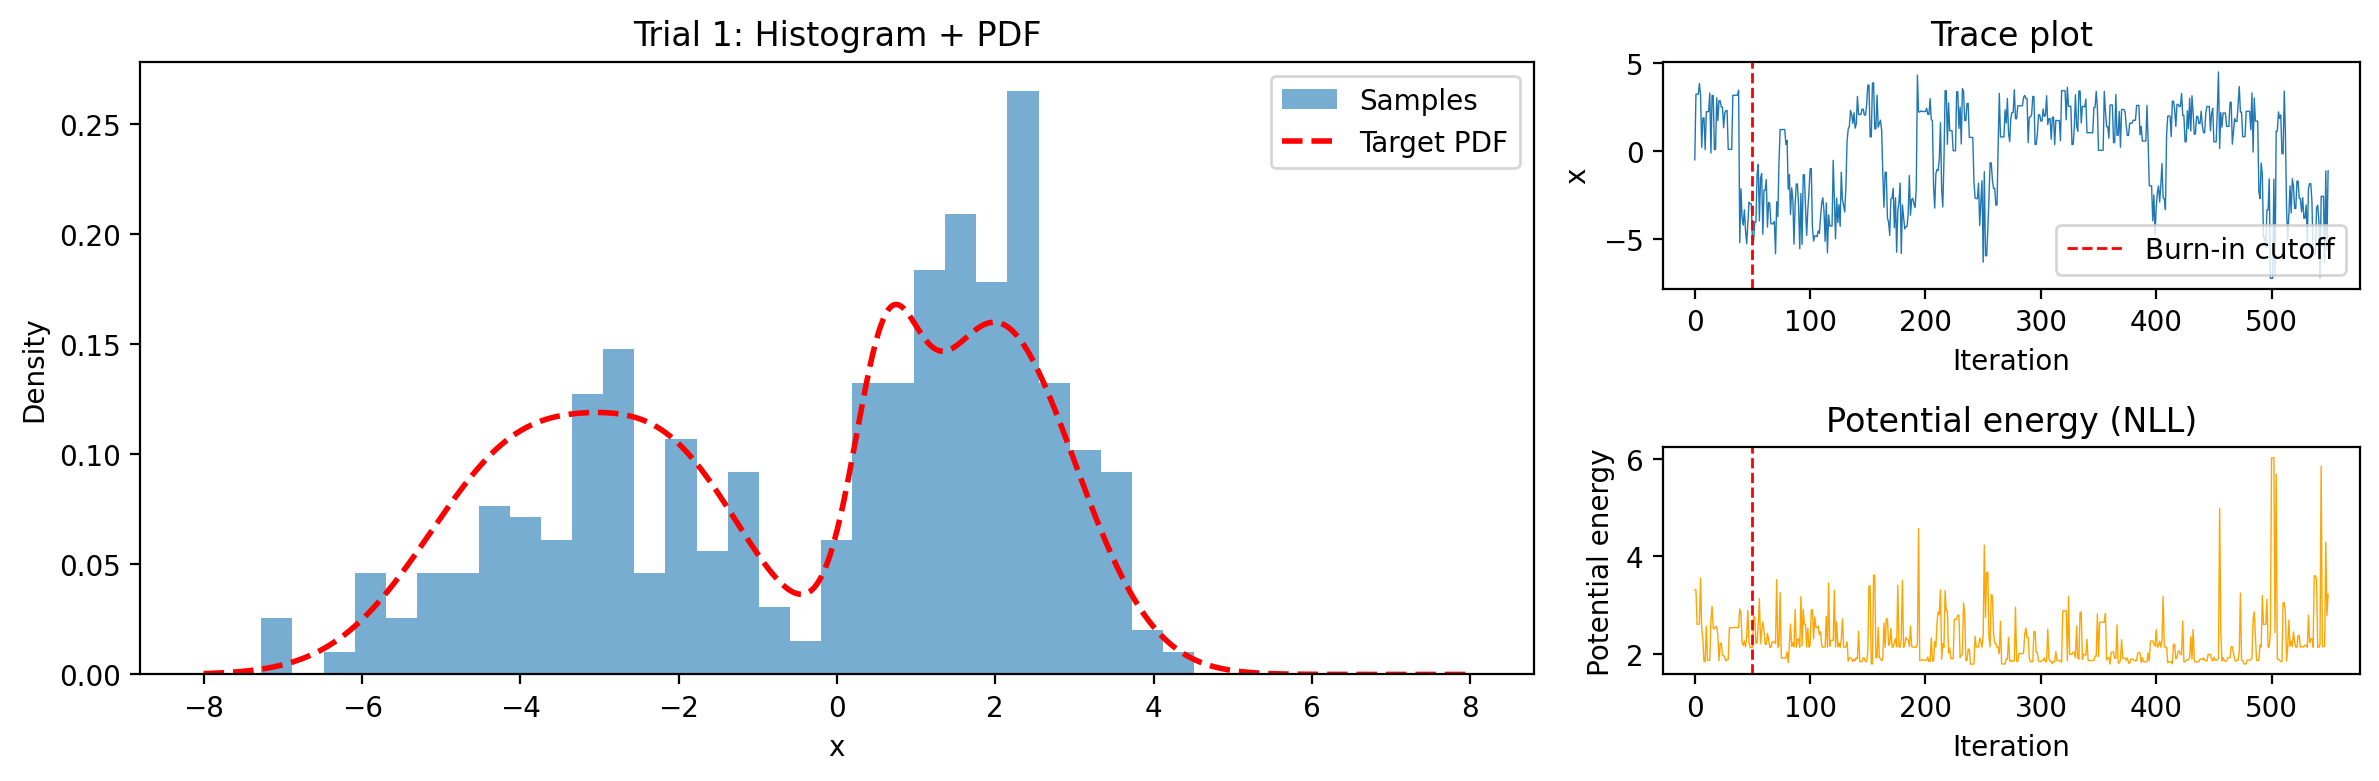

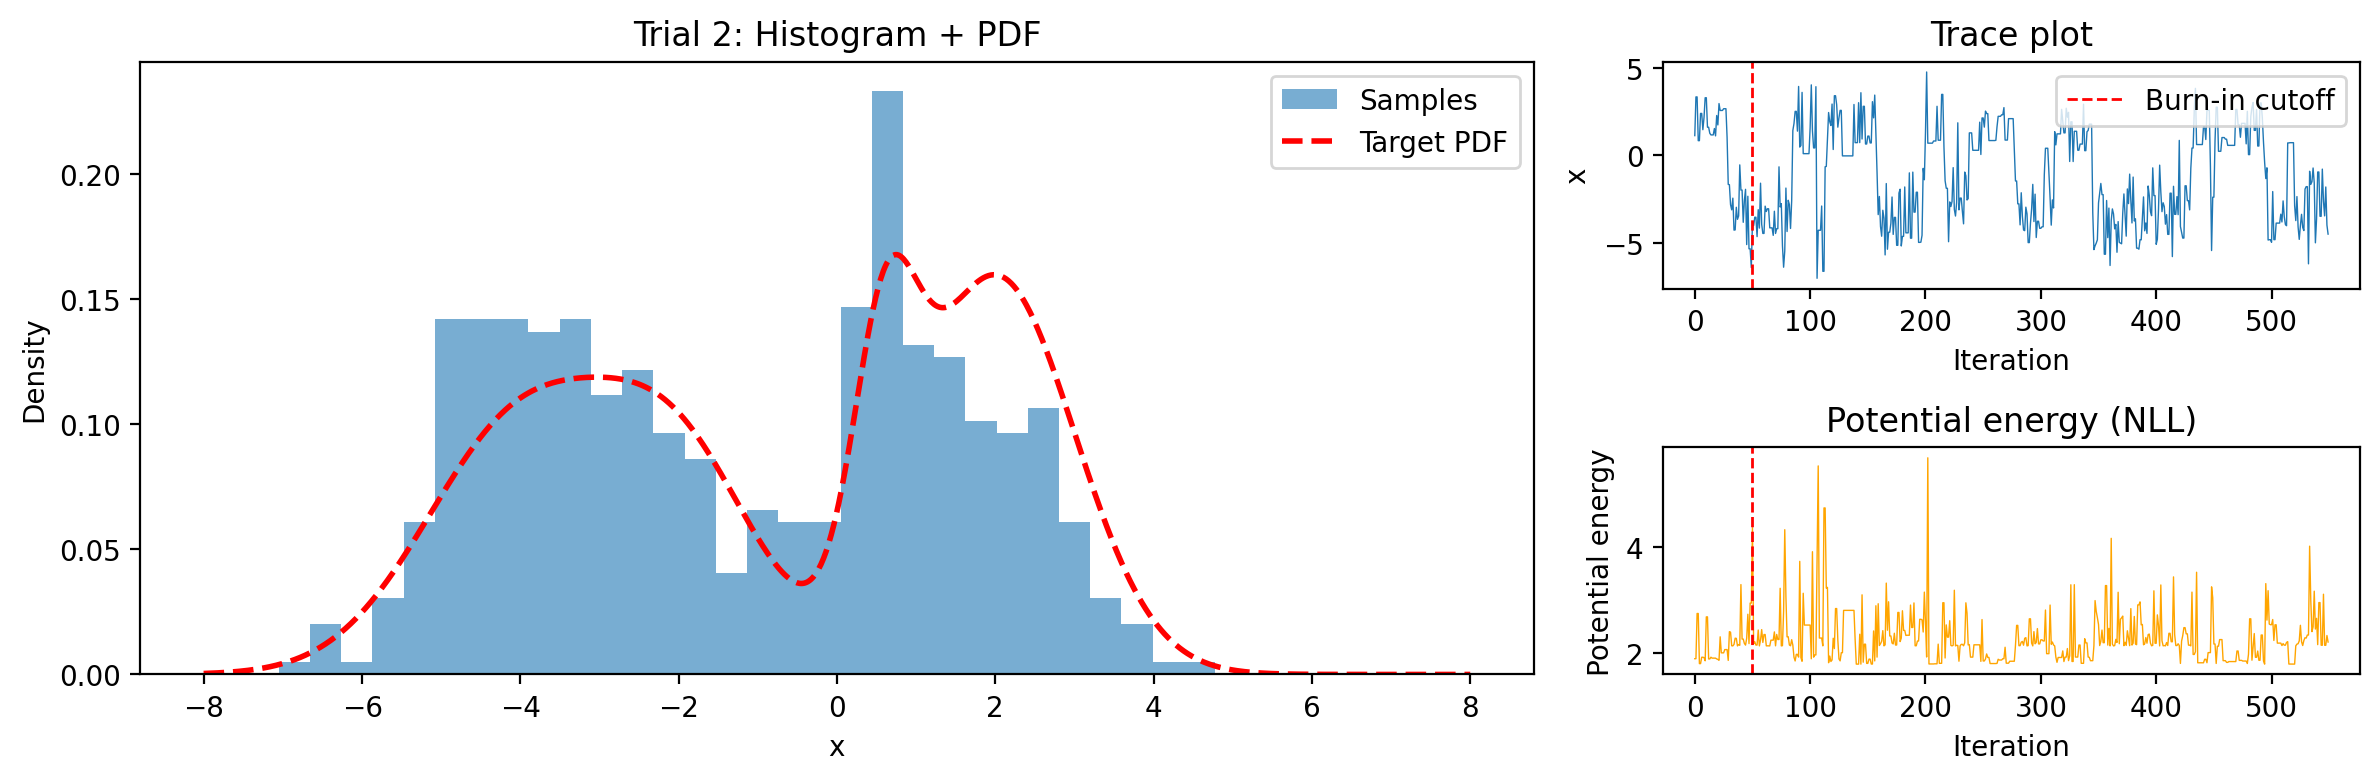

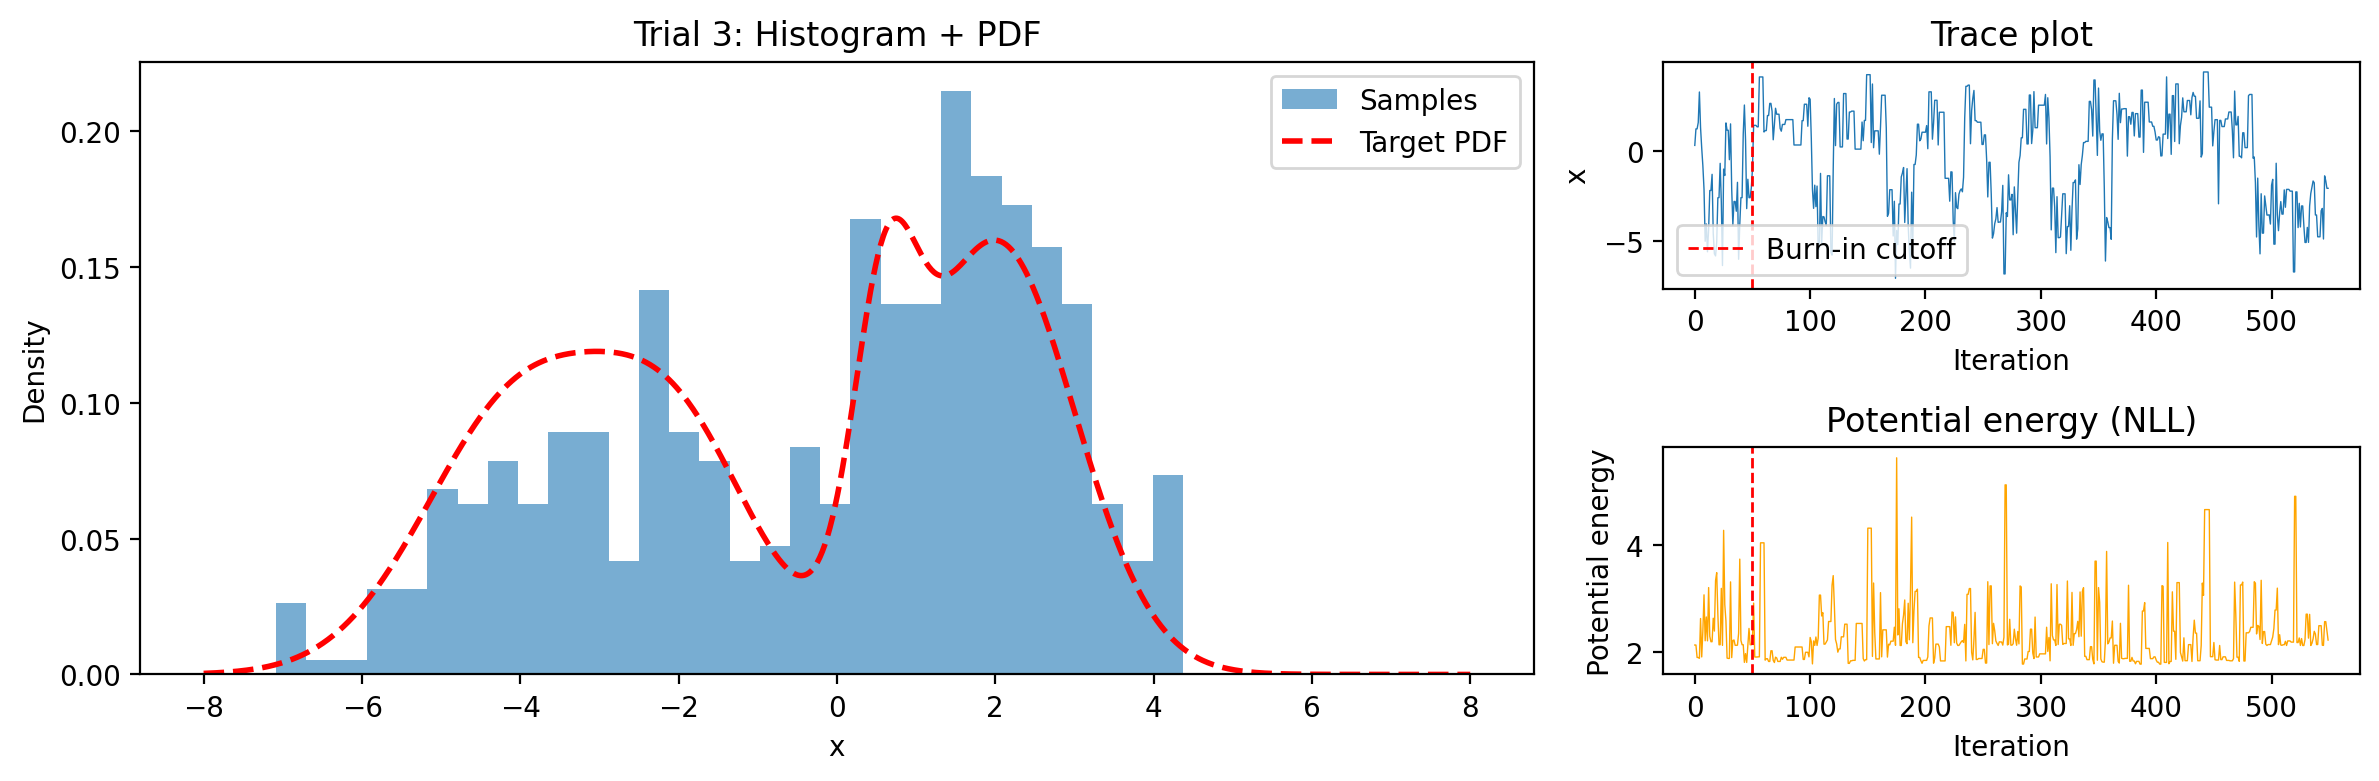

In [50]:
# Plot results
plot_hmc_results(all_samples, hmc_objs, target, x_range=(-8, 8), bins=30)

We can also compare the two sampling methods for equivalent hyperparameters.

In [21]:
import time

# ----------------- RWMH Sampling ----------------- #
start_time = time.time()
MH = MetropolisHastings(target_distribution=target,
                        num_samples=2000, 
                        burn_in=200, 
                        proposal_std=1.0)
rwmh_samples = MH.run(num_trials=1)
rwmh_time = time.time() - start_time
print(f"RWMH took {rwmh_time:.2f} seconds")
print(f"RWMH acceptance rate (post burn-in): {MH.acceptance_rate[0]:.4f}")

# ----------------- HMC Sampling ----------------- #
start_time = time.time()
hmc = HMC(potential_fn=target.neg_log_pdf,
          num_dim=1,
          step_size=0.1,
          leapfrog_steps=20,
          num_samples=2000,
          burn_in=200,
          device=device)
hmc_samples, hmc_acc_rate = hmc.sample()
hmc_time = time.time() - start_time
print(f"HMC took {hmc_time:.2f} seconds")
print(f"HMC acceptance rate (post burn-in): {hmc_acc_rate:.4f}")

Trial 0: overall acceptance rate = 0.8000, post burn-in = 0.7985
RWMH took 0.14 seconds
RWMH acceptance rate (post burn-in): 0.7985
HMC took 8.67 seconds
HMC acceptance rate (post burn-in): 0.9985


In [22]:
def plot_sampler_comparison(rwmh_samples, hmc_samples, target, bins=30, x_range=(-8,8), max_lag=100):
    """
    Compare RWMH and HMC samples:
    - Histograms + target PDF
    - Trace plots
    - Autocorrelation
    """
    # Flatten samples for plotting / autocorr
    rwmh_flat = rwmh_samples[0].cpu().numpy().ravel()
    hmc_flat = hmc_samples.cpu().numpy().ravel()

    # x values for PDF
    x_vals = torch.linspace(*x_range, 1000, device=device)
    pdf_vals = target.pdf(x_vals).cpu().numpy()

    fig, axes = plt.subplots(3, 2, figsize=(12, 10))

    # ---------------- Histograms + PDF ---------------- #
    axes[0,0].hist(rwmh_flat, bins=bins, density=True, alpha=0.6, label='RWMH')
    axes[0,0].plot(x_vals.cpu().numpy(), pdf_vals, 'r--', lw=2, label='Target PDF')
    axes[0,0].set_title("RWMH Histogram + PDF"); axes[0,0].legend()

    axes[0,1].hist(hmc_flat, bins=bins, density=True, alpha=0.6, label='HMC')
    axes[0,1].plot(x_vals.cpu().numpy(), pdf_vals, 'r--', lw=2, label='Target PDF')
    axes[0,1].set_title("HMC Histogram + PDF"); axes[0,1].legend()

    # ---------------- Trace plots ---------------- #
    axes[1,0].plot(rwmh_flat, lw=0.5)
    axes[1,0].axvline(MH.burn_in, color='red', ls='--', lw=1, label='Burn-in')
    axes[1,0].set_title("RWMH Trace"); axes[1,0].legend()

    axes[1,1].plot(hmc_flat, lw=0.5)
    axes[1,1].axvline(hmc.burn_in, color='red', ls='--', lw=1, label='Burn-in')
    axes[1,1].set_title("HMC Trace"); axes[1,1].legend()

    # ---------------- Autocorrelation ---------------- #
    def autocorr(x, max_lag=max_lag):
        x = np.asarray(x)
        x = x - np.mean(x)
        result = np.correlate(x, x, mode='full')
        acf = result[result.size // 2:]
        acf /= acf[0]
        return acf[:max_lag+1]

    acf_rwmh = autocorr(rwmh_flat, max_lag)
    acf_hmc = autocorr(hmc_flat, max_lag)

    axes[2,0].stem(range(len(acf_rwmh)), acf_rwmh, basefmt=" ")
    axes[2,0].set_title("RWMH Autocorrelation")
    axes[2,1].stem(range(len(acf_hmc)), acf_hmc, basefmt=" ")
    axes[2,1].set_title("HMC Autocorrelation")

    plt.tight_layout()
    plt.show()

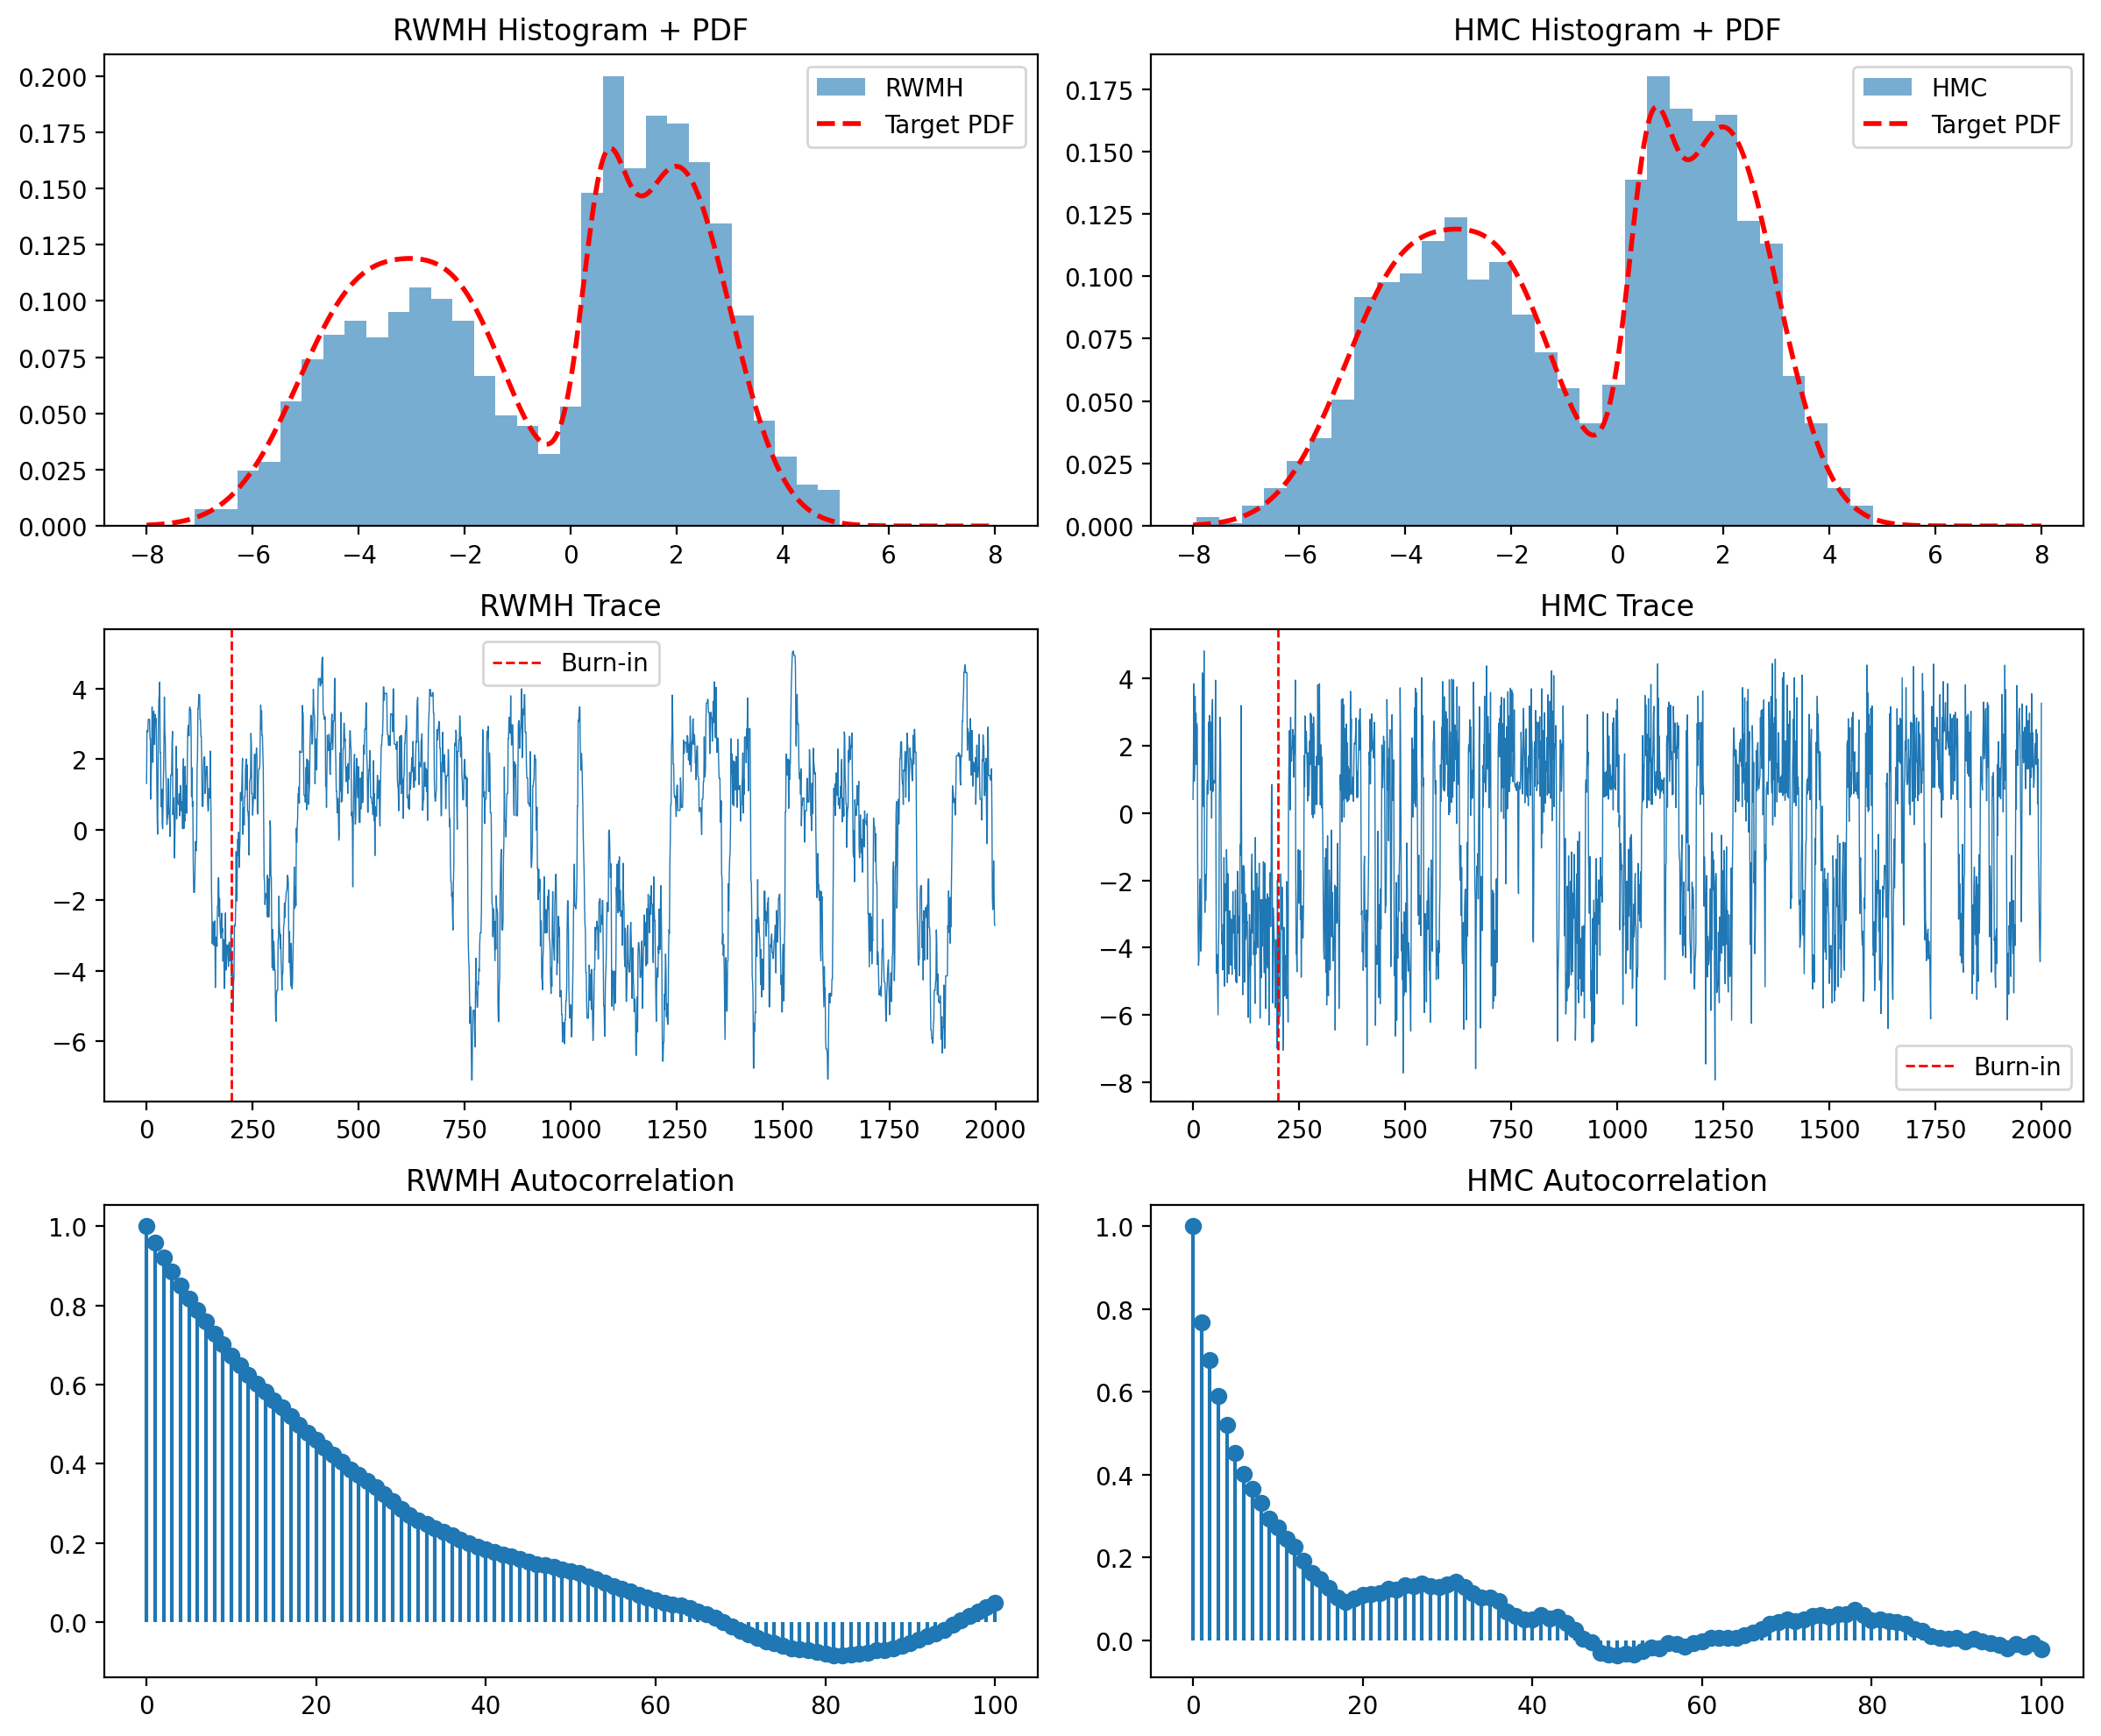

In [23]:
plot_sampler_comparison(rwmh_samples, hmc_samples, target, bins=30, x_range=(-8,8), max_lag=100)

1. RWMH is fast but less efficient per sample

    - It only requires evaluating the target density once per proposal.

    - Acceptance rate is moderate (~0.8).

    - Autocorrelation between samples is higher, so you need more samples to get independent draws.

2. HMC is slower but produces more independent samples

    - Each iteration requires multiple gradient evaluations (one per leapfrog step), which explains the 19 seconds vs 0.46 seconds.

    - Acceptance rate is extremely high (~0.998), so almost every proposal is accepted.

    - Autocorrelation between samples is much lower, meaning fewer iterations are needed for independent samples.

3. Dimensionality matters

    - In 1D, the overhead of computing gradients dominates. HMC is overkill here.

    - In higher-dimensional problems (like Bayesian neural networks), RWMH becomes very inefficient, and HMC scales much better.

**Rules of thumb:**

- For low-dimensional targets, simple methods like RWMH are often faster in wall-clock time.

- For moderate to high dimensions or strongly correlated targets, HMC is much more efficient per independent sample.

## What happens when HMC is used to train Bayesian Neural Networks?

In [24]:
from torch import nn

# -------------------------------
# 1. Toy 1D regression problem
# -------------------------------
torch.manual_seed(0)

def cubic_sin(x: torch.Tensor, noise_std: float = 0.1) -> torch.Tensor:
    y = torch.sin(6*x)**3 + torch.randn_like(x) * noise_std
    return y.reshape((-1, 1))

# Training data: two disjoint intervals
sample_x1 = torch.linspace(-0.8, -0.2, 16).reshape((-1,1))
sample_x2 = torch.linspace(0.2, 0.8, 16).reshape((-1,1))
sample_x = torch.cat([sample_x1, sample_x2], dim=0)

# Scale inputs
x_mean, x_std = sample_x.mean(), sample_x.std()
sample_x_scaled = (sample_x - x_mean) / x_std

# Noisy outputs
sample_y = cubic_sin(sample_x, noise_std=0.1)
y_mean, y_std = sample_y.mean(), sample_y.std()
sample_y_scaled = (sample_y - y_mean) / y_std

# -------------------------------
# 2. Simple 2 hidden layer BNN
# -------------------------------
# ======================================================
# Bayesian Neural Network (just the architecture)
# ======================================================
class BNN(nn.Module):
    """A two-layer MLP with tanh activations"""
    def __init__(self, input_dim=1, hidden_dim1=64, hidden_dim2=64, output_dim=1):
        super(BNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim1)
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc3 = nn.Linear(hidden_dim2, output_dim)

    def forward(self, x):
        """Forward pass"""
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return self.fc3(x)

# -------------------------------
# 3. Posterior calculation
# -------------------------------
# ======================================================
# BNN Posterior with scaled inputs/outputs
# ======================================================
class BNNPosterior:
    def __init__(self, model, X, y, noise_std=0.1, prior_mu=0.0, prior_std=1.0, device='cpu'):
        """
        Class that outputs negative log-posterior. Uses Gaussian likelihood and prior.
        The class can also return the PPD, negative log-prior and the negative log-likelihood.
        model       : instance of BNN
        X_scaled    : scaled inputs
        y_scaled    : scaled outputs
        y_mean      : mean of original targets
        y_std       : std of original targets
        prior_mu    : Gaussian prior mean
        prior_std   : Gaussian prior std
        noise_std   : likelihood noise std in scaled space
        """
        self.model = model.to(device)
        self.X = X.to(device)
        self.y = y.to(device)
        self.noise_std = noise_std
        self.prior_mu = prior_mu
        self.prior_std = prior_std
        self.device = device

    def neg_log_prior(self, params):
        """Negative log-prior ignoring normalization constant"""
        return 0.5 * torch.sum((self.prior_mu-params)**2) / self.prior_std**2

    def neg_log_likelihood(self, params):
        """Negative log-likelihood ignoring normalization constant"""
        assign_params(self.model, params)
        y_pred = self.model(self.X)
        return 0.5 * torch.sum((self.y - y_pred)**2) / self.noise_std**2

    def __call__(self, params):
        """Negative log-posterior = NLL + NLogPrior"""
        return self.neg_log_prior(params) + self.neg_log_likelihood(params)

def posterior_predictive(param_samples, model, X_scaled, y_mean, y_std):
    """
    Compute posterior predictive mean and std given flat parameter samples (HMC/RWMH style).

    Parameters
    ----------
    param_samples : torch.Tensor
        Tensor of shape [num_samples, num_params].
    model : nn.Module
        BNN model to assign parameters to.
    X_scaled : torch.Tensor
        Input features.
    y_mean, y_std : scalars or tensors
        Scaling for target variable.

    Returns
    -------
    pred_mean, pred_std : np.ndarray
        Predictive mean and std over samples.
    """
    responses = []

    for theta in param_samples:
        assign_params(model, theta)  # sets model parameters from flat vector
        model.eval()
        with torch.no_grad():
            y_pred_scaled = model(X_scaled)
            y_pred = y_pred_scaled * y_std + y_mean
            responses.append(y_pred.cpu().numpy())

    responses = np.array(responses)
    pred_mean = responses.mean(axis=0)
    pred_std = responses.std(axis=0)

    return pred_mean, pred_std


# ======================================================
# Flatten / unflatten parameters of model (just to make them vectors)
# ======================================================
def flatten_params(model):
    """Flatten all model parameters into a single vector"""
    return torch.cat([p.flatten() for p in model.parameters()])

def assign_params(model, flat_params):
    """Load flat parameters back into the model"""
    idx = 0
    for p in model.parameters():
        numel = p.numel()
        p.data = flat_params[idx:idx+numel].view(p.shape).to(p.device)
        idx += numel

# -------------------------------
# 4. Setup model and posterior
# -------------------------------
# --- Setup BNN model ---
input_dim, hidden_dim1, hidden_dim2, output_dim = 1, 64, 64, 1
model = BNN(input_dim, hidden_dim1, hidden_dim2, output_dim)

# --- Posterior object ---
neg_log_post = BNNPosterior(
    model,
    sample_x_scaled,              # scaled training inputs
    sample_y_scaled,              # training targets
    noise_std=0.1 / y_std.item(), # observation noise
    prior_mu=0.0,                 # mean of Gaussian prior
    prior_std=1.0,                # std of Gaussian prior
    device=device                 # whether you run in CPU or GPU
)

# --- Parameter bookkeeping ---
param_dim = sum(p.numel() for p in model.parameters())
init_params = flatten_params(model).detach()
print(f"Number of parameters: {param_dim}")

# In case you want to print current values of -log-posterior, -log-likelihood and -log-prior
#print("Neg log-posterior:", neg_log_post(init_params).item())
#print("Neg log-prior:", neg_log_post.neg_log_prior(init_params).item())
#print("Neg log-likelihood:", neg_log_post.neg_log_likelihood(init_params).item())

# -------------------------------
# 5a. RWMH Sampling
# -------------------------------
start_time = time.time()
MH = MetropolisHastings(
    target_distribution=target,
    num_samples=10000, 
    burn_in=200, 
    proposal_std=0.004    # a.k.a. step_size
)
# Adapting MetropolisHastings for BNN: just needs to supply initial flattened params
rwmh_samples = []
x = init_params.clone()
accept_count = 0
for i in range(MH.num_samples + MH.burn_in):
    x_prop = x + torch.randn_like(x) * MH.proposal_std
    p_curr = neg_log_post(x)
    p_prop = neg_log_post(x_prop)
    alpha = torch.clamp(torch.exp(p_curr - p_prop), max=1.0)
    if torch.rand(1) < alpha:
        x = x_prop
        if i >= MH.burn_in:
            accept_count += 1
    if i >= MH.burn_in:
        rwmh_samples.append(x.cpu())
rwmh_samples = torch.stack(rwmh_samples)
rwmh_time = time.time() - start_time
print(f"RWMH done in {rwmh_time:.2f}s, acceptance={accept_count/MH.num_samples:.4f}")

# -------------------------------
# 5b. HMC Sampling
# -------------------------------
start_time = time.time()
hmc = HMC(
    potential_fn=neg_log_post,
    num_dim=param_dim,
    step_size=0.004,
    leapfrog_steps=1,
    num_samples=5000,
    burn_in=20,
    device=device
)
hmc_samples, hmc_acc = hmc.sample(init_position=init_params)
hmc_time = time.time() - start_time
print(f"HMC done in {hmc_time:.2f}s, acceptance={hmc_acc:.4f}")

# -------------------------------
# 6. Calculate Posterior Predictive
# -------------------------------
X_test = torch.linspace(-1,1,100).reshape((-1,1))
X_test_scaled = (X_test - x_mean) / x_std
y_test = cubic_sin(X_test, noise_std=0)

hmc_mean, hmc_std = posterior_predictive(hmc_samples, model, X_test_scaled, y_mean, y_std)
rwmh_mean, rwmh_std = posterior_predictive(rwmh_samples, model, X_test_scaled, y_mean, y_std)

# -------------------------------
# 7. Plot predictions of BNN for both RWMH and HMC
# -------------------------------
def plot_bnn_predictions(X_test, y_true, mean_hmc, std_hmc, mean_rwmh, std_rwmh, sample_x, sample_y):
    fig, ax = plt.subplots(figsize=(6,4))
    
    # True function
    ax.plot(X_test, y_true, '--', color='gray', label='True Function')
    
    # HMC
    ax.plot(X_test, mean_hmc, color='blue', label='HMC mean')
    ax.fill_between(X_test.flatten(), mean_hmc.flatten()-2*std_hmc.flatten(), mean_hmc.flatten()+2*std_hmc.flatten(),
                    color='blue', alpha=0.2)
    
    # RWMH
    ax.plot(X_test, mean_rwmh, color='green', label='RWMH mean')
    ax.fill_between(X_test.flatten(), mean_rwmh.flatten()-2*std_rwmh.flatten(), mean_rwmh.flatten()+2*std_rwmh.flatten(),
                    color='green', alpha=0.2)
    
    # Training points
    ax.scatter(sample_x, sample_y, color='red', label='Training Data')
    
    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.legend()
    plt.show()

Number of parameters: 4353
RWMH done in 4.66s, acceptance=0.5557
HMC done in 6.11s, acceptance=0.6100


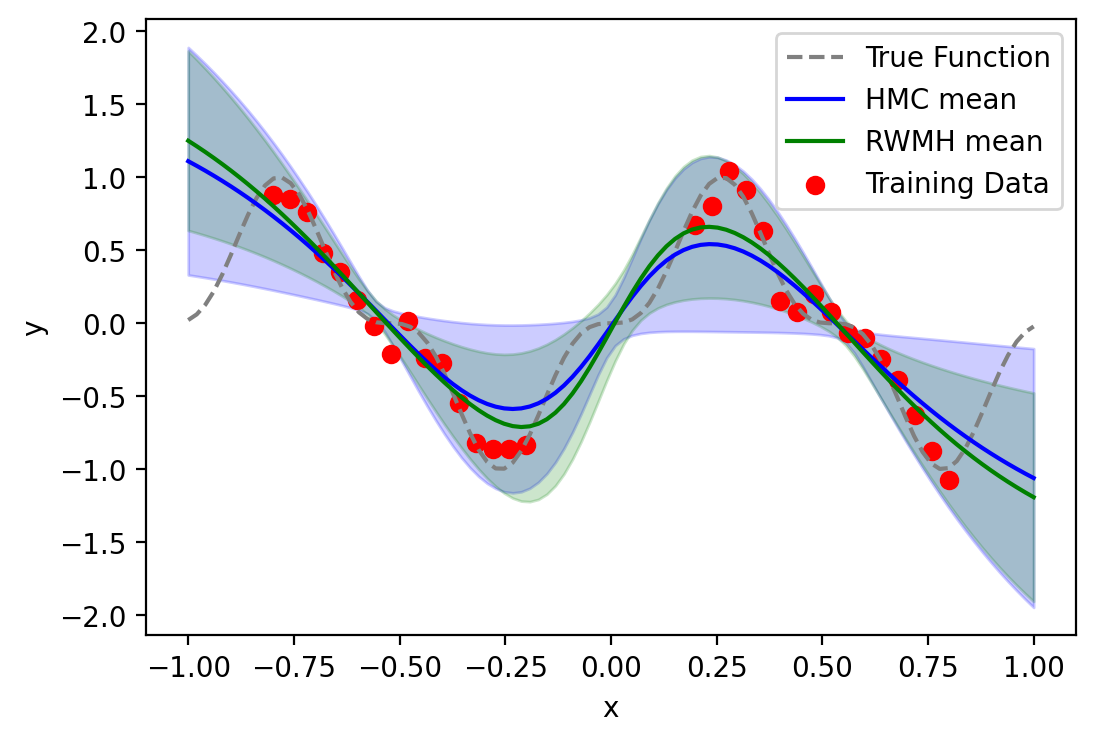

In [51]:
#^^^^ code hidden (too long) ^^^^
plot_bnn_predictions(X_test, y_test, hmc_mean, hmc_std, rwmh_mean, rwmh_std, sample_x, sample_y)

### Scalable, robust sampler: (preconditioned) Stochastic Gradient Langevin Dynamics

* This is the sampler that we have been using in my group to solve mechanics problems.
* It works very well and its robust (not hypersensitive to hyperparameters, and they are easy to handle).

Max Welling and co-workers proposed an interesting method to train BNNs that can be viewed as a simple modification of Stochastic Gradient Descent.

* How can SGD be modified to become a sampler for neural networks, instead of an optimizer? 

## How to improve the efficency of HMC?

**Recall the leap frog update step of HMC**
$$\mathrm{v}_{t+\frac{1}{2}} =\mathrm{v}_{t}-\frac{\eta }{2}\frac{\partial \mathcal{\varepsilon}(\mathrm{\theta}_t)}{\partial \mathrm{\theta}} $$

$$\mathrm{\theta}_{t+1} =  \mathrm{\theta}_{t}+\eta \frac{\partial \mathcal{K}(\mathrm{v}_{t+\frac{1}{2}})}{\partial \mathrm{v}}$$

$$\mathrm{v}_{t+1} =\mathrm{v}_{t+\frac{1}{2}}-\frac{\eta }{2}\frac{\partial \mathcal{\varepsilon}(\mathrm{\theta}_{t+1})}{\partial \mathrm{\theta}} $$

- Only first order information is used!!!
- Accept/Reject makes HMC difficult not very scalable
- *leapfrog* requires more computational cost!


### From Hamiltonian Dynamics to Langevin dynamics
The update rule of Langevin dynamics modified when considering *leapfrog =1* is given by:

\begin{align}
\label{eq:langevin_update_step}
    \boldsymbol{\theta}_{t+1} 
    &= \boldsymbol{\theta}_{t} 
    - \frac{\eta^2}{2} \boldsymbol{\Sigma}^{-1} \nabla \mathcal{E}(\boldsymbol{\theta}_{t}) 
    + \eta\, \boldsymbol{\Sigma}^{-1} \boldsymbol{v}_{t} \\
    &= \boldsymbol{\theta}_{t} 
    - \frac{\eta^2}{2} \boldsymbol{\Sigma}^{-1} \nabla \mathcal{E}(\boldsymbol{\theta}_{t}) 
    + \eta\, \sqrt{\boldsymbol{\Sigma}^{-1}}\, \boldsymbol{\epsilon}_{t}
\end{align}

where $\boldsymbol{v}_{t} \sim \mathcal{N}(\boldsymbol{0}, \boldsymbol{\Sigma})$ and $\boldsymbol{\epsilon}_{t} \sim \mathcal{N}(\boldsymbol{0}, \boldsymbol{I})$. 

- When $\boldsymbol{\Sigma} = \boldsymbol{I}$ and $\eta = \sqrt{2}$, the update process reduces to a discretized Langevin diffusion, given by:

\begin{equation}
    \mathrm{d}\boldsymbol{\theta}_{t} = - \nabla \mathcal{E}(\boldsymbol{\theta}_{t})\, \mathrm{d}{t} + \sqrt{2}\, \mathrm{d}\boldsymbol{B}_{t}
\end{equation}

where $\boldsymbol{B}_{t}$ denotes a $d$-dimensional Brownian motion.

### Connection between Langevin dynamics and Stochastic Gradient Decent

**Stochastic Gradient Descent (SGD)**
Recall that for a loss function such as MSE, the **full-batch gradient** is:

$$
\nabla_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta}) = \frac{1}{N} \sum_{n=1}^{N} \nabla \mathcal{L}_n(\boldsymbol{\theta})
$$



**Mini-Batch Gradient**

In practice, we often use the **mini-batch** technique:

$$
\nabla^B_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta}) = \frac{1}{B} \sum_{n=1}^{B} \nabla_{\boldsymbol{\theta}} \mathcal{L}_n(\boldsymbol{\theta})
$$

where:
- $B$ = mini-batch size
- Provides an **unbiased estimate** of the full gradient

**Unbiased:** The mini-batch is randomly sampled from the full dataset:

$$
\mathbb{E}_{\mathcal{B}} \left[ \nabla_{\boldsymbol{\theta}}^{B} \mathcal{L}(\boldsymbol{\theta}) - \nabla_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta}) \right] = 0
$$




**Diffusion Term (Variance)**: The variance (covariance matrix) of the gradient difference is:

$$
\mathrm{Cov}_{\mathcal{B}} \left[ \nabla_{\boldsymbol{\theta}}^{B} \mathcal{L}(\boldsymbol{\theta}) - \nabla_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta})\right] =
\mathbb{E}_{\mathcal{B}} \left[ \left( \nabla_{\boldsymbol{\theta}}^B \mathcal{L}(\boldsymbol{\theta}) - \nabla_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta}) \right) \left( \nabla_{\boldsymbol{\theta}}^B \mathcal{L}(\boldsymbol{\theta}) - \nabla_{\boldsymbol{\theta}} \mathcal{L}(\boldsymbol{\theta}) \right)^\top \right]
$$



For time step $t$, we define

$$
\boldsymbol{v}_t = \sqrt{\lambda} \left( \nabla\mathcal{L}(\boldsymbol{\theta}_t) - \nabla_B\mathcal{L}(\boldsymbol{\theta}_t) \right)
$$

The **SGD update** becomes

$$
\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_t - \lambda \nabla^B \mathcal{L}(\boldsymbol{\theta}_t) 
= \boldsymbol{\theta}_t - \lambda \nabla \mathcal{L}(\boldsymbol{\theta}_t) + \sqrt{\lambda} \boldsymbol{v}_t
$$
where $\lambda$ is the learning rate

**SGD update step**
$$\boldsymbol{\theta}_{t+1} =  \boldsymbol{\theta}_t - \lambda \nabla \mathcal{L}(\boldsymbol{\theta}_t) + \sqrt{\lambda} \boldsymbol{v}_t$$

where $\lambda$ is the learning rate, and $\boldsymbol{v}$ is a diffusion term between mini-batch and full batch.

**Langevin update**

$$
\boldsymbol{\theta}_{t+1} = \boldsymbol{\theta}_t - \frac{\eta^2}{2} \nabla \mathcal{E}(\boldsymbol{\theta}_t) + \eta \, \epsilon_t
$$

where $\eta$ is the step size, and $\epsilon_t$ is the diffusion term following a distribution, usually Gaussian.



**Note: Langevin update can be regarded as injecting noise to SGD, such that SGD can be a sampler**

### Stochastic Gradient Langevin Dynamics (SGLD)

Welling et al. (2011) proposed **SGLD**, a special case of Langevin Monte Carlo (LMC) for posterior inference in BNNs.

- Remind the BNN Posterior:$
p(\boldsymbol{\theta} \mid \mathcal{D}) \propto p(\boldsymbol{\theta}) \prod_{n=1}^{N} p(y_n \mid \boldsymbol{\theta})$
- and: $\mathcal{E}(\boldsymbol{\theta}) = - \mathrm{log} p(\boldsymbol{\theta} \mid \mathcal{D})$


- SGLD update rule

$$
\Delta \boldsymbol{\theta}_t = \frac{\epsilon_t}{2} \nabla\left( \log p(\boldsymbol{\theta}_t ) + \frac{N}{B} \log p(y_i \mid \boldsymbol{\theta}_t)\right) + \eta_t \mathbf{I}
$$

where:

$$
\eta_t \sim \mathcal{N}(\boldsymbol{0}, \epsilon_t)
$$

**It anables to sample posteriors of BNN effiently and at scale**

## Summary of SGLD

- Randomly initialize parameters $\boldsymbol{\theta}_0$
- At each iteration $t$:
  1. Sample a **mini-batch** $\mathcal{B}_t$ from the dataset
  2. Compute stochastic gradient of log-posterior and update with noise:
     $$
     \boldsymbol{\theta}_{t+1} =
     \boldsymbol{\theta}_t +
     \frac{\epsilon_t}{2} \left[
     \nabla \log p(\boldsymbol{\theta}_t) +
     \frac{N}{n} \sum_{i \in \mathcal{B}_t}
     \nabla_{\boldsymbol{\theta}} \log p(y_i \mid \boldsymbol{\theta}_t)
     \right]
     +
     \boldsymbol{\eta}_t
     $$
     where $\boldsymbol{\eta}_t \sim \mathcal{N}(\boldsymbol{0}, \epsilon_t \mathbf{I})$
- After **burn-in**, collect samples $\{\boldsymbol{\theta}_t\}$ as posterior samples. Note that, it works fine with collecting every sample after **burn-in**, but set sample frequency that mimics *leapfrog* of HMC could stablize the sampling. 
- Step size $\epsilon_t$ can be constant (for sampling) or decreasing (for convergence)


### Can we further improve SGLD? 

SGLD works well for large-scale problems like training BNNs. However, it **assumes all parameters** $\boldsymbol{\theta}$ have the same step size.
- Slow convergence
- Even divergence when components of $\boldsymbol{\theta}$ have different curvatures



###  Preconditioned SGLD (pSGLD)

Li et al. (2015) proposed **pSGLD** to address this issue with the following refinements.
- Use a **preconditioning matrix** $G(\boldsymbol{\theta}_t)$ (from RMSprop)  



### pSGLD update rule

$$
\Delta \boldsymbol{\theta}_t =
\frac{\epsilon_t}{2} \left[
G(\boldsymbol{\theta}_t)
\left(\nabla \log p(\boldsymbol{\theta}_t) + \frac{N}{n} \log p(y_i \mid \boldsymbol{\theta}_t) \right)
+ \boldsymbol{\Gamma}(\boldsymbol{\theta}_t)
\right]
+ \eta_t G(\boldsymbol{\theta}_t)
$$

where:

$$
\Gamma_i(\boldsymbol{\theta}) = \sum_j \frac{\partial G_{i,j}(\boldsymbol{\theta})}{\partial \theta_j}
$$

- Preconditioner Definition

$$
G(\boldsymbol{\theta}_{t+1}) =
\mathrm{diag} \left(
\boldsymbol{1} \oslash
\left( \lambda \boldsymbol{1} + \sqrt{V(\boldsymbol{\theta}_{t+1})} \right)
\right)
$$

$$
V(\boldsymbol{\theta}_{t+1}) =
\alpha V(\boldsymbol{\theta}_t) +
(1 - \alpha)\,
\bar{g}(\boldsymbol{\theta}_t; \mathcal{B}_t)
\odot
\bar{g}(\boldsymbol{\theta}_t; \mathcal{B}_t)
$$

$$
\bar{g}(\boldsymbol{\theta}_t; \mathcal{B}_t) =
\frac{1}{n} \sum_{i=1}^{n}
\nabla_{\boldsymbol{\theta}} \log p(y_i \mid \boldsymbol{\theta}_t)
$$



In [26]:
import copy
import torch

class SGLDSampler:
    """
    SGLD / pSGLD sampler that updates the model in-place and stores model snapshots.

    Parameters
    ----------
    model : nn.Module
        The Bayesian neural network.
    neg_log_post : object
        Must implement __call__(theta), neg_log_likelihood(theta), neg_log_prior(theta).
    lr : float
        Learning rate.
    precondition : bool
        If True, use preconditioned SGLD (pSGLD).
    alpha : float
        EMA coefficient for squared gradients (pSGLD only).
    eps : float
        Numerical stability (pSGLD only).
    """
    def __init__(self, model, neg_log_post, lr=1e-3, precondition=False, alpha=0.99, eps=1e-5):
        self.model = model
        self.neg_log_post = neg_log_post
        self.lr = lr
        self.precondition = precondition
        self.alpha = alpha
        self.eps = eps
        self.state = {}  # per-parameter preconditioning

    def step(self):
        """Perform one SGLD/pSGLD step on the model parameters."""
        self.model.zero_grad()
        # compute negative log-posterior
        theta = flatten_params(self.model)
        loss = self.neg_log_post(theta)
        loss.backward()

        # update parameters in-place
        for p in self.model.parameters():
            if p.grad is None:
                continue
            grad = p.grad.data

            if self.precondition:
                # initialize state
                if p not in self.state:
                    self.state[p] = torch.zeros_like(p.data)
                V = self.state[p]
                V.mul_(self.alpha).addcmul_(grad, grad, value=1 - self.alpha)
                G = (V + self.eps).sqrt()
                noise = torch.randn_like(p.data) * torch.sqrt(self.lr / G)
                p.data.addcdiv_(grad, G, value=-self.lr/2)
                p.data.add_(noise)
            else:
                noise = torch.randn_like(p.data) * self.lr**0.5
                p.data.add_(-0.5 * self.lr * grad + noise)

        return loss.item()

    def sample(self, num_samples=1000, burn_in=100, sample_freq=10, log_interval=100):
        """Run the sampler and collect parameter vectors."""
        samples = []
        log_likelihoods = []

        for i in range(burn_in + num_samples * sample_freq):
            loss_val = self.step()

            if i % log_interval == 0:
                nll = self.neg_log_post.neg_log_likelihood(flatten_params(self.model)).item()
                prior = self.neg_log_post.neg_log_prior(flatten_params(self.model)).item()
                print(f"[Step {i:5d}] NegLogPosterior: {loss_val:.2f} | "
                      f"NLL: {nll:.2f} | NegLogPrior: {prior:.2f}")

            if i >= burn_in and (i - burn_in) % sample_freq == 0:
                # store flattened parameter vector
                samples.append(flatten_params(self.model).detach().clone())
                log_likelihoods.append(-self.neg_log_post.neg_log_likelihood(flatten_params(self.model)).item())

        return torch.stack(samples), log_likelihoods

In [56]:
#^^^^ code hidden from presentation ^^^^
sgld = SGLDSampler(model, neg_log_post, lr=1e-2, precondition=True, alpha=0.99, eps=1e-5)
samples, log_liks = sgld.sample(num_samples=1000, burn_in=500, sample_freq=20)

mean_pred, std_pred = posterior_predictive(samples, model, X_test_scaled, y_mean, y_std)

[Step     0] NegLogPosterior: 2406.60 | NLL: 3088.21 | NegLogPrior: 2783.99
[Step   100] NegLogPosterior: 2845.31 | NLL: 51.67 | NegLogPrior: 2801.80
[Step   200] NegLogPosterior: 2760.54 | NLL: 16.39 | NegLogPrior: 2749.95
[Step   300] NegLogPosterior: 2640.65 | NLL: 21.64 | NegLogPrior: 2625.53
[Step   400] NegLogPosterior: 2990.21 | NLL: 161.21 | NegLogPrior: 2582.66
[Step   500] NegLogPosterior: 2581.04 | NLL: 37.70 | NegLogPrior: 2541.45
[Step   600] NegLogPosterior: 2490.59 | NLL: 30.19 | NegLogPrior: 2475.44
[Step   700] NegLogPosterior: 2521.01 | NLL: 21.33 | NegLogPrior: 2495.83
[Step   800] NegLogPosterior: 2571.71 | NLL: 19.35 | NegLogPrior: 2531.41
[Step   900] NegLogPosterior: 2553.87 | NLL: 21.37 | NegLogPrior: 2539.84
[Step  1000] NegLogPosterior: 2631.04 | NLL: 53.32 | NegLogPrior: 2540.48
[Step  1100] NegLogPosterior: 2530.38 | NLL: 35.05 | NegLogPrior: 2494.91
[Step  1200] NegLogPosterior: 2668.18 | NLL: 104.35 | NegLogPrior: 2500.02
[Step  1300] NegLogPosterior: 2494

[Step 11100] NegLogPosterior: 2667.87 | NLL: 213.57 | NegLogPrior: 2505.11
[Step 11200] NegLogPosterior: 2512.44 | NLL: 49.85 | NegLogPrior: 2457.39
[Step 11300] NegLogPosterior: 2498.43 | NLL: 54.28 | NegLogPrior: 2459.52
[Step 11400] NegLogPosterior: 2470.87 | NLL: 30.28 | NegLogPrior: 2404.38
[Step 11500] NegLogPosterior: 2484.27 | NLL: 94.41 | NegLogPrior: 2423.18
[Step 11600] NegLogPosterior: 2495.87 | NLL: 50.52 | NegLogPrior: 2447.85
[Step 11700] NegLogPosterior: 2531.28 | NLL: 39.97 | NegLogPrior: 2414.03
[Step 11800] NegLogPosterior: 2510.03 | NLL: 71.33 | NegLogPrior: 2377.92
[Step 11900] NegLogPosterior: 2470.35 | NLL: 150.62 | NegLogPrior: 2323.95
[Step 12000] NegLogPosterior: 2353.34 | NLL: 37.41 | NegLogPrior: 2310.69
[Step 12100] NegLogPosterior: 2420.74 | NLL: 62.21 | NegLogPrior: 2367.40
[Step 12200] NegLogPosterior: 2386.43 | NLL: 11.62 | NegLogPrior: 2373.69
[Step 12300] NegLogPosterior: 2421.26 | NLL: 38.52 | NegLogPrior: 2372.11
[Step 12400] NegLogPosterior: 2433.1

In [28]:
def plot_bnn_prediction(X_test, y_true, mean_pred, std_pred, X_train, y_train):
    """
    Plot BNN posterior predictive mean, uncertainty, and training data.

    Parameters
    ----------
    X_test : torch.Tensor or np.ndarray
        Test inputs (original scale).
    y_true : torch.Tensor or np.ndarray
        True function values (original scale).
    mean_pred : np.ndarray
        Predictive mean from posterior predictive [num_points, output_dim].
    std_pred : np.ndarray
        Predictive std (epistemic uncertainty) [num_points, output_dim].
    X_train : torch.Tensor or np.ndarray
        Training inputs (original scale).
    y_train : torch.Tensor or np.ndarray
        Training outputs (original scale).
    """
    X_test_np = X_test.detach().cpu().numpy() if torch.is_tensor(X_test) else X_test
    y_true_np = y_true.detach().cpu().numpy() if torch.is_tensor(y_true) else y_true
    X_train_np = X_train.detach().cpu().numpy() if torch.is_tensor(X_train) else X_train
    y_train_np = y_train.detach().cpu().numpy() if torch.is_tensor(y_train) else y_train

    mean_pred = mean_pred.squeeze()
    std_pred = std_pred.squeeze()

    fig, ax = plt.subplots(figsize=(7, 5))
    
    # True function
    ax.plot(X_test_np, y_true_np, '--', color='gray', label='True Function')
    
    # BNN predictive mean
    ax.plot(X_test_np, mean_pred, color='blue', label='BNN Posterior Mean')
    
    # Epistemic uncertainty
    ax.fill_between(
        X_test_np.flatten(),
        mean_pred - 1.96 * std_pred,
        mean_pred + 1.96 * std_pred,
        color='blue', alpha=0.2,
        label='95% Credible Interval'
    )
    
    # Training data
    ax.scatter(X_train_np, y_train_np, color='red', marker='o', label='Training Data')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.set_title('BNN Posterior Predictive')
    plt.show()

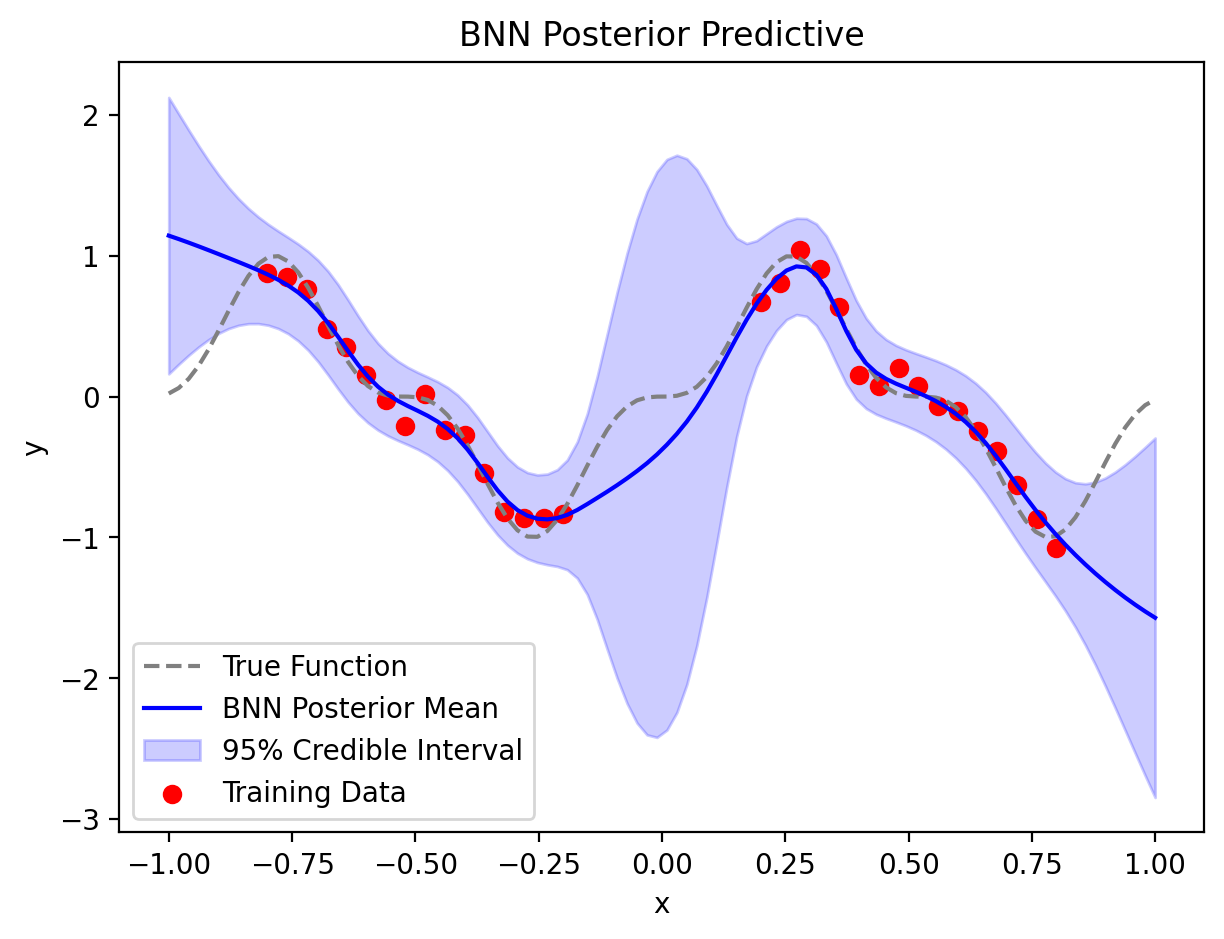

In [57]:
#^^^^ code hidden from presentation ^^^^
plot_bnn_prediction(X_test=X_test, y_true=y_test, mean_pred=mean_pred,
                    std_pred=std_pred, X_train=sample_x, y_train=sample_y)

We can also check SGLD directly sampling the toy problem distribution (like we did for RWMH and HMC).

In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt

device = 'cpu'

# ------------------ pSGLD Sampler ------------------ #
class pSGLDSampler:
    """pSGLD sampler for 1D target distribution."""
    def __init__(self, target_distribution, num_samples=500, burn_in=200, lr=1.0, alpha=0.99, eps=1e-5):
        self.target = target_distribution
        self.num_samples = num_samples
        self.burn_in = burn_in
        self.lr = lr
        self.alpha = alpha
        self.eps = eps

    def run(self, num_trials=1, x0=None):
        self.trial_samples = []
        self.full_chains = []

        for trial in range(num_trials):
            g = torch.Generator(device=device).manual_seed(123 + trial)
            x = torch.randn((), generator=g, device=device) if x0 is None else torch.as_tensor(x0, device=device).reshape(())
            V = torch.tensor(0., device=device)  # EMA of squared gradients
            samples, full_chain = [], []

            for i in range(self.num_samples + self.burn_in):
                # compute gradient of negative log PDF
                x_var = x.clone().requires_grad_(True)
                loss = self.target.neg_log_pdf(x_var)
                loss.backward()
                grad = x_var.grad

                # update EMA
                V.mul_(self.alpha).addcmul_(grad, grad, value=1 - self.alpha)
                G = (V + self.eps).sqrt()
                noise = torch.randn((), generator=g, device=device) * torch.sqrt(self.lr / G)
                x = x - 0.5 * self.lr * grad / G + noise

                full_chain.append(x.item())
                if i >= self.burn_in:
                    samples.append(x.item())

            self.trial_samples.append(torch.tensor(samples, device=device))
            self.full_chains.append(torch.tensor(full_chain, device=device))

        return self.trial_samples

    # ------------------ Autocorrelation ------------------ #
    @staticmethod
    def autocorrelation(x, max_lag=100):
        x = np.asarray(x)
        x = x - np.mean(x)
        result = np.correlate(x, x, mode='full')
        acf = result[result.size//2:]
        acf = acf / acf[0]
        return acf[:max_lag+1]

    # ------------------ Plotting ------------------ #
    def plot_trials(self, bins=30, x_range=(-10,10), num_points=1000, max_lag=100):
        x_plot = torch.linspace(*x_range, num_points, device=device)
        pdf = self.target.pdf(x_plot).cpu().numpy()

        for i, (samples, chain) in enumerate(zip(self.trial_samples, self.full_chains)):
            fig = plt.figure(figsize=(12,4))
            gs = fig.add_gridspec(1, 2, width_ratios=[2,1])

            # Left: histogram + PDF
            ax0 = fig.add_subplot(gs[0,0])
            ax0.hist(samples.cpu().numpy(), bins=bins, density=True, alpha=0.6, label='Samples')
            ax0.plot(x_plot.cpu().numpy(), pdf, 'r--', lw=2, label='Target PDF')
            ax0.set_xlabel('x'); ax0.set_ylabel('Density'); ax0.set_title(f'Trial {i+1}: Histogram + PDF')
            ax0.legend()

            # Right: trace + autocorrelation
            gs_right = gs[0,1].subgridspec(2,1,hspace=0.7)

            # Trace plot
            ax1 = fig.add_subplot(gs_right[0,0])
            ax1.plot(chain.cpu().numpy(), lw=0.5)
            ax1.axvline(self.burn_in, color='red', ls='--', lw=1, label="Burn-in cutoff")
            ax1.set_xlabel('Iteration'); ax1.set_ylabel('x'); ax1.set_title('Trace plot'); ax1.legend()

            # Autocorrelation plot
            ax2 = fig.add_subplot(gs_right[1,0])
            acf = self.autocorrelation(samples.cpu().numpy(), max_lag=max_lag)
            ax2.stem(range(len(acf)), acf)
            ax2.set_xlabel('Lag'); ax2.set_ylabel('Autocorrelation'); ax2.set_title('Sample Autocorrelation')

            plt.tight_layout(); plt.show()


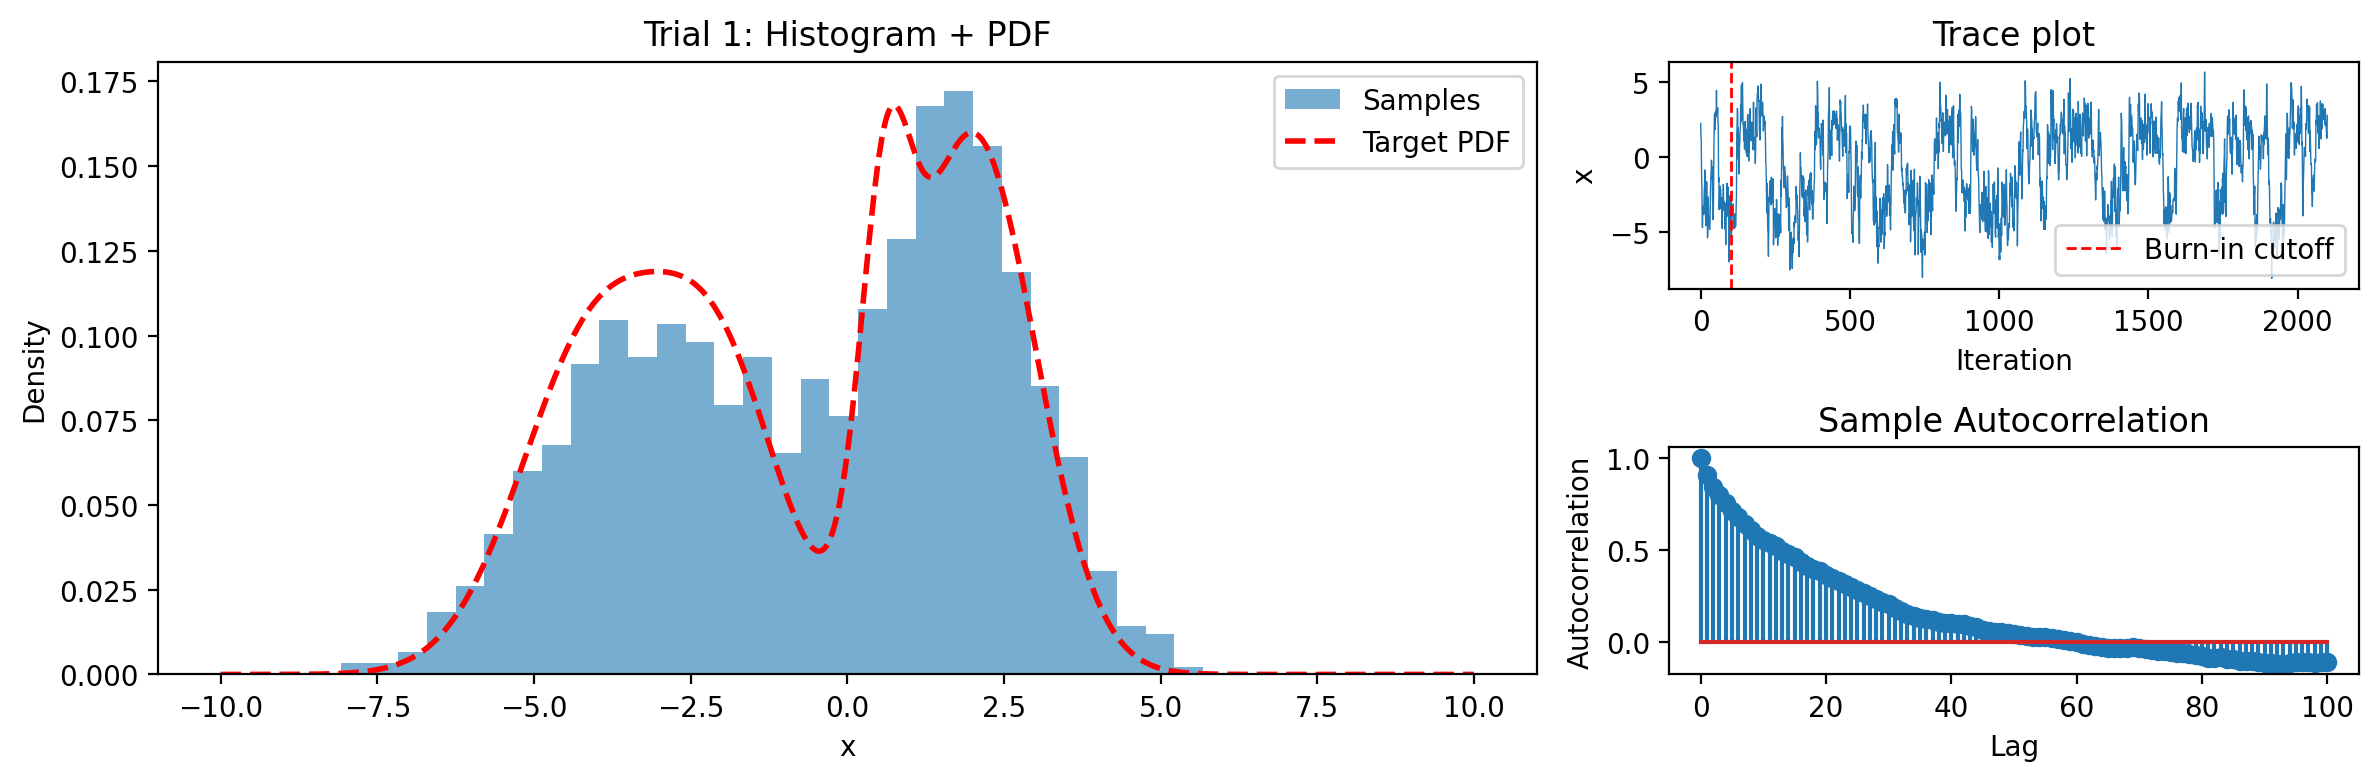

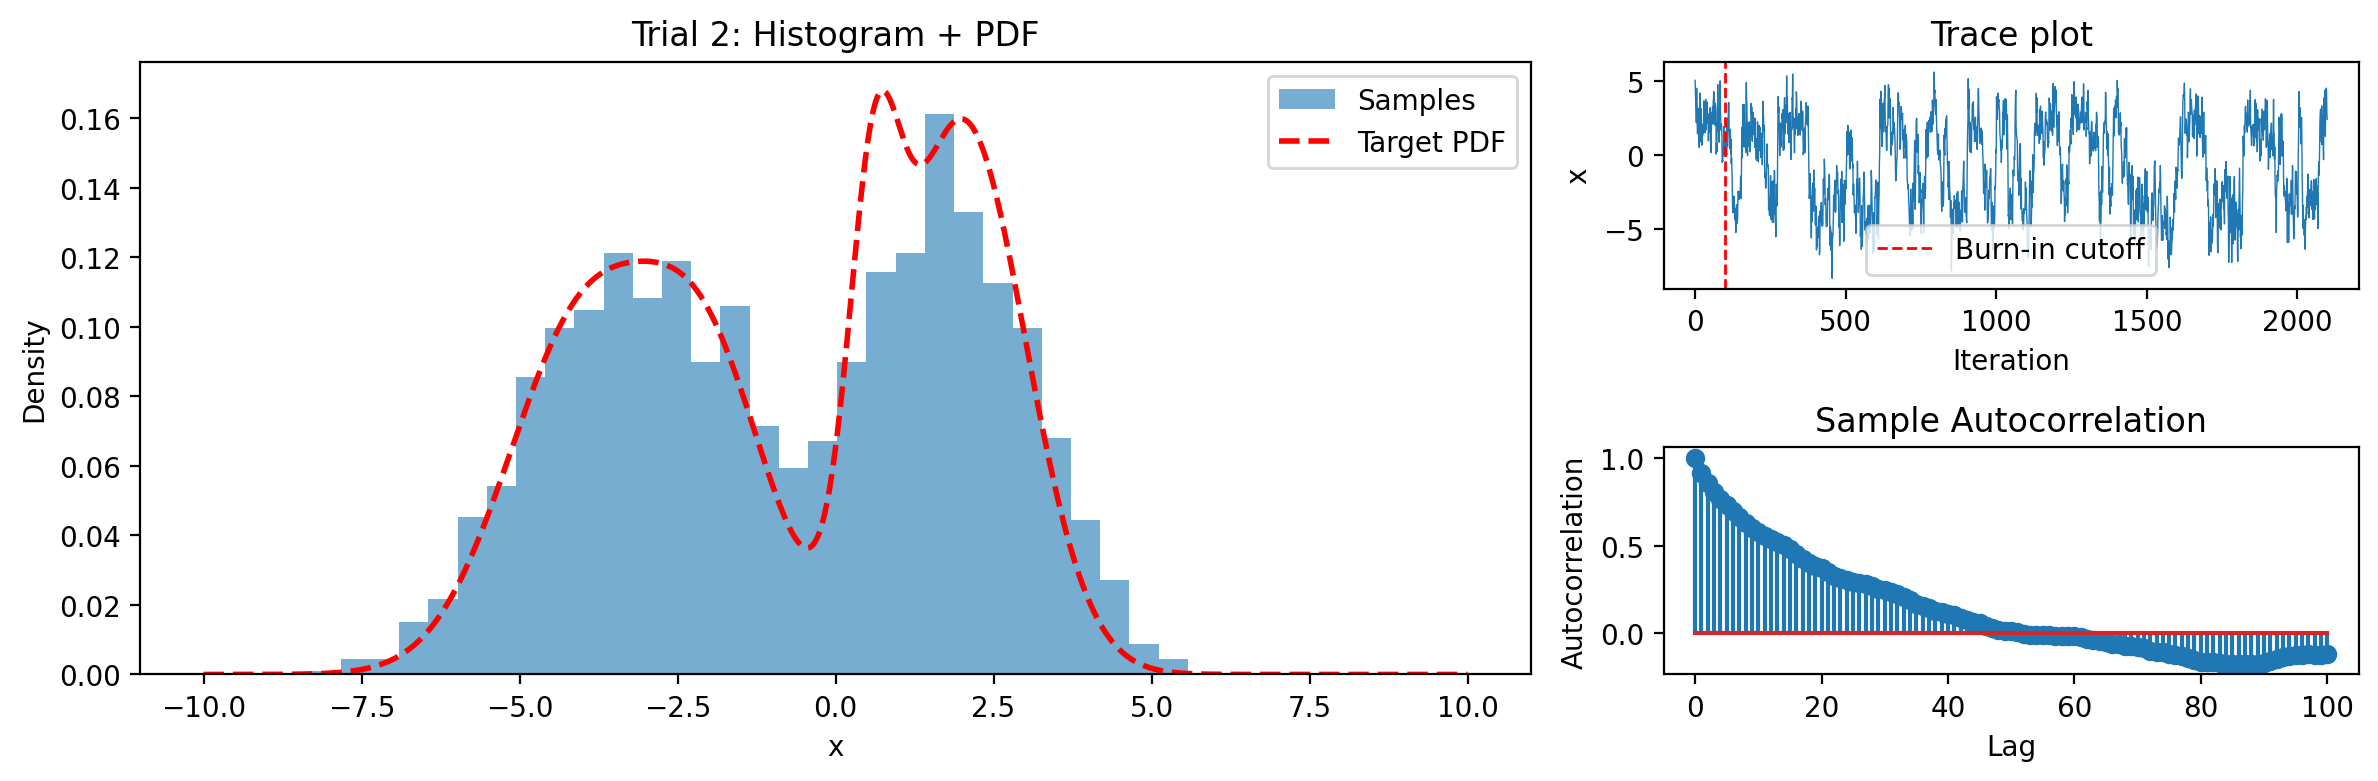

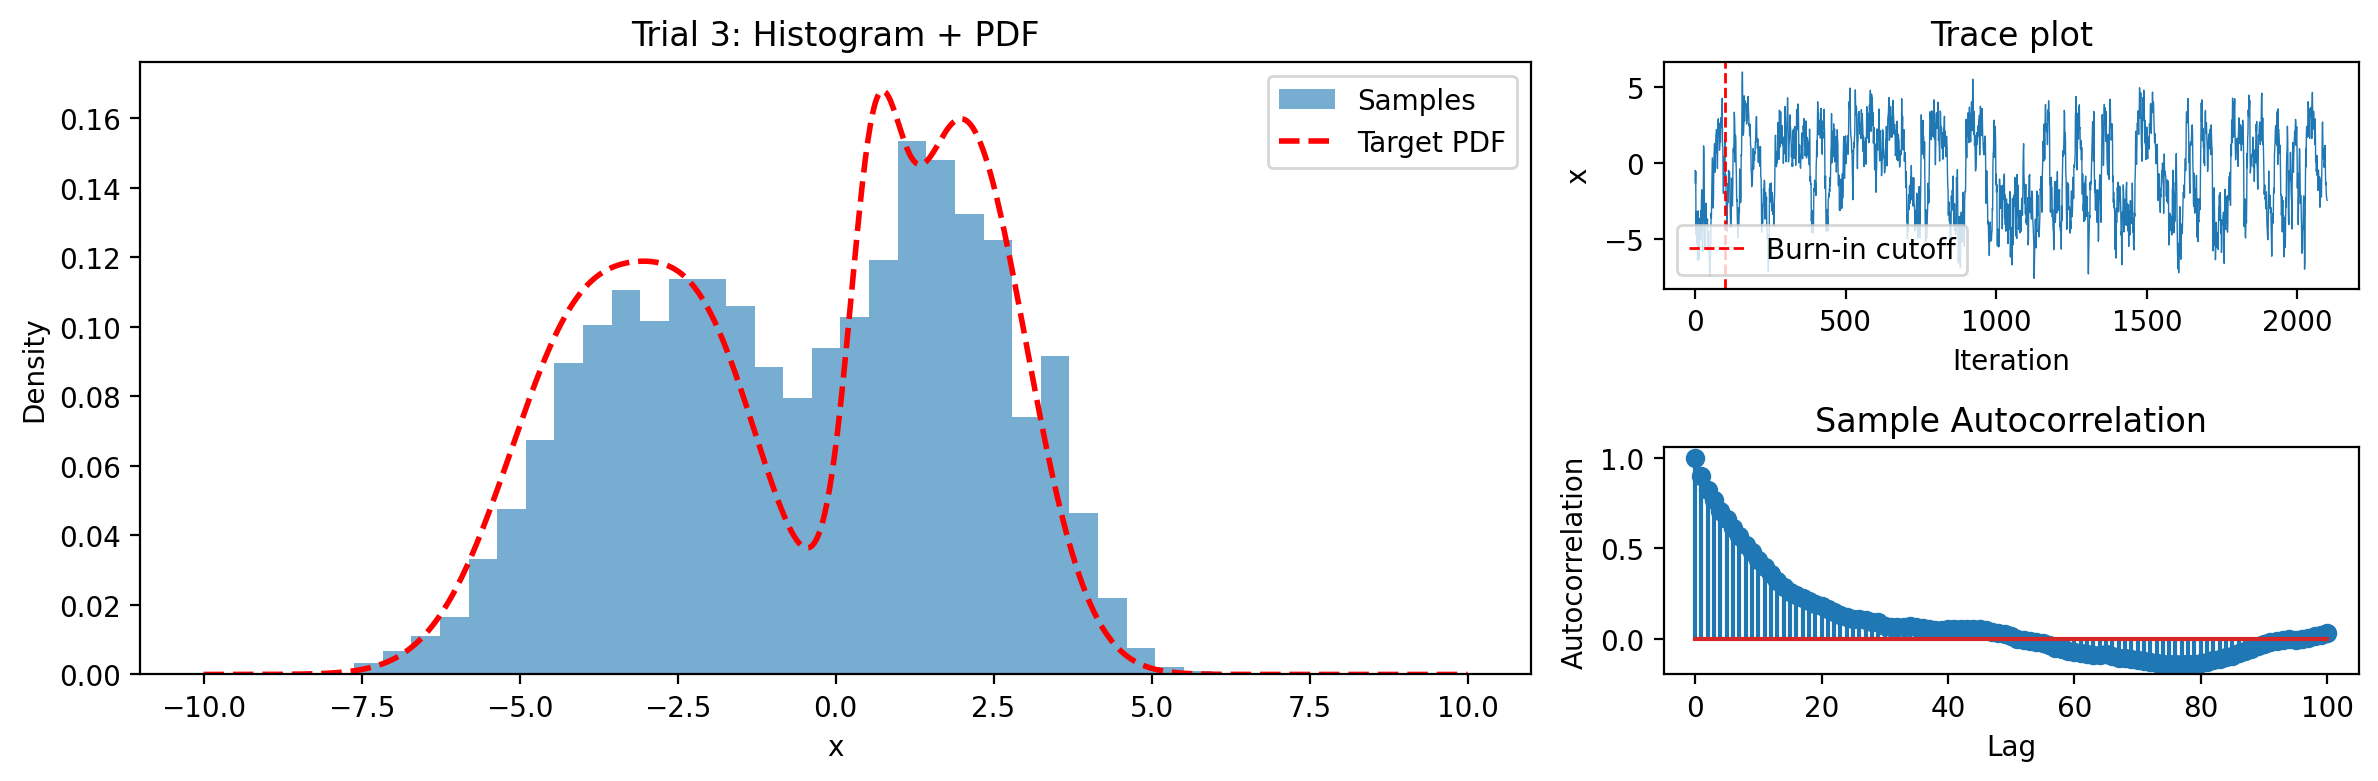

In [31]:
#^^^^ code hidden from presentation ^^^^
sampler = pSGLDSampler(target, num_samples=2000, burn_in=100, lr=1.0, alpha=0.95, eps=1e-2)
samples = sampler.run(num_trials=3)
sampler.plot_trials(max_lag=100)

**Conclusion**: we like pSGLD 👍

pSGLD allows BNNs to be trained efficiently for practical problems because in most cases we assume smooth unimodal likelihoods and priors (like Gaussians...), and the posterior of a large BNN tends to a Gaussian (due to posterior acting as a weight for a long Gaussian mixture)

### End short course

Have fun!